<center>
  <h1 style="color:#2c3e50; font-size: 3em; font-weight: bold;">Capstone Project AIMT</h1>
  <h2 style="color:#34495e; font-size: 2.5em;">Depression and its Associations in the USA</h2>
  <div style="margin-top: 20px;">
    <p style="font-size: 1.2em;">
      <strong>Shruti Vihol (C0892585)</strong><br>
      <strong>Kinjal Jha (C0892751)</stronng><br>
      <strong>Francis Neal Altares (C0894540)</strong><br>
      <strong>Nguyen Quoc Phuc Nguyen (C0891756)</strong><br>
      <strong>Neema Maria Joseph</strong>
    </p>
  </div>
</center>


#### Context
<div class="alert alert-block alert-info">

<b>In our machine learning project, we aim to analyze the associations between depression and various demographic, social, and health-related factors in the United States. Utilizing the National Health and Nutrition Examination Survey (NHANES) dataset, we explore a comprehensive range of variables, including age, gender, socioeconomic status, lifestyle factors, and medical history. Our goal is to identify patterns and predictors of depression prevalence, offering insights that could inform public health strategies and interventions. Through this analysis, we seek to better understand the complexities surrounding mental health in the US population.</div>

<center>
  <h3 style="color:#2c3e50; font-size: 1.8em; font-weight: bold;">Data Card</h3>
</center>

<p style="font-size: 1.1em; color:#34495e; max-width: 800px; margin: 20px auto; text-align: left;">
  We plan to use the NHANES dataset from the years 2013-2018 for our analysis. Given that this dataset contains extensive information about US civilians, we will extract and filter the data to select relevant columns for our study. This will allow us to focus on the variables that are most pertinent to our investigation of depression and its associations.
</p>

<center>
  <div>
    <img src="https://susanvillestuff.com/wp-content/uploads/2022/04/nhanes.jpg" alt="NHANES Logo" style="border: 2px solid #2c3e50; border-radius: 8px; max-width: 100%; height: auto;">
  </div>
</center>


#### Project Stages In The Notebook

<centre>
<div style="margin-top: 30px; background-color: #f4f4f4; border-radius: 8px; padding: 20px; box-shadow: 0 4px 8px rgba(0,0,0,0.2); max-width: 600px; margin: 0 auto;">
    <span style="color: #2ecc71; font-size: 1.3em; font-weight: bold; display: block; text-align: center; margin-bottom: 10px;">Project Stages</span>
    <ul style="list-style-type: none; padding: 0; font-size: 1.1em; color: #34495e;">
      <li style="padding: 10px 0; border-bottom: 1px solid #ddd;">1. <strong>Dataset Extraction and Filtering</strong></li>
      <li style="padding: 10px 0; border-bottom: 1px solid #ddd;">2. <strong>Data Wrangling</strong></li>
      <li style="padding: 10px 0; border-bottom: 1px solid #ddd;">3. <strong>Data Wrangling</strong></li>
      <li style="padding: 10px 0; border-bottom: 1px solid #ddd;">4. <strong>Data Visualization</strong></li>
      <li style="padding: 10px 0; border-bottom: 1px solid #ddd;">5. <strong>Data Modelling</strong></li>
      <li style="padding: 10px 0;"><strong>6. Model Evaluation and Conclusion</strong></li>
    </ul>
  </div>

#### IMPORTING LIBRARIES

In [4]:
#Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import os
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Library to ignore warnigs
import warnings
warnings.filterwarnings("ignore")


#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
plt.rcParams['figure.figsize'] =[8,8]
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['figure.dpi']=80

### 1) Dataset Extraction and Filtering

In [2]:
# Directory containing your SAS files
file_directory = 'C:/Users/Cacto/Desktop/kinjal college/Sem3/Project/Data'

# Get a list of all files in the directory
file_list = os.listdir(file_directory)

In [3]:
file_list

['NHANES_2013_2014', 'NHANES_2015_2016', 'NHANES_2017_2018']

In [4]:
# Create an empty dictionary to store DataFrames
dfs = {}

for file in file_list:
    folder_path = os.path.join(file_directory, file)
    
    data_list = os.listdir(folder_path)
    for data in data_list:
        file_path = os.path.join(folder_path, data)
        
        data_name = file + " " + data.split('.')[0]
        
        dfs[data_name] = pd.read_csv(file_path)

In [5]:
dfs.keys()

dict_keys(['NHANES_2013_2014 demographics', 'NHANES_2013_2014 dietary', 'NHANES_2013_2014 examination', 'NHANES_2013_2014 laboratory', 'NHANES_2013_2014 questionnaire', 'NHANES_2015_2016 demographics', 'NHANES_2015_2016 dietary', 'NHANES_2015_2016 examination', 'NHANES_2015_2016 laboratory', 'NHANES_2015_2016 questionnaire', 'NHANES_2017_2018 demographics', 'NHANES_2017_2018 dietary', 'NHANES_2017_2018 examination', 'NHANES_2017_2018 laboratory', 'NHANES_2017_2018 questionnaire'])

In [6]:
# Create a year column indicating the surveying year.
for name in dfs.keys():
    if name.startswith('NHANES_2013_2014'):
        dfs[name]['Year'] = '2013-2014'
    elif name.startswith('NHANES_2015_2016'):
        dfs[name]['Year'] = '2015-2016'
    else:
        dfs[name]['Year'] = '2017-2018'

### 1.1 Demographics

In [7]:
# Concatenating three demographic csv files as one.
df_demographics = pd.concat([dfs['NHANES_2013_2014 demographics'], dfs['NHANES_2015_2016 demographics'],
                             dfs['NHANES_2017_2018 demographics']], ignore_index = True)
df_demographics

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0       73557.0       8.0       2.0       1.0      69.0       NaN       4.0   
1       73558.0       8.0       2.0       1.0      54.0       NaN       3.0   
2       73559.0       8.0       2.0       1.0      72.0       NaN       3.0   
3       73560.0       8.0       2.0       1.0       9.0       NaN       3.0   
4       73561.0       8.0       2.0       2.0      73.0       NaN       3.0   
...         ...       ...       ...       ...       ...       ...       ...   
29395  102952.0      10.0       2.0       2.0      70.0       NaN       5.0   
29396  102953.0      10.0       2.0       1.0      42.0       NaN       1.0   
29397  102954.0      10.0       2.0       2.0      41.0       NaN       4.0   
29398  102955.0      10.0       2.0       2.0      14.0       NaN       4.0   
29399  102956.0      10.0       2.0       1.0      38.0       NaN       3.0   

       RIDRETH3  RIDEXMON  RIDEXAGM  ...  SDMVPSU  SDMVSTRA  INDHHIN2  \
0           4.0       1.0       NaN  ...      1.0     112.0       4.0   
1           3.0       1.0       NaN  ...      1.0     108.0       7.0   
2           3.0       2.0       NaN  ...      1.0     109.0      10.0   
3           3.0       1.0     119.0  ...      2.0     109.0       9.0   
4           3.0       1.0       NaN  ...      2.0     116.0      15.0   
...         ...       ...       ...  ...      ...       ...       ...   
29395       6.0       2.0       NaN  ...      2.0     138.0       4.0   
29396       1.0       2.0       NaN  ...      2.0     137.0      12.0   
29397       4.0       1.0       NaN  ...      1.0     144.0      10.0   
29398       4.0       2.0     175.0  ...      1.0     136.0       9.0   
29399       3.0       2.0       NaN  ...      1.0     142.0       7.0   

       INDFMIN2  INDFMPIR       Year  DMDHRAGZ  DMDHREDZ  DMDHRMAZ  DMDHSEDZ  
0           4.0      0.84  2013-2014       NaN       NaN       NaN       NaN  
1           7.0      1.78  2013-2014       NaN       NaN       NaN       NaN  
2          10.0      4.51  2013-2014       NaN       NaN       NaN       NaN  
3           9.0      2.52  2013-2014       NaN       NaN       NaN       NaN  
4          15.0      5.00  2013-2014       NaN       NaN       NaN       NaN  
...         ...       ...        ...       ...       ...       ...       ...  
29395       4.0      0.95  2017-2018       4.0       2.0       1.0       1.0  
29396      12.0       NaN  2017-2018       3.0       2.0       2.0       NaN  
29397      10.0      1.18  2017-2018       3.0       2.0       2.0       NaN  
29398       9.0      2.24  2017-2018       3.0       2.0       1.0       2.0  
29399       7.0      1.56  2017-2018       2.0       2.0       2.0       NaN  

[29400 rows x 52 columns]

In [8]:
df_demographics_inner = pd.concat([dfs['NHANES_2013_2014 demographics'], dfs['NHANES_2015_2016 demographics'],
                             dfs['NHANES_2017_2018 demographics']], ignore_index = True, join="inner")
df_demographics_inner

SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0       73557.0       8.0       2.0       1.0      69.0       NaN       4.0   
1       73558.0       8.0       2.0       1.0      54.0       NaN       3.0   
2       73559.0       8.0       2.0       1.0      72.0       NaN       3.0   
3       73560.0       8.0       2.0       1.0       9.0       NaN       3.0   
4       73561.0       8.0       2.0       2.0      73.0       NaN       3.0   
...         ...       ...       ...       ...       ...       ...       ...   
29395  102952.0      10.0       2.0       2.0      70.0       NaN       5.0   
29396  102953.0      10.0       2.0       1.0      42.0       NaN       1.0   
29397  102954.0      10.0       2.0       2.0      41.0       NaN       4.0   
29398  102955.0      10.0       2.0       2.0      14.0       NaN       4.0   
29399  102956.0      10.0       2.0       1.0      38.0       NaN       3.0   

       RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHHSZE  DMDHRGND      WTINT2YR  \
0           4.0       1.0       NaN  ...       2.0       1.0  13281.237386   
1           3.0       1.0       NaN  ...       0.0       1.0  23682.057386   
2           3.0       2.0       NaN  ...       2.0       1.0  57214.803319   
3           3.0       1.0     119.0  ...       0.0       1.0  55201.178592   
4           3.0       1.0       NaN  ...       2.0       1.0  63709.667069   
...         ...       ...       ...  ...       ...       ...           ...   
29395       6.0       2.0       NaN  ...       2.0       2.0  16896.276203   
29396       1.0       2.0       NaN  ...       0.0       1.0  61630.380013   
29397       4.0       1.0       NaN  ...       0.0       2.0  17160.895269   
29398       4.0       2.0     175.0  ...       0.0       2.0  14238.445922   
29399       3.0       2.0       NaN  ...       0.0       1.0  38645.740291   

           WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  INDFMPIR  \
0      13481.042095      1.0     112.0       4.0       4.0      0.84   
1      24471.769625      1.0     108.0       7.0       7.0      1.78   
2      57193.285376      1.0     109.0      10.0      10.0      4.51   
3      55766.512438      2.0     109.0       9.0       9.0      2.52   
4      65541.871229      2.0     116.0      15.0      15.0      5.00   
...             ...      ...       ...       ...       ...       ...   
29395  18338.711104      2.0     138.0       4.0       4.0      0.95   
29396  63661.951573      2.0     137.0      12.0      12.0       NaN   
29397  17694.783346      1.0     144.0      10.0      10.0      1.18   
29398  14871.839636      1.0     136.0       9.0       9.0      2.24   
29399  39426.299948      1.0     142.0       7.0       7.0      1.56   

            Year  
0      2013-2014  
1      2013-2014  
2      2013-2014  
3      2013-2014  
4      2013-2014  
...          ...  
29395  2017-2018  
29396  2017-2018  
29397  2017-2018  
29398  2017-2018  
29399  2017-2018  

[29400 rows x 43 columns]

In [9]:
df_demographics_inner.to_csv('demo_inner.csv')

### 1.2 Dietary

In [10]:
df_dietary = pd.concat([dfs['NHANES_2013_2014 dietary'], dfs['NHANES_2015_2016 dietary'], 
                        dfs['NHANES_2017_2018 dietary']], ignore_index = True)
df_dietary

SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  \
0       73557.0   16888.327864   12930.890649       1.0      49.0    2.0   
1       73558.0   17932.143865   12684.148869       1.0      59.0    2.0   
2       73559.0   59641.812930   39394.236709       1.0      49.0    2.0   
3       73560.0  142203.069917  125966.366442       1.0      54.0    2.0   
4       73561.0   59052.357033   39004.892993       1.0      63.0    2.0   
...         ...            ...            ...       ...       ...    ...   
29033  102952.0   13812.955180   28685.931567       1.0      73.0    2.0   
29034  102953.0   50632.360804       0.000000       1.0      73.0    2.0   
29035  102954.0   11081.266527    8924.895053       1.0      76.0    2.0   
29036  102955.0   27529.854014   36299.552504       1.0      73.0    2.0   
29037  102956.0   69447.414236   92756.884416       1.0      81.0    2.0   

       DRDINT  DR1DBIH  DR1DAY  DR1LANG  ...  DSQTIRON  DSQTZINC  DSQTCOPP  \
0         2.0      6.0     2.0      1.0  ...       NaN       NaN       NaN   
1         2.0      4.0     1.0      1.0  ...       NaN       NaN       NaN   
2         2.0     18.0     6.0      1.0  ...       NaN       NaN       NaN   
3         2.0     21.0     3.0      1.0  ...       NaN       NaN       NaN   
4         2.0     18.0     1.0      1.0  ...       NaN       NaN       NaN   
...       ...      ...     ...      ...  ...       ...       ...       ...   
29033     2.0     22.0     7.0      4.0  ...     8.000   15.0000       2.0   
29034     1.0      2.0     7.0      2.0  ...       NaN       NaN       NaN   
29035     2.0      2.0     6.0      1.0  ...       NaN       NaN       NaN   
29036     2.0     15.0     2.0      1.0  ...     0.583    0.5833       NaN   
29037     2.0     10.0     5.0      1.0  ...       NaN       NaN       NaN   

       DSQTSODI  DSQTPOTA  DSQTSELE  DSQTCAFF  DSQTIODI  DR1TWSZ  DR2TWSZ  
0           NaN       NaN       NaN       NaN       NaN      NaN      NaN  
1           NaN       NaN       NaN       NaN       NaN      NaN      NaN  
2           NaN       NaN       NaN       NaN       NaN      NaN      NaN  
3           NaN       NaN       NaN       NaN       NaN      NaN      NaN  
4           NaN       NaN       NaN       NaN       NaN      NaN      NaN  
...         ...       ...       ...       ...       ...      ...      ...  
29033       NaN       NaN       NaN       NaN     150.0      4.0      4.0  
29034       NaN       NaN       NaN       NaN       NaN      4.0      NaN  
29035       NaN       NaN       NaN       NaN       NaN      4.0      4.0  
29036       2.3       NaN       NaN       NaN      17.5      1.0      1.0  
29037       NaN       NaN       NaN       NaN       NaN      1.0      1.0  

[29038 rows x 370 columns]

In [11]:
df_dietary_inner = pd.concat([dfs['NHANES_2013_2014 dietary'], dfs['NHANES_2015_2016 dietary'], 
                        dfs['NHANES_2017_2018 dietary']], ignore_index = True, join="inner")
df_dietary_inner

SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  DRABF  \
0       73557.0   16888.327864   12930.890649       1.0      49.0    2.0   
1       73558.0   17932.143865   12684.148869       1.0      59.0    2.0   
2       73559.0   59641.812930   39394.236709       1.0      49.0    2.0   
3       73560.0  142203.069917  125966.366442       1.0      54.0    2.0   
4       73561.0   59052.357033   39004.892993       1.0      63.0    2.0   
...         ...            ...            ...       ...       ...    ...   
29033  102952.0   13812.955180   28685.931567       1.0      73.0    2.0   
29034  102953.0   50632.360804       0.000000       1.0      73.0    2.0   
29035  102954.0   11081.266527    8924.895053       1.0      76.0    2.0   
29036  102955.0   27529.854014   36299.552504       1.0      73.0    2.0   
29037  102956.0   69447.414236   92756.884416       1.0      81.0    2.0   

       DRDINT  DR1DBIH  DR1DAY  DR1LANG  ...  DRD370R  DRD370RQ  DRD370S  \
0         2.0      6.0     2.0      1.0  ...      NaN       NaN      NaN   
1         2.0      4.0     1.0      1.0  ...      2.0       NaN      2.0   
2         2.0     18.0     6.0      1.0  ...      NaN       NaN      NaN   
3         2.0     21.0     3.0      1.0  ...      NaN       NaN      NaN   
4         2.0     18.0     1.0      1.0  ...      2.0       NaN      2.0   
...       ...      ...     ...      ...  ...      ...       ...      ...   
29033     2.0     22.0     7.0      4.0  ...      2.0       NaN      2.0   
29034     1.0      2.0     7.0      2.0  ...      2.0       NaN      2.0   
29035     2.0      2.0     6.0      1.0  ...      NaN       NaN      NaN   
29036     2.0     15.0     2.0      1.0  ...      NaN       NaN      NaN   
29037     2.0     10.0     5.0      1.0  ...      2.0       NaN      1.0   

       DRD370SQ  DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V       Year  
0           NaN      NaN       NaN      NaN       NaN      NaN  2013-2014  
1           NaN      2.0       NaN      2.0       NaN      2.0  2013-2014  
2           NaN      NaN       NaN      NaN       NaN      NaN  2013-2014  
3           NaN      NaN       NaN      NaN       NaN      NaN  2013-2014  
4           NaN      2.0       NaN      2.0       NaN      2.0  2013-2014  
...         ...      ...       ...      ...       ...      ...        ...  
29033       NaN      2.0       NaN      2.0       NaN      2.0  2017-2018  
29034       NaN      2.0       NaN      2.0       NaN      2.0  2017-2018  
29035       NaN      NaN       NaN      NaN       NaN      NaN  2017-2018  
29036       NaN      NaN       NaN      NaN       NaN      NaN  2017-2018  
29037       1.0      2.0       NaN      2.0       NaN      2.0  2017-2018  

[29038 rows x 163 columns]

In [12]:
df_dietary_inner.to_csv('diet_csv')

### 1.3 Examination

In [13]:
df_examination = pd.concat([dfs['NHANES_2013_2014 examination'], dfs['NHANES_2015_2016 examination'], 
                            dfs['NHANES_2017_2018 examination']], ignore_index = True)
df_examination

SEQN  PEASCST1  PEASCTM1  PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  \
0       73557.0       1.0     620.0       NaN     NaN     1.0     4.0    86.0   
1       73558.0       1.0     766.0       NaN     NaN     1.0     4.0    74.0   
2       73559.0       1.0     665.0       NaN     NaN     1.0     4.0    68.0   
3       73560.0       1.0     803.0       NaN     NaN     1.0     2.0    64.0   
4       73561.0       1.0     949.0       NaN     NaN     1.0     3.0    92.0   
...         ...       ...       ...       ...     ...     ...     ...     ...   
28056  102952.0       NaN       NaN       NaN     NaN     1.0     3.0    68.0   
28057  102953.0       NaN       NaN       NaN     NaN     1.0     5.0    78.0   
28058  102954.0       NaN       NaN       NaN     NaN     1.0     3.0    78.0   
28059  102955.0       NaN       NaN       NaN     NaN     1.0     5.0    74.0   
28060  102956.0       NaN       NaN       NaN     NaN     1.0     5.0    76.0   

       BPXPULS  BPXPTY  ...  LUARXIN  LUAPNME  LUANMVGP  LUANMTGP  LUATECH  \
0          1.0     1.0  ...      NaN      NaN       NaN       NaN      NaN   
1          1.0     1.0  ...      NaN      NaN       NaN       NaN      NaN   
2          1.0     1.0  ...      NaN      NaN       NaN       NaN      NaN   
3          1.0     1.0  ...      NaN      NaN       NaN       NaN      NaN   
4          1.0     1.0  ...      NaN      NaN       NaN       NaN      NaN   
...        ...     ...  ...      ...      ...       ...       ...      ...   
28056      1.0     1.0  ...      NaN     b'M'      15.0      15.0     b'D'   
28057      1.0     1.0  ...      NaN    b'XL'      10.0      20.0     b'F'   
28058      1.0     1.0  ...      NaN     b'M'      10.0      10.0     b'C'   
28059      1.0     1.0  ...      NaN     b'M'      11.0      20.0     b'J'   
28060      1.0     1.0  ...      NaN     b'M'      12.0      13.0     b'B'   

       LUXSMED  LUXSIQR  LUXSIQRM  LUXCAPM  LUXCPIQR  
0          NaN      NaN       NaN      NaN       NaN  
1          NaN      NaN       NaN      NaN       NaN  
2          NaN      NaN       NaN      NaN       NaN  
3          NaN      NaN       NaN      NaN       NaN  
4          NaN      NaN       NaN      NaN       NaN  
...        ...      ...       ...      ...       ...  
28056      6.7      0.7      10.4    340.0      69.0  
28057     11.0      2.7      24.5    379.0      47.0  
28058      5.6      0.6      10.7    201.0      24.0  
28059      5.2      0.8      15.4    278.0      40.0  
28060      6.9      0.8      11.6    327.0      31.0  

[28061 rows x 597 columns]

In [14]:
df_examination_inner = pd.concat([dfs['NHANES_2013_2014 examination'], dfs['NHANES_2015_2016 examination'], 
                            dfs['NHANES_2017_2018 examination']], ignore_index = True, join="inner")
df_examination_inner

SEQN  PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  BPXPULS  BPXPTY  \
0       73557.0       NaN     NaN     1.0     4.0    86.0      1.0     1.0   
1       73558.0       NaN     NaN     1.0     4.0    74.0      1.0     1.0   
2       73559.0       NaN     NaN     1.0     4.0    68.0      1.0     1.0   
3       73560.0       NaN     NaN     1.0     2.0    64.0      1.0     1.0   
4       73561.0       NaN     NaN     1.0     3.0    92.0      1.0     1.0   
...         ...       ...     ...     ...     ...     ...      ...     ...   
28056  102952.0       NaN     NaN     1.0     3.0    68.0      1.0     1.0   
28057  102953.0       NaN     NaN     1.0     5.0    78.0      1.0     1.0   
28058  102954.0       NaN     NaN     1.0     3.0    78.0      1.0     1.0   
28059  102955.0       NaN     NaN     1.0     5.0    74.0      1.0     1.0   
28060  102956.0       NaN     NaN     1.0     5.0    76.0      1.0     1.0   

       BPXML1  BPXSY1  ...  OHX15SE  OHX18SE  OHX19SE  OHX20SE  OHX21SE  \
0       140.0   122.0  ...      NaN      NaN      NaN      NaN      NaN   
1       170.0   156.0  ...      NaN      NaN      NaN      NaN      NaN   
2       160.0   140.0  ...      NaN      NaN      NaN      NaN      NaN   
3       130.0   108.0  ...      9.0      9.0      1.0      4.0      0.0   
4       170.0   136.0  ...      NaN      NaN      NaN      NaN      NaN   
...       ...     ...  ...      ...      ...      ...      ...      ...   
28056   150.0   136.0  ...      b''      b''      b''      b''      b''   
28057   150.0   124.0  ...      b''      b''      b''      b''      b''   
28058   150.0   116.0  ...      b''      b''      b''      b''      b''   
28059   140.0   114.0  ...     b'0'     b'0'     b'0'     b'0'     b'0'   
28060   160.0   150.0  ...      b''      b''      b''      b''      b''   

       OHX28SE  OHX29SE  OHX30SE  OHX31SE       Year  
0          NaN      NaN      NaN      NaN  2013-2014  
1          NaN      NaN      NaN      NaN  2013-2014  
2          NaN      NaN      NaN      NaN  2013-2014  
3          4.0      4.0      1.0      9.0  2013-2014  
4          NaN      NaN      NaN      NaN  2013-2014  
...        ...      ...      ...      ...        ...  
28056      b''      b''      b''      b''  2017-2018  
28057      b''      b''      b''      b''  2017-2018  
28058      b''      b''      b''      b''  2017-2018  
28059     b'0'     b'0'     b'0'     b'0'  2017-2018  
28060      b''      b''      b''      b''  2017-2018  

[28061 rows x 149 columns]

In [15]:
df_examination_inner.to_csv('exam.csv')

### 1.4 Labratory

In [16]:
df_laboratory = pd.concat([dfs['NHANES_2013_2014 laboratory'], dfs['NHANES_2015_2016 laboratory'], 
                           dfs['NHANES_2017_2018 laboratory']], ignore_index = True)
df_laboratory

SEQN  URXUMA  URXUMS  URXUCR.x   URXCRS  URDACT     WTSAF2YR.x  \
0       73557.0     4.3     4.3      39.0   3447.6   11.03            NaN   
1       73558.0   153.0   153.0      50.0   4420.0  306.00            NaN   
2       73559.0    11.9    11.9     113.0   9989.2   10.53  142196.890197   
3       73560.0    16.0    16.0      76.0   6718.4   21.05            NaN   
4       73561.0   255.0   255.0     147.0  12994.8  173.47  142266.006548   
...         ...     ...     ...       ...      ...     ...            ...   
27718  102952.0     5.3     5.3       NaN   4508.4   10.39            NaN   
27719  102953.0    10.2    10.2       NaN  20420.4    4.42            NaN   
27720  102954.0     3.4     3.4       NaN   2740.4   10.97            NaN   
27721  102955.0    83.2    83.2       NaN  15646.8   47.01            NaN   
27722  102956.0    53.2    53.2       NaN   6630.0   70.93            NaN   

       LBXAPB  LBDAPBSI  LBXSAL  ...  SSHMFAL  SSHMFG  SSHMFGL  SSMUCA  \
0         NaN       NaN     4.1  ...      NaN     NaN      NaN     NaN   
1         NaN       NaN     4.7  ...      NaN     NaN      NaN     NaN   
2        57.0      0.57     3.7  ...      NaN     NaN      NaN     NaN   
3         NaN       NaN     NaN  ...      NaN     NaN      NaN     NaN   
4        92.0      0.92     4.3  ...      NaN     NaN      NaN     NaN   
...       ...       ...     ...  ...      ...     ...      ...     ...   
27718     NaN       NaN     4.8  ...      NaN     NaN      NaN     NaN   
27719     NaN       NaN     4.0  ...      NaN     NaN      NaN     NaN   
27720     NaN       NaN     3.9  ...      NaN     NaN      NaN     NaN   
27721     NaN       NaN     4.1  ...      NaN     NaN      NaN     NaN   
27722     NaN       NaN     4.3  ...      0.0   256.0      0.0   136.0   

       SSMUCAL   SSN2FG  SSN2FGL  SSPHMA  SSPHMAL  LBXVMIK  
0          NaN      NaN      NaN     NaN      NaN      NaN  
1          NaN      NaN      NaN     NaN      NaN      NaN  
2          NaN      NaN      NaN     NaN      NaN      NaN  
3          NaN      NaN      NaN     NaN      NaN      NaN  
4          NaN      NaN      NaN     NaN      NaN      NaN  
...        ...      ...      ...     ...      ...      ...  
27718      NaN      NaN      NaN     NaN      NaN      NaN  
27719      NaN      NaN      NaN     NaN      NaN      NaN  
27720      NaN      NaN      NaN     NaN      NaN      NaN  
27721      NaN      NaN      NaN     NaN      NaN      NaN  
27722      0.0  42700.0      0.0   0.605      0.0    0.071  

[27723 rows x 768 columns]

In [17]:
df_laboratory_inner = pd.concat([dfs['NHANES_2013_2014 laboratory'], dfs['NHANES_2015_2016 laboratory'], 
                           dfs['NHANES_2017_2018 laboratory']], ignore_index = True, join="inner")
df_laboratory_inner

SEQN  URXUMA  URXUMS   URXCRS  URDACT  LBXSAL  LBDSALSI  LBXSAPSI  \
0       73557.0     4.3     4.3   3447.6   11.03     4.1      41.0     129.0   
1       73558.0   153.0   153.0   4420.0  306.00     4.7      47.0      97.0   
2       73559.0    11.9    11.9   9989.2   10.53     3.7      37.0      99.0   
3       73560.0    16.0    16.0   6718.4   21.05     NaN       NaN       NaN   
4       73561.0   255.0   255.0  12994.8  173.47     4.3      43.0      78.0   
...         ...     ...     ...      ...     ...     ...       ...       ...   
27718  102952.0     5.3     5.3   4508.4   10.39     4.8      48.0      57.0   
27719  102953.0    10.2    10.2  20420.4    4.42     4.0      40.0     115.0   
27720  102954.0     3.4     3.4   2740.4   10.97     3.9      39.0      55.0   
27721  102955.0    83.2    83.2  15646.8   47.01     4.1      41.0      84.0   
27722  102956.0    53.2    53.2   6630.0   70.93     4.3      43.0      84.0   

       LBXSASSI  LBXSATSI  ...  URXUMO  URXUMN  URXUPB  URXUSB  URXUSN  \
0          16.0      16.0  ...     NaN     NaN     NaN     NaN     NaN   
1          18.0      29.0  ...     NaN     NaN     NaN     NaN     NaN   
2          22.0      16.0  ...     NaN     NaN     NaN     NaN     NaN   
3           NaN       NaN  ...   140.0   0.092    0.14   0.087    5.26   
4          36.0      28.0  ...     NaN     NaN     NaN     NaN     NaN   
...         ...       ...  ...     ...     ...     ...     ...     ...   
27718      27.0      22.0  ...     NaN     NaN     NaN     NaN     NaN   
27719      29.0      40.0  ...     NaN     NaN     NaN     NaN     NaN   
27720      15.0       6.0  ...     NaN     NaN     NaN     NaN     NaN   
27721      16.0      11.0  ...     NaN     NaN     NaN     NaN     NaN   
27722      27.0      47.0  ...    17.4   0.160    0.29   0.030    0.17   

       URXUTL  URXUTU  URXPREG  URXUAS       Year  
0         NaN     NaN      NaN     NaN  2013-2014  
1         NaN     NaN      NaN     NaN  2013-2014  
2         NaN     NaN      NaN     NaN  2013-2014  
3       0.062   0.238      NaN    3.83  2013-2014  
4         NaN     NaN      NaN     NaN  2013-2014  
...       ...     ...      ...     ...        ...  
27718     NaN     NaN      NaN     NaN  2017-2018  
27719     NaN     NaN      NaN     NaN  2017-2018  
27720     NaN     NaN      2.0     NaN  2017-2018  
27721     NaN     NaN      NaN     NaN  2017-2018  
27722   0.076   0.026      NaN    3.62  2017-2018  

[27723 rows x 173 columns]

In [18]:
df_laboratory_inner.to_csv('lab.csv')

### 1.5 Questionnare

In [19]:
df_questionnaire = pd.concat([dfs['NHANES_2013_2014 questionnaire'], dfs['NHANES_2015_2016 questionnaire'], 
                              dfs['NHANES_2017_2018 questionnaire']], ignore_index = True)
df_questionnaire

SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  ALQ101  ALQ110  \
0       73557.0      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
1       73558.0      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
2       73559.0      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
3       73560.0      1.0      NaN      NaN     NaN     NaN     NaN     NaN   
4       73561.0      1.0      NaN      NaN     NaN     NaN     1.0     NaN   
...         ...      ...      ...      ...     ...     ...     ...     ...   
29395  102952.0      NaN      NaN      NaN     NaN     1.0     NaN     NaN   
29396  102953.0      NaN      NaN      NaN     1.0     NaN     NaN     NaN   
29397  102954.0      1.0      NaN      NaN     NaN     NaN     NaN     NaN   
29398  102955.0      1.0      NaN      NaN     NaN     NaN     NaN     NaN   
29399  102956.0      1.0      NaN      NaN     NaN     NaN     NaN     NaN   

       ALQ120Q  ALQ120U  ...  OSQ090J  OSQ100J  OSD110J  OSQ120J    SLQ320  \
0          1.0      3.0  ...      NaN      NaN      NaN      NaN       NaN   
1          7.0      1.0  ...      NaN      NaN      NaN      NaN       NaN   
2          0.0      NaN  ...      NaN      NaN      NaN      NaN       NaN   
3          NaN      NaN  ...      NaN      NaN      NaN      NaN       NaN   
4          0.0      NaN  ...      NaN      NaN      NaN      NaN       NaN   
...        ...      ...  ...      ...      ...      ...      ...       ...   
29395      NaN      NaN  ...      NaN      NaN      NaN      NaN  b'22:30'   
29396      NaN      NaN  ...      NaN      NaN      NaN      NaN  b'23:00'   
29397      NaN      NaN  ...      NaN      NaN      NaN      NaN  b'00:00'   
29398      NaN      NaN  ...      NaN      NaN      NaN      NaN       NaN   
29399      NaN      NaN  ...      NaN      NaN      NaN      NaN  b'02:00'   

         SLQ330  SLD013  SMQ690K  SMQ857O  SMQ940  
0           NaN     NaN      NaN      NaN     NaN  
1           NaN     NaN      NaN      NaN     NaN  
2           NaN     NaN      NaN      NaN     NaN  
3           NaN     NaN      NaN      NaN     NaN  
4           NaN     NaN      NaN      NaN     NaN  
...         ...     ...      ...      ...     ...  
29395  b'07:00'     8.5      NaN      NaN     2.0  
29396  b'04:00'     5.0      NaN      NaN     1.0  
29397  b'07:00'     7.0      NaN      NaN     2.0  
29398       NaN     NaN      NaN      NaN     1.0  
29399  b'09:00'     7.0      NaN      NaN     2.0  

[29400 rows x 1268 columns]

In [20]:
df_questionnaire_inner = pd.concat([dfs['NHANES_2013_2014 questionnaire'], dfs['NHANES_2015_2016 questionnaire'], 
                              dfs['NHANES_2017_2018 questionnaire']], ignore_index = True, join="inner")
df_questionnaire_inner

SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  ALQ130  ALQ151  \
0       73557.0      1.0      NaN      NaN     NaN     NaN     1.0     1.0   
1       73558.0      1.0      NaN      NaN     NaN     NaN     4.0     1.0   
2       73559.0      1.0      NaN      NaN     NaN     NaN     NaN     2.0   
3       73560.0      1.0      NaN      NaN     NaN     NaN     NaN     NaN   
4       73561.0      1.0      NaN      NaN     NaN     NaN     NaN     2.0   
...         ...      ...      ...      ...     ...     ...     ...     ...   
29395  102952.0      NaN      NaN      NaN     NaN     1.0     NaN     2.0   
29396  102953.0      NaN      NaN      NaN     1.0     NaN    12.0     2.0   
29397  102954.0      1.0      NaN      NaN     NaN     NaN     NaN     NaN   
29398  102955.0      1.0      NaN      NaN     NaN     NaN     NaN     NaN   
29399  102956.0      1.0      NaN      NaN     NaN     NaN     2.0     2.0   

       BPQ020  BPQ030  ...  WHD080L  WHD110  WHD120  WHD130  WHD140  WHQ150  \
0         1.0     1.0  ...     40.0   270.0   200.0    69.0   270.0    62.0   
1         1.0     1.0  ...      NaN   240.0   250.0    72.0   250.0    25.0   
2         1.0     1.0  ...      NaN   180.0   190.0    70.0   228.0    35.0   
3         NaN     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
4         1.0     2.0  ...      NaN   150.0   135.0    67.0   170.0    60.0   
...       ...     ...  ...      ...     ...     ...     ...     ...     ...   
29395     2.0     NaN  ...      NaN   117.0   120.0     NaN   120.0    23.0   
29396     2.0     NaN  ...      NaN   200.0   180.0     NaN   222.0    41.0   
29397     2.0     NaN  ...      NaN   145.0   120.0     NaN   180.0    38.0   
29398     NaN     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
29399     1.0     1.0  ...      NaN   240.0   220.0     NaN   255.0    34.0   

       WHQ030M  WHQ500  WHQ520       Year  
0          NaN     NaN     NaN  2013-2014  
1          NaN     NaN     NaN  2013-2014  
2          NaN     NaN     NaN  2013-2014  
3          3.0     3.0     3.0  2013-2014  
4          NaN     NaN     NaN  2013-2014  
...        ...     ...     ...        ...  
29395      NaN     NaN     NaN  2017-2018  
29396      NaN     NaN     NaN  2017-2018  
29397      NaN     NaN     NaN  2017-2018  
29398      1.0     1.0     3.0  2017-2018  
29399      NaN     NaN     NaN  2017-2018  

[29400 rows x 586 columns]

In [21]:
df_questionnaire_inner.to_csv('quest.csv')

<div class="alert alert-block alert-warning">
    <b>Observations:</b>
    <ul>
        <li>There are total 5 csv files named Demographics, Diet, Labrotatory,examination and Questionarie.</li>
        <li>Each csv file has different number of columns and rows</li>
        <li>Each csv file will undergo some sort of data preprocessing steps to ensure data is in correct format for us to go ahead and feed into the model.</li>
</div>

### 2) Data Wrangling

#### Demographics dataset

In [22]:
df_demo=pd.read_csv('demo_inner.csv')

In [23]:
df_demo

Unnamed: 0      SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  \
0               0   73557.0       8.0       2.0       1.0      69.0       NaN   
1               1   73558.0       8.0       2.0       1.0      54.0       NaN   
2               2   73559.0       8.0       2.0       1.0      72.0       NaN   
3               3   73560.0       8.0       2.0       1.0       9.0       NaN   
4               4   73561.0       8.0       2.0       2.0      73.0       NaN   
...           ...       ...       ...       ...       ...       ...       ...   
29395       29395  102952.0      10.0       2.0       2.0      70.0       NaN   
29396       29396  102953.0      10.0       2.0       1.0      42.0       NaN   
29397       29397  102954.0      10.0       2.0       2.0      41.0       NaN   
29398       29398  102955.0      10.0       2.0       2.0      14.0       NaN   
29399       29399  102956.0      10.0       2.0       1.0      38.0       NaN   

       RIDRETH1  RIDRETH3  RIDEXMON  ...  DMDHHSZE  DMDHRGND      WTINT2YR  \
0           4.0       4.0       1.0  ...       2.0       1.0  13281.237386   
1           3.0       3.0       1.0  ...       0.0       1.0  23682.057386   
2           3.0       3.0       2.0  ...       2.0       1.0  57214.803319   
3           3.0       3.0       1.0  ...       0.0       1.0  55201.178592   
4           3.0       3.0       1.0  ...       2.0       1.0  63709.667069   
...         ...       ...       ...  ...       ...       ...           ...   
29395       5.0       6.0       2.0  ...       2.0       2.0  16896.276203   
29396       1.0       1.0       2.0  ...       0.0       1.0  61630.380013   
29397       4.0       4.0       1.0  ...       0.0       2.0  17160.895269   
29398       4.0       4.0       2.0  ...       0.0       2.0  14238.445922   
29399       3.0       3.0       2.0  ...       0.0       1.0  38645.740291   

           WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  INDFMPIR  \
0      13481.042095      1.0     112.0       4.0       4.0      0.84   
1      24471.769625      1.0     108.0       7.0       7.0      1.78   
2      57193.285376      1.0     109.0      10.0      10.0      4.51   
3      55766.512438      2.0     109.0       9.0       9.0      2.52   
4      65541.871229      2.0     116.0      15.0      15.0      5.00   
...             ...      ...       ...       ...       ...       ...   
29395  18338.711104      2.0     138.0       4.0       4.0      0.95   
29396  63661.951573      2.0     137.0      12.0      12.0       NaN   
29397  17694.783346      1.0     144.0      10.0      10.0      1.18   
29398  14871.839636      1.0     136.0       9.0       9.0      2.24   
29399  39426.299948      1.0     142.0       7.0       7.0      1.56   

            Year  
0      2013-2014  
1      2013-2014  
2      2013-2014  
3      2013-2014  
4      2013-2014  
...          ...  
29395  2017-2018  
29396  2017-2018  
29397  2017-2018  
29398  2017-2018  
29399  2017-2018  

[29400 rows x 44 columns]

In [24]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29400 entries, 0 to 29399
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  29400 non-null  int64  
 1   SEQN        29400 non-null  float64
 2   SDDSRVYR    29400 non-null  float64
 3   RIDSTATR    29400 non-null  float64
 4   RIAGENDR    29400 non-null  float64
 5   RIDAGEYR    29400 non-null  float64
 6   RIDAGEMN    1965 non-null   float64
 7   RIDRETH1    29400 non-null  float64
 8   RIDRETH3    29400 non-null  float64
 9   RIDEXMON    28061 non-null  float64
 10  RIDEXAGM    11706 non-null  float64
 11  DMQMILIZ    18414 non-null  float64
 12  DMQADFC     1631 non-null   float64
 13  DMDBORN4    29400 non-null  float64
 14  DMDCITZN    29391 non-null  float64
 15  DMDYRSUS    6092 non-null   float64
 16  DMDEDUC3    7756 non-null   float64
 17  DMDEDUC2    17057 non-null  float64
 18  DMDMARTL    17057 non-null  float64
 19  RIDEXPRG    3707 non-null

At first glance we notice we have lot of missing columns in demo csv, lets filter and drop columns having more than 60% of data missing

In [25]:
df_demo.isnull().mean()*100

Unnamed: 0     0.000000
SEQN           0.000000
SDDSRVYR       0.000000
RIDSTATR       0.000000
RIAGENDR       0.000000
RIDAGEYR       0.000000
RIDAGEMN      93.316327
RIDRETH1       0.000000
RIDRETH3       0.000000
RIDEXMON       4.554422
RIDEXAGM      60.183673
DMQMILIZ      37.367347
DMQADFC       94.452381
DMDBORN4       0.000000
DMDCITZN       0.030612
DMDYRSUS      79.278912
DMDEDUC3      73.619048
DMDEDUC2      41.982993
DMDMARTL      41.982993
RIDEXPRG      87.391156
SIALANG        0.000000
SIAPROXY       0.006803
SIAINTRP       0.000000
FIALANG        3.142857
FIAPROXY       3.142857
FIAINTRP       3.142857
MIALANG       28.666667
MIAPROXY      28.659864
MIAINTRP      28.656463
AIALANGA      41.306122
DMDHHSIZ       0.000000
DMDFMSIZ       0.000000
DMDHHSZA       0.000000
DMDHHSZB       0.000000
DMDHHSZE       0.000000
DMDHRGND       0.000000
WTINT2YR       0.000000
WTMEC2YR       0.000000
SDMVPSU        0.000000
SDMVSTRA       0.000000
INDHHIN2       3.295918
INDFMIN2       3

<div class="alert alert-success">
<b>Success:</b> Columns with more than 60% missing values have been identified:

- ['RIDAGEMN', 'RIDEXAGM', 'DMQADFC', 'DMDYRSUS', 'DMDEDUC3', 'RIDEXPRG']
- We are left with columns after dropping the misiing values columns
- SEQN - Respondent sequence number
- SDDSRVYR - Data release cycle
- RIDSTATR - Interview/Examination status
- RIAGENDR - Gender
- RIDAGEYR - Age in years at screening
- RIDAGEMN - Age in months at screening - 0 to 24 mos
- RIDRETH1 - Race/Hispanic origin
- RIDRETH3 - Race/Hispanic origin w/ NH Asian
- RIDEXMON - Six month time period
- RIDEXAGM - Age in months at exam - 0 to 19 years
- DMQMILIZ - Served active duty in US Armed Forces
- DMQADFC - Served in a foreign country
- DMQ135 - Born in US or US territory
- DMDYRUSZ - Length of time in US
- DMDEDUC3 - Education level - Children/Youth 6-19
- DMDEDUC2 - Education level - Adults 20+
- DMDMARTL - Marital status
- RIDEXPRG - Pregnancy status at exam
- SIALANG - Language of SP Interview
- SIAPROXY - Proxy used in SP Interview?
- SIAINTRP - Interpreter used in SP Interview?
- FIALANG - Language of Family Interview
- FIAINTRP - Interpreter used in Family Interview?
- MIALANG - Language of MEC Interview
- MIAPROXY - Proxy used in MEC Interview?
- AIALANGA - Language of ACASI Interview
- DMDHHSIZ - Total number of people in the Household
- DMDFMSIZ - Total number of people in the Family
- DMDHHSZA - # of children 5 years or younger in HH
- DMDHHSZB - # of children 6-17 years old in HH
- DMDHHSZE - # of adults 60 years or older in HH
- DMDHRGND - HH ref person's gender
- DMDHRAGZ - HH ref person's age in years
- DMDHREDZ - HH ref person's education level
- DMDHRMAZ - HH ref person's marital status
- DMDHSEDZ - HH ref person's spouse's education level
- INDHHIN2 - Annual household income
- INDFMIN2 - Annual family income
- INDFMPIR - Ratio of family income to poverty

</div>

#### Exploratory Data Analysis on Demo_csv
##### choosing relevant columns to our analysis

In [26]:
df_demo=df_demo[['SEQN','RIAGENDR','RIDAGEYR','RIDRETH3','DMDEDUC2','DMDMARTL','INDFMPIR','Year']].copy()

##### Renaming columns for better user Understanding

In [27]:
df_demo.rename(columns={
    'SEQN': 'SEQN',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'RIDRETH3': 'Race_Ethnicity',
    'DMDEDUC2': 'Education_Level_Adults',
    'DMDMARTL': 'Marital_Status',
    'INDFMPIR': 'Ratio of family income to poverty'
}, inplace=True)

In [28]:
df_demo.head()

SEQN  Gender   Age  Race_Ethnicity  Education_Level_Adults  \
0  73557.0     1.0  69.0             4.0                     3.0   
1  73558.0     1.0  54.0             3.0                     3.0   
2  73559.0     1.0  72.0             3.0                     4.0   
3  73560.0     1.0   9.0             3.0                     NaN   
4  73561.0     2.0  73.0             3.0                     5.0   

   Marital_Status  Ratio of family income to poverty       Year  
0             4.0                               0.84  2013-2014  
1             1.0                               1.78  2013-2014  
2             1.0                               4.51  2013-2014  
3             NaN                               2.52  2013-2014  
4             1.0                               5.00  2013-2014

In [29]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29400 entries, 0 to 29399
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SEQN                               29400 non-null  float64
 1   Gender                             29400 non-null  float64
 2   Age                                29400 non-null  float64
 3   Race_Ethnicity                     29400 non-null  float64
 4   Education_Level_Adults             17057 non-null  float64
 5   Marital_Status                     17057 non-null  float64
 6   Ratio of family income to poverty  26332 non-null  float64
 7   Year                               29400 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.8+ MB


<div class="alert alert-block alert-info">
  <b>Codes of Different Row Values in Demo Dataset:</b>

  <p><b>Marriage</b></p>
  <ul style="list-style-type: none; padding-left: 0;">
    <li><b>1:</b> Married</li>
    <li><b>2:</b> Widowed</li>
    <li><b>3:</b> Divorced</li>
    <li><b>4:</b> Separated</li>
    <li><b>5:</b> Never married</li>
    <li><b>6:</b> Living with partner</li>
    <li><b>77:</b> Refused</li>
    <li><b>99:</b> Don't know</li>
  </ul>

  <p><b>Race</b></p>
  <ul style="list-style-type: none; padding-left: 0;">
    <li><b>1:</b> Mexican American</li>
    <li><b>2:</b> Other Hispanic</li>
    <li><b>3:</b> Non-Hispanic White</li>
    <li><b>4:</b> Non-Hispanic Black</li>
    <li><b>5:</b> Other Race - Including Multi-Racial</li>
  </ul>

  <p><b>Education Level</b></p>
  <ul style="list-style-type: none; padding-left: 0;">
    <li><b>1:</b> Less than 9th grade</li>
    <li><b>2:</b> 9-11th grade (Includes 12th grade with no diploma)</li>
    <li><b>3:</b> High school graduate/GED or equivalent</li>
    <li><b>4:</b> Some college or AA degree</li>
    <li><b>5:</b> College graduate or above</li>
    <li><b>7:</b> Refused</li>
    <li><b>9:</b> Don't know</li>
  </ul>
</div>


#### Missing values handling

In [30]:
df_demo.isnull().sum()

SEQN                                     0
Gender                                   0
Age                                      0
Race_Ethnicity                           0
Education_Level_Adults               12343
Marital_Status                       12343
Ratio of family income to poverty     3068
Year                                     0
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
imputer = SimpleImputer(strategy='most_frequent')

# Reshape the data to 2D array as SimpleImputer expects 2D input
X = df_demo['Education_Level_Adults'].values.reshape(-1, 1)

# Fit the imputer to the data and transform it
X_imputed = imputer.fit_transform(X)

# Update the original DataFrame with the imputed values
df_demo['Education_Level_Adults'] = X_imputed.ravel()


In [32]:
mode_marital_status = df_demo['Marital_Status'].mode()[0]
df_demo['Marital_Status'] = df_demo['Marital_Status'].fillna(mode_marital_status)


In [33]:
mean_income_to_poverty = df_demo['Ratio of family income to poverty'].mean()
df_demo['Ratio of family income to poverty'] = df_demo['Ratio of family income to poverty'].fillna(mean_income_to_poverty)

In [34]:
df_demo.isnull().sum()

SEQN                                 0
Gender                               0
Age                                  0
Race_Ethnicity                       0
Education_Level_Adults               0
Marital_Status                       0
Ratio of family income to poverty    0
Year                                 0
dtype: int64

In [35]:
df_demo.head()

SEQN  Gender   Age  Race_Ethnicity  Education_Level_Adults  \
0  73557.0     1.0  69.0             4.0                     3.0   
1  73558.0     1.0  54.0             3.0                     3.0   
2  73559.0     1.0  72.0             3.0                     4.0   
3  73560.0     1.0   9.0             3.0                     4.0   
4  73561.0     2.0  73.0             3.0                     5.0   

   Marital_Status  Ratio of family income to poverty       Year  
0             4.0                               0.84  2013-2014  
1             1.0                               1.78  2013-2014  
2             1.0                               4.51  2013-2014  
3             1.0                               2.52  2013-2014  
4             1.0                               5.00  2013-2014

In [36]:
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29400 entries, 0 to 29399
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SEQN                               29400 non-null  float64
 1   Gender                             29400 non-null  float64
 2   Age                                29400 non-null  float64
 3   Race_Ethnicity                     29400 non-null  float64
 4   Education_Level_Adults             29400 non-null  float64
 5   Marital_Status                     29400 non-null  float64
 6   Ratio of family income to poverty  29400 non-null  float64
 7   Year                               29400 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.8+ MB


#### Data Analysis

In [37]:
df_demo['Age_Education_Interaction'] = df_demo['Age'] + df_demo['Education_Level_Adults']


In [38]:
df_demo

SEQN  Gender   Age  Race_Ethnicity  Education_Level_Adults  \
0       73557.0     1.0  69.0             4.0                     3.0   
1       73558.0     1.0  54.0             3.0                     3.0   
2       73559.0     1.0  72.0             3.0                     4.0   
3       73560.0     1.0   9.0             3.0                     4.0   
4       73561.0     2.0  73.0             3.0                     5.0   
...         ...     ...   ...             ...                     ...   
29395  102952.0     2.0  70.0             6.0                     3.0   
29396  102953.0     1.0  42.0             1.0                     3.0   
29397  102954.0     2.0  41.0             4.0                     5.0   
29398  102955.0     2.0  14.0             4.0                     4.0   
29399  102956.0     1.0  38.0             3.0                     4.0   

       Marital_Status  Ratio of family income to poverty       Year  \
0                 4.0                           0.840000  2013-2014   
1                 1.0                           1.780000  2013-2014   
2                 1.0                           4.510000  2013-2014   
3                 1.0                           2.520000  2013-2014   
4                 1.0                           5.000000  2013-2014   
...               ...                                ...        ...   
29395             1.0                           0.950000  2017-2018   
29396             4.0                           2.295532  2017-2018   
29397             5.0                           1.180000  2017-2018   
29398             1.0                           2.240000  2017-2018   
29399             3.0                           1.560000  2017-2018   

       Age_Education_Interaction  
0                           72.0  
1                           57.0  
2                           76.0  
3                           13.0  
4                           78.0  
...                          ...  
29395                       73.0  
29396                       45.0  
29397                       46.0  
29398                       18.0  
29399                       42.0  

[29400 rows x 9 columns]

In [39]:
df_demo['Income_Marital_Status_Interaction'] = df_demo['Ratio of family income to poverty']  + df_demo['Marital_Status']


In [40]:
df_demo

SEQN  Gender   Age  Race_Ethnicity  Education_Level_Adults  \
0       73557.0     1.0  69.0             4.0                     3.0   
1       73558.0     1.0  54.0             3.0                     3.0   
2       73559.0     1.0  72.0             3.0                     4.0   
3       73560.0     1.0   9.0             3.0                     4.0   
4       73561.0     2.0  73.0             3.0                     5.0   
...         ...     ...   ...             ...                     ...   
29395  102952.0     2.0  70.0             6.0                     3.0   
29396  102953.0     1.0  42.0             1.0                     3.0   
29397  102954.0     2.0  41.0             4.0                     5.0   
29398  102955.0     2.0  14.0             4.0                     4.0   
29399  102956.0     1.0  38.0             3.0                     4.0   

       Marital_Status  Ratio of family income to poverty       Year  \
0                 4.0                           0.840000  2013-2014   
1                 1.0                           1.780000  2013-2014   
2                 1.0                           4.510000  2013-2014   
3                 1.0                           2.520000  2013-2014   
4                 1.0                           5.000000  2013-2014   
...               ...                                ...        ...   
29395             1.0                           0.950000  2017-2018   
29396             4.0                           2.295532  2017-2018   
29397             5.0                           1.180000  2017-2018   
29398             1.0                           2.240000  2017-2018   
29399             3.0                           1.560000  2017-2018   

       Age_Education_Interaction  Income_Marital_Status_Interaction  
0                           72.0                           4.840000  
1                           57.0                           2.780000  
2                           76.0                           5.510000  
3                           13.0                           3.520000  
4                           78.0                           6.000000  
...                          ...                                ...  
29395                       73.0                           1.950000  
29396                       45.0                           6.295532  
29397                       46.0                           6.180000  
29398                       18.0                           3.240000  
29399                       42.0                           4.560000  

[29400 rows x 10 columns]

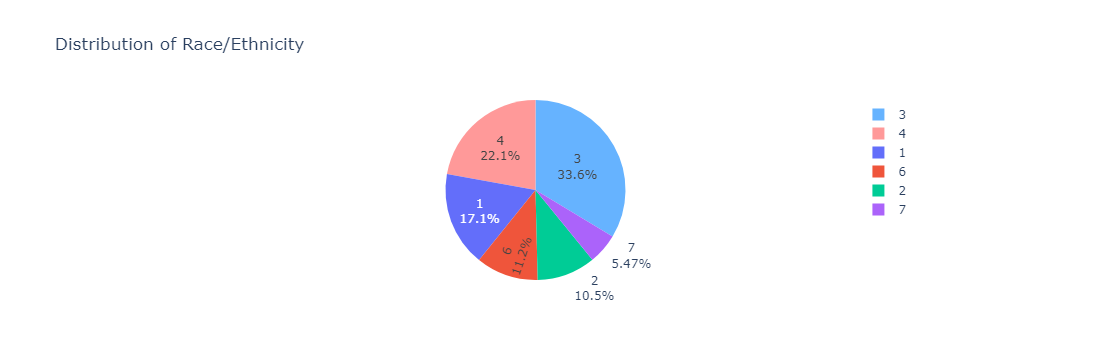

In [41]:
# Pie Chart for Race/Ethnicity Distribution
fig2 = px.pie(df_demo, names='Race_Ethnicity', title='Distribution of Race/Ethnicity')
fig2.update_traces(marker=dict(colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']), textinfo='percent+label')
fig2.show()


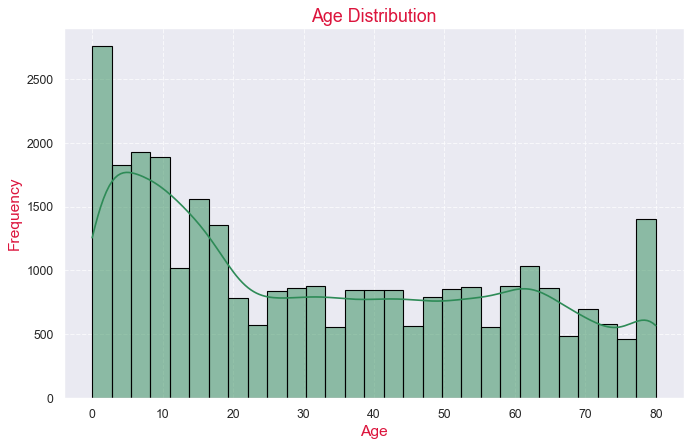

In [42]:
sns.set_palette("husl")  # Use a colorful palette from seaborn

# Create the histogram with KDE
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.histplot(df_demo['Age'], kde=True, color='seagreen', edgecolor='black')

# Customize the plot
plt.title('Age Distribution', fontsize=16, color='crimson')  # Title with color
plt.xlabel('Age', fontsize=14, color='crimson')  # X-axis label with color
plt.ylabel('Frequency', fontsize=14, color='crimson')  # Y-axis label with color
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid with dashed lines

# Show the plot
plt.show()

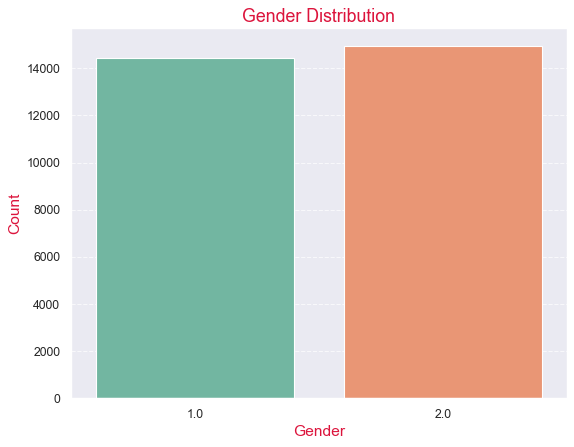

In [43]:
sns.set_palette("husl")  # Use a colorful palette from seaborn

# Create the count plot
plt.figure(figsize=(8, 6))  # Set the figure size for better visibility
sns.countplot(x='Gender', data=df_demo, palette='Set2')  # Apply a specific color palette

# Customize the plot
plt.title('Gender Distribution', fontsize=16, color='crimson')  # Title with color
plt.xlabel('Gender', fontsize=14, color='crimson')  # X-axis label with color
plt.ylabel('Count', fontsize=14, color='crimson')  # Y-axis label with color
plt.grid(True, linestyle='--', alpha=0.7, which='both', axis='y')  # Add a grid on the y-axis

# Show the plot
plt.show()

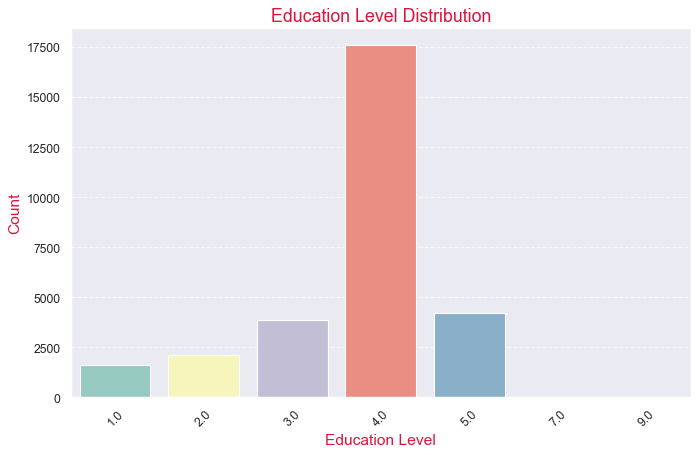

In [44]:
sns.set_palette("pastel")  # Choose a pastel color palette for a softer look

# Create the count plot
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.countplot(x='Education_Level_Adults', data=df_demo, palette='Set3')  # Apply a specific color palette

# Customize the plot
plt.title('Education Level Distribution', fontsize=16, color='crimson')  # Title with color
plt.xlabel('Education Level', fontsize=14, color='crimson')  # X-axis label with color
plt.ylabel('Count', fontsize=14, color='crimson')  # Y-axis label with color
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7, which='both', axis='y')  # Add a grid on the y-axis

# Show the plot
plt.show()

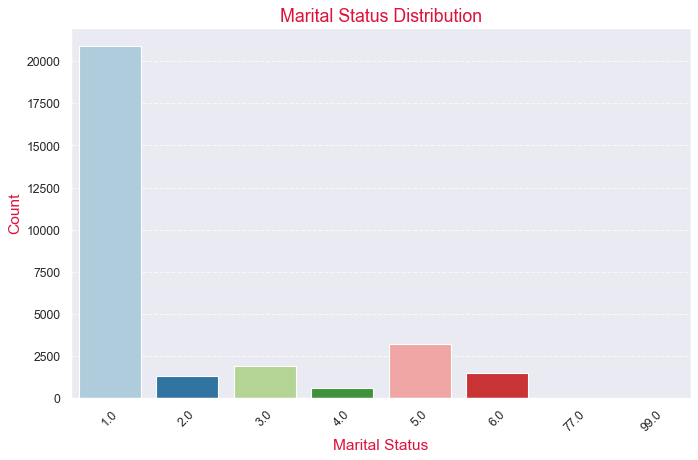

In [45]:
sns.set_palette("muted")  # Choose a muted color palette for a professional look

# Create the count plot
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
sns.countplot(x='Marital_Status', data=df_demo, palette='Paired')  # Apply a specific color palette

# Customize the plot
plt.title('Marital Status Distribution', fontsize=16, color='crimson')  # Title with color
plt.xlabel('Marital Status', fontsize=14, color='crimson')  # X-axis label with color
plt.ylabel('Count', fontsize=14, color='crimson')  # Y-axis label with color
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7, which='both', axis='y')  # Add a grid on the y-axis

# Show the plot
plt.show()

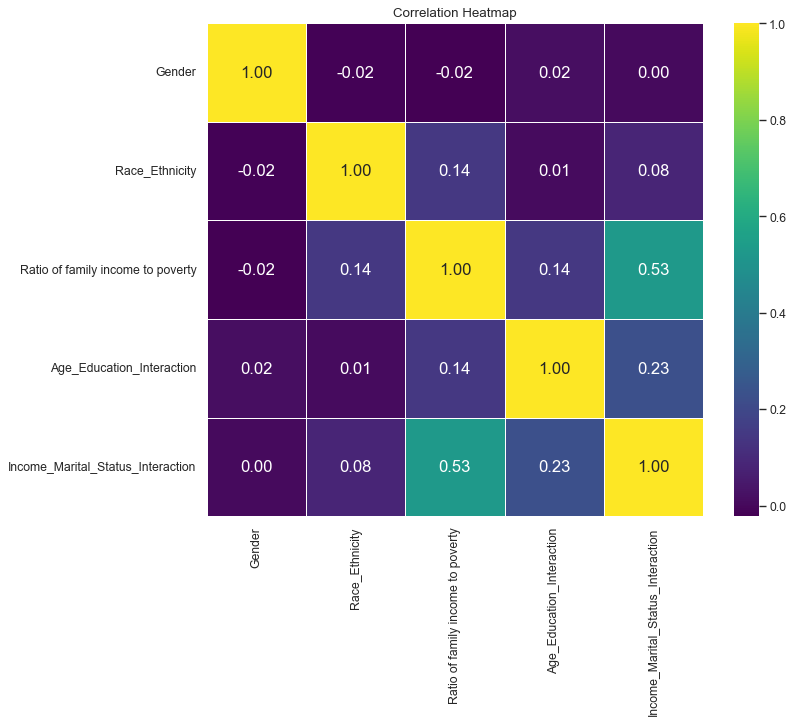

In [46]:
correlation_matrix = df_demo.drop(['SEQN', 'Year','Age','Marital_Status','Education_Level_Adults'], axis = 1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
df_demo.drop(['Age_Education_Interaction','Income_Marital_Status_Interaction'],axis=1,inplace=True)

In [48]:
df_demo

SEQN  Gender   Age  Race_Ethnicity  Education_Level_Adults  \
0       73557.0     1.0  69.0             4.0                     3.0   
1       73558.0     1.0  54.0             3.0                     3.0   
2       73559.0     1.0  72.0             3.0                     4.0   
3       73560.0     1.0   9.0             3.0                     4.0   
4       73561.0     2.0  73.0             3.0                     5.0   
...         ...     ...   ...             ...                     ...   
29395  102952.0     2.0  70.0             6.0                     3.0   
29396  102953.0     1.0  42.0             1.0                     3.0   
29397  102954.0     2.0  41.0             4.0                     5.0   
29398  102955.0     2.0  14.0             4.0                     4.0   
29399  102956.0     1.0  38.0             3.0                     4.0   

       Marital_Status  Ratio of family income to poverty       Year  
0                 4.0                           0.840000  2013-2014  
1                 1.0                           1.780000  2013-2014  
2                 1.0                           4.510000  2013-2014  
3                 1.0                           2.520000  2013-2014  
4                 1.0                           5.000000  2013-2014  
...               ...                                ...        ...  
29395             1.0                           0.950000  2017-2018  
29396             4.0                           2.295532  2017-2018  
29397             5.0                           1.180000  2017-2018  
29398             1.0                           2.240000  2017-2018  
29399             3.0                           1.560000  2017-2018  

[29400 rows x 8 columns]

In [49]:
df1=df_demo

#### Questionnaire Dataset

DLQ100	How often do you feel worried, anxious?	How often do you feel worried, nervous or anxious? Would you say daily, weekly, monthly, a few times a year, or never?

DLQ110	Take medication for these feelings?	Do you take medication for these feelings?

DLQ120	CHECK ITEM. IF DLQ100 = 5, GO TO DLQ140. OTHERWISE, CONTINUE.

DLQ130	How worried or anxious were you?	Thinking about the last time you felt worried, nervous or anxious, how would you describe the level of these feelings? Would you say a little, a lot, or somewhere in between?

DLQ140	How often do you feel depressed?	How often do you feel depressed? Would you say daily, weekly, monthly, a few times a year, or never?

DLQ150	Take medication for depression?	Do you take medication for depression?

DLQ160	CHECK ITEM. IF DLQ140 = 5, GO TO END OF SECTION. OTHERWISE, CONTINUE.

DLQ170	How depressed did you feel?	Thinking about the last time you felt depressed, how depressed did you feel? Would you say a little, a lot, or somewhere in between?

**PHQ-9 Questions**

1. DPQ010	- *Have little interest in doing things*
2. DPQ020	- *Feeling down, depressed, or hopeless*
3. DPQ030	- *Trouble sleeping or sleeping too much*
4. DPQ040	- *Feeling tired or having little energy*
5. DPQ050	- *Poor appetite or overeating*
6. DPQ060	- *Feeling bad about yourself*
7. DPQ070	- *Trouble concentrating on things*
8. DPQ080	- *Moving or speaking slowly or too fast*
9. DPQ090	- *Thought you would be better off dead*
10. DPQ100	- *Difficulty these problems have caused*

In [50]:
df_ques=pd.read_csv('quest.csv')

In [51]:
df_ques.head()

Unnamed: 0     SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  ALQ130  \
0           0  73557.0      1.0      NaN      NaN     NaN     NaN     1.0   
1           1  73558.0      1.0      NaN      NaN     NaN     NaN     4.0   
2           2  73559.0      1.0      NaN      NaN     NaN     NaN     NaN   
3           3  73560.0      1.0      NaN      NaN     NaN     NaN     NaN   
4           4  73561.0      1.0      NaN      NaN     NaN     NaN     NaN   

   ALQ151  BPQ020  ...  WHD080L  WHD110  WHD120  WHD130  WHD140  WHQ150  \
0     1.0     1.0  ...     40.0   270.0   200.0    69.0   270.0    62.0   
1     1.0     1.0  ...      NaN   240.0   250.0    72.0   250.0    25.0   
2     2.0     1.0  ...      NaN   180.0   190.0    70.0   228.0    35.0   
3     NaN     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
4     2.0     1.0  ...      NaN   150.0   135.0    67.0   170.0    60.0   

   WHQ030M  WHQ500  WHQ520       Year  
0      NaN     NaN     NaN  2013-2014  
1      NaN     NaN     NaN  2013-2014  
2      NaN     NaN     NaN  2013-2014  
3      3.0     3.0     3.0  2013-2014  
4      NaN     NaN     NaN  2013-2014  

[5 rows x 587 columns]

In [52]:
# Extract the PHQ-9 varibales for exploring depression score
DPQ_var = [name for name in df_questionnaire.columns if name.startswith("DPQ")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_depression = df_questionnaire[DPQ_var]

# Print the df_depression
df_depression

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  \
0         1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4         2.0     1.0     0.0     3.0     3.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
29395     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29396     1.0     1.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
29397     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29398     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
29399     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     0.0   

       DPQ100  
0         1.0  
1         0.0  
2         NaN  
3         NaN  
4         1.0  
...       ...  
29395     NaN  
29396     1.0  
29397     NaN  
29398     NaN  
29399     1.0  

[29400 rows x 10 columns]

In [53]:
# Check missing values for df_depression
df_depression['Answer_count'] = df_depression.notnull().sum(axis = 1)

# Filter out those respondents having missing values for all 10 questions
DPQ_df = df_depression[df_depression['Answer_count'] != 0]

# Print out the final dataframe
DPQ_df

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  \
0         1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         2.0     1.0     0.0     3.0     3.0     0.0     0.0     0.0     0.0   
5         3.0     3.0     3.0     3.0     3.0     1.0     2.0     1.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
29392     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29395     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29396     1.0     1.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
29397     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29399     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     0.0   

       DPQ100  Answer_count  
0         1.0            10  
1         0.0            10  
2         NaN             9  
4         1.0            10  
5         3.0            10  
...       ...           ...  
29392     NaN             9  
29395     NaN             9  
29396     1.0            10  
29397     NaN             9  
29399     1.0            10  

[15656 rows x 11 columns]

**For those left missing values, we consider to accept them as 0. All values now are from 0,1,2,3 for columns responsible for Mental Health, Depression Screening score.**

In [54]:
# Impute missing values with 0
DPQ_df = DPQ_df.fillna(0)

# Check the missing values again
DPQ_df.isnull().sum()

DPQ010          0
DPQ020          0
DPQ030          0
DPQ040          0
DPQ050          0
DPQ060          0
DPQ070          0
DPQ080          0
DPQ090          0
DPQ100          0
Answer_count    0
dtype: int64

**For those values which are not 0,1,2,3, we consider to ignore and accept as 0 as well (not to spoil the measure)**

- 0: 'Not at all'
- 1: 'Several days'
- 2: 'More than half the days'
- 3: 'Nearly every day'
- 7: 'Refused'
- 9: "Don't know"

In [55]:
# Ignore all 7 and 9 values and accept them as 0 as well as exclude the Answer_count
DPQ_df = DPQ_df.drop('Answer_count', axis = 1).apply(lambda row: row.map(lambda value: value if value in [0,1,2,3] else 0), axis = 1)

**Describe the final table showing answer counts for each question as well the total**

In [56]:
PHQ_describe = DPQ_df.apply(pd.Series.value_counts)
PHQ_describe.index.name = 'Asnwer Count'
PHQ_describe.loc['Total', :] = PHQ_describe.apply(np.sum)
PHQ_describe.astype(int)

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
Asnwer Count                                                                   
0.0            11600   11874    9742    7714   11676   13029   13006   13962   
1.0             2549    2606    3463    5235    2477    1752    1626    1043   
2.0              828     648    1088    1345     797     448     496     354   
3.0              679     528    1363    1362     706     427     528     297   
Total          15656   15656   15656   15656   15656   15656   15656   15656   

              DPQ090  DPQ100  
Asnwer Count                  
0.0            15086   12973  
1.0              384    2161  
2.0              100     375  
3.0               86     147  
Total          15656   15656

#### Depression Score Calculation

This score represent the sum of the values for the rows of Mental Health related features (10 questions from the PHQ-9 Questionnaire)

**Separate surveyed on 5 groups:**

1. Not depressed at all 0-4
2. Mild depression 5-9
3. Moderate Depression 10-14
4. Moderately Severe Depression 15-19
5. Severe Depression 20+

**Following Action:**

1. Not depressed: Patient may not need depression treatment.
2. Mild depression: Use clinical judgment about treatment, based on patient’s duration of symptoms and functional impairment.
3. Moderate Depression: Use clinical judgment about treatment, based on patient’s duration of symptoms and functional impairment.
4. Moderately Severe Depression: Treat using antidepressants, psychotherapy or a combination of treatment.
5. Severe Depression: Treat using antidepressants with or without psychotherapy.

**In this analysis, people with depression score equal or greater than 10 are accepted as depressed individuals for the future analytical measurements.**

In [57]:
# Create an info_df to keep the sequence number as well as the survey year for those selected respondents
info_df = df_questionnaire.loc[DPQ_df.index, ['SEQN', 'Year']]

In [58]:
# Sum all values from 10 questions to calculate depression score
DPQ_df['Depression_Score'] = DPQ_df.drop("DPQ100", axis = 1).sum(axis = 1)
DPQ_df

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  \
0         1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         2.0     1.0     0.0     3.0     3.0     0.0     0.0     0.0     0.0   
5         3.0     3.0     3.0     3.0     3.0     1.0     2.0     1.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
29392     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29395     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29396     1.0     1.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
29397     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29399     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     0.0   

       DPQ100  Depression_Score  
0         1.0               1.0  
1         0.0               2.0  
2         0.0               0.0  
4         1.0               9.0  
5         3.0              19.0  
...       ...               ...  
29392     0.0               0.0  
29395     0.0               0.0  
29396     1.0               3.0  
29397     0.0               0.0  
29399     1.0               7.0  

[15656 rows x 11 columns]

In [59]:
# Create depression labels based on the score ranges given above
depr_ranges = [-1, 5, 10, 15, 20, 31]
depr_labels = ['Not Depressed', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']

# Create a column named Depression_Label based on the given ranges
DPQ_df['Depression_Label'] = pd.cut(DPQ_df['Depression_Score'], bins = depr_ranges,
                                   labels = depr_labels)
DPQ_df

DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  DPQ090  \
0         1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         2.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         2.0     1.0     0.0     3.0     3.0     0.0     0.0     0.0     0.0   
5         3.0     3.0     3.0     3.0     3.0     1.0     2.0     1.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
29392     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29395     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29396     1.0     1.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
29397     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
29399     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     0.0   

       DPQ100  Depression_Score   Depression_Label  
0         1.0               1.0      Not Depressed  
1         0.0               2.0      Not Depressed  
2         0.0               0.0      Not Depressed  
4         1.0               9.0               Mild  
5         3.0              19.0  Moderately Severe  
...       ...               ...                ...  
29392     0.0               0.0      Not Depressed  
29395     0.0               0.0      Not Depressed  
29396     1.0               3.0      Not Depressed  
29397     0.0               0.0      Not Depressed  
29399     1.0               7.0               Mild  

[15656 rows x 12 columns]

In [60]:
# Create a column indicating if a person is depressed or not (Score >= 10)
DPQ_df['Depressed'] = DPQ_df['Depression_Score'].map(lambda x: 1 if x >= 10 else 0)

In [61]:
depr_groups = DPQ_df.groupby('Depression_Label').size()
depr_groups_percentile = depr_groups / depr_groups.sum() * 100
depr_groups_percentile = depr_groups_percentile.reset_index().rename(columns = {0: "Percentile"})

Text(0, 0.5, 'Percentage (%) ')

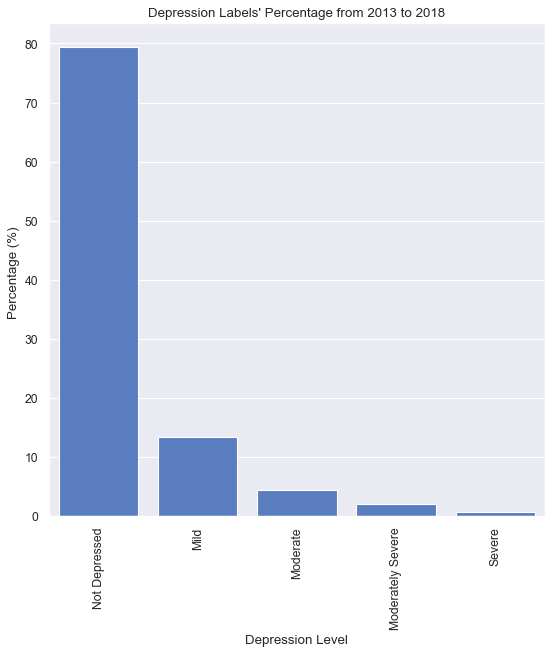

In [62]:
depr_bar = sns.barplot(data = depr_groups_percentile, x = 'Depression_Label', y = 'Percentile', estimator="mean")

plt.title("Depression Labels' Percentage from 2013 to 2018")
plt.xticks(rotation = 90)
plt.xlabel("Depression Level")
plt.ylabel("Percentage (%) ")

#### Suicide and Depression

People being considered as **Moderate, Moderately Severe, and Severe** who thought at least several times over the last two weeks (at the moment when survey was processed) they would be better of dead

In [63]:
depression_suicide = DPQ_df[DPQ_df['Depression_Label'].isin(depr_labels[-3:])]["DPQ090"].value_counts()
depression_suicide_perc = round(depression_suicide / depression_suicide.sum() * 100, 2)
depression_suicide_perc= depression_suicide_perc.reset_index().rename(columns = {'DPQ090': 'Suicidal_Potential',
                                                       'count': 'Percent'})

Text(0, 0.5, 'Percentage (%')

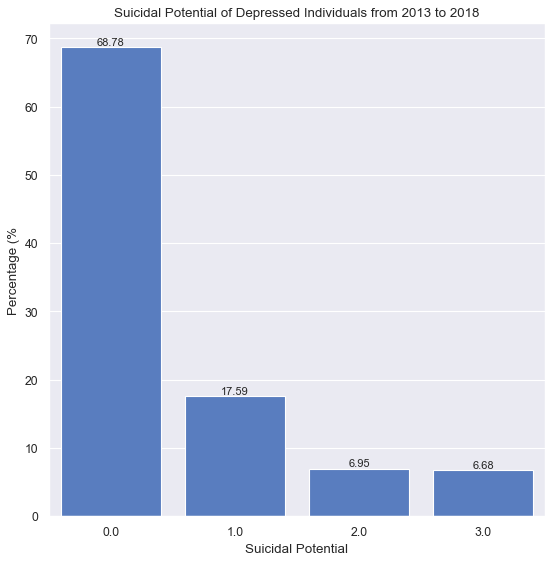

In [64]:
suicide_bar = sns.barplot(data = depression_suicide_perc, x = 'Suicidal_Potential', y = 'Percent')
suicide_bar.bar_label(suicide_bar.containers[0], fontsize=10);
plt.title("Suicidal Potential of Depressed Individuals from 2013 to 2018")
plt.xlabel("Suicidal Potential")
plt.ylabel("Percentage (%")

#### Explore the trends of Depression Level over the years from 2013 to 2018

In [65]:
year_depr = pd.concat([info_df, DPQ_df], axis = 1)
year_depr

SEQN       Year  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  \
0       73557.0  2013-2014     1.0     0.0     0.0     0.0     0.0     0.0   
1       73558.0  2013-2014     2.0     0.0     0.0     0.0     0.0     0.0   
2       73559.0  2013-2014     0.0     0.0     0.0     0.0     0.0     0.0   
4       73561.0  2013-2014     2.0     1.0     0.0     3.0     3.0     0.0   
5       73562.0  2013-2014     3.0     3.0     3.0     3.0     3.0     1.0   
...         ...        ...     ...     ...     ...     ...     ...     ...   
29392  102949.0  2017-2018     0.0     0.0     0.0     0.0     0.0     0.0   
29395  102952.0  2017-2018     0.0     0.0     0.0     0.0     0.0     0.0   
29396  102953.0  2017-2018     1.0     1.0     0.0     1.0     0.0     0.0   
29397  102954.0  2017-2018     0.0     0.0     0.0     0.0     0.0     0.0   
29399  102956.0  2017-2018     1.0     1.0     1.0     1.0     1.0     1.0   

       DPQ070  DPQ080  DPQ090  DPQ100  Depression_Score   Depression_Label  \
0         0.0     0.0     0.0     1.0               1.0      Not Depressed   
1         0.0     0.0     0.0     0.0               2.0      Not Depressed   
2         0.0     0.0     0.0     0.0               0.0      Not Depressed   
4         0.0     0.0     0.0     1.0               9.0               Mild   
5         2.0     1.0     0.0     3.0              19.0  Moderately Severe   
...       ...     ...     ...     ...               ...                ...   
29392     0.0     0.0     0.0     0.0               0.0      Not Depressed   
29395     0.0     0.0     0.0     0.0               0.0      Not Depressed   
29396     0.0     0.0     0.0     1.0               3.0      Not Depressed   
29397     0.0     0.0     0.0     0.0               0.0      Not Depressed   
29399     1.0     0.0     0.0     1.0               7.0               Mild   

       Depressed  
0              0  
1              0  
2              0  
4              0  
5              1  
...          ...  
29392          0  
29395          0  
29396          0  
29397          0  
29399          0  

[15656 rows x 15 columns]

In [66]:
year_depr_groups_perc = round(year_depr.groupby(['Year','Depression_Label']).size() / year_depr.groupby(['Year']).SEQN.count() * 100, 2)
year_depr_groups_perc = year_depr_groups_perc.reset_index().rename(columns = {0: 'Percent'})
year_depr_groups_perc

Year   Depression_Label  Percent
0   2013-2014      Not Depressed    79.01
1   2013-2014               Mild    13.10
2   2013-2014           Moderate     4.78
3   2013-2014  Moderately Severe     2.35
4   2013-2014             Severe     0.76
5   2015-2016      Not Depressed    79.92
6   2015-2016               Mild    13.48
7   2015-2016           Moderate     3.95
8   2015-2016  Moderately Severe     1.76
9   2015-2016             Severe     0.89
10  2017-2018      Not Depressed    79.31
11  2017-2018               Mild    13.43
12  2017-2018           Moderate     4.53
13  2017-2018  Moderately Severe     2.10
14  2017-2018             Severe     0.63

Text(0, 0.5, 'Percentage (%) ')

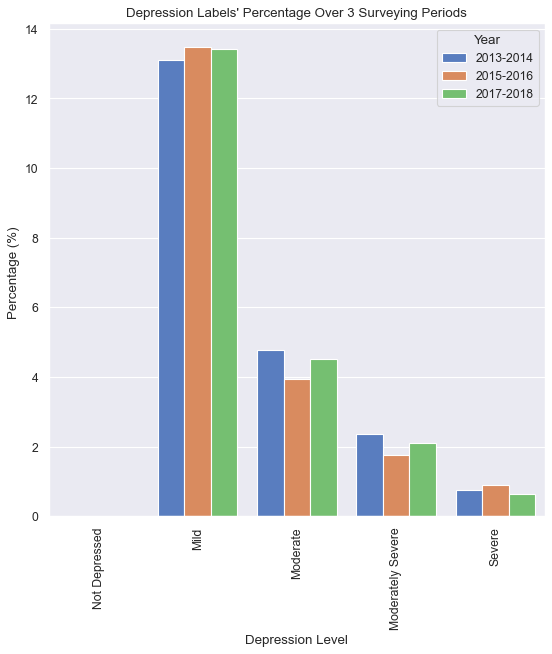

In [67]:
sns.barplot(data = year_depr_groups_perc[year_depr_groups_perc['Depression_Label'] != 'Not Depressed'],
            x = 'Depression_Label', y = 'Percent', hue = 'Year')

plt.title("Depression Labels' Percentage Over 3 Surveying Periods")
plt.xticks(rotation = 90)
plt.xlabel("Depression Level")
plt.ylabel("Percentage (%) ")

#### 2.1.2 Alcohol

In [68]:
# Extract the PHQ-9 varibales for exploring depression score
ALQ_var = [name for name in df_questionnaire.columns if name.startswith("ALQ")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_alcohol = df_questionnaire[ALQ_var].loc[DPQ_df.index, :]

# Print the df_depression
df_alcohol = pd.concat([info_df, df_alcohol], axis = 1)
df_alcohol

SEQN       Year  ALQ101  ALQ110  ALQ120Q  ALQ120U  ALQ130  ALQ141Q  \
0       73557.0  2013-2014     1.0     NaN      1.0      3.0     1.0      0.0   
1       73558.0  2013-2014     1.0     NaN      7.0      1.0     4.0      2.0   
2       73559.0  2013-2014     1.0     NaN      0.0      NaN     NaN      NaN   
4       73561.0  2013-2014     1.0     NaN      0.0      NaN     NaN      NaN   
5       73562.0  2013-2014     1.0     NaN      5.0      3.0     1.0      0.0   
...         ...        ...     ...     ...      ...      ...     ...      ...   
29392  102949.0  2017-2018     NaN     NaN      NaN      NaN     NaN      NaN   
29395  102952.0  2017-2018     NaN     NaN      NaN      NaN     NaN      NaN   
29396  102953.0  2017-2018     NaN     NaN      NaN      NaN    12.0      NaN   
29397  102954.0  2017-2018     NaN     NaN      NaN      NaN     NaN      NaN   
29399  102956.0  2017-2018     NaN     NaN      NaN      NaN     2.0      NaN   

       ALQ141U  ALQ151  ALQ160  ALQ111  ALQ121  ALQ142  ALQ270  ALQ280  \
0          NaN     1.0     NaN     NaN     NaN     NaN     NaN     NaN   
1          1.0     1.0     0.0     NaN     NaN     NaN     NaN     NaN   
2          NaN     2.0     NaN     NaN     NaN     NaN     NaN     NaN   
4          NaN     2.0     NaN     NaN     NaN     NaN     NaN     NaN   
5          NaN     2.0     0.0     NaN     NaN     NaN     NaN     NaN   
...        ...     ...     ...     ...     ...     ...     ...     ...   
29392      NaN     NaN     NaN     2.0     NaN     NaN     NaN     NaN   
29395      NaN     2.0     NaN     1.0     0.0     NaN     NaN     NaN   
29396      NaN     2.0     NaN     1.0     6.0     6.0     0.0     6.0   
29397      NaN     NaN     NaN     2.0     NaN     NaN     NaN     NaN   
29399      NaN     2.0     NaN     1.0     8.0    10.0     0.0     0.0   

       ALQ290  ALQ170  
0         NaN     NaN  
1         NaN     NaN  
2         NaN     NaN  
4         NaN     NaN  
5         NaN     NaN  
...       ...     ...  
29392     NaN     NaN  
29395     NaN     NaN  
29396     0.0     0.0  
29397     NaN     NaN  
29399     NaN     0.0  

[15656 rows x 18 columns]

In [69]:
# split up the alcohol_df by Year to handling missing values
alcohol_13_16 = df_alcohol[df_alcohol.Year != '2017-2018']
alcohol_17_18 = df_alcohol[df_alcohol.Year == '2017-2018']

In [70]:
# Select those variables that have no of missing values less than half of the length of dataframe 
selected_ALQ_var = [name for name in df_alcohol.columns if df_alcohol[name].isnull().sum() < (len(df_alcohol) * 2/3)]

# Filter out those unnecessary varibales to maintain the focus on selected ones
ALQ_df = df_alcohol[selected_ALQ_var].drop(['ALQ120U', 'ALQ141Q'], axis = 1)

# Add Depression Score to the alcohol_df
ALQ_df['Depression_Score'] = DPQ_df['Depression_Score']
# ALQ_df['Depression_Label'] = DPQ_df['Depression_Label']
# ALQ_df['Depressed'] = DPQ_df['Depressed']

In [71]:
ALQ_df.head(10)

SEQN       Year  ALQ101  ALQ120Q  ALQ130  ALQ151  Depression_Score
0   73557.0  2013-2014     1.0      1.0     1.0     1.0               1.0
1   73558.0  2013-2014     1.0      7.0     4.0     1.0               2.0
2   73559.0  2013-2014     1.0      0.0     NaN     2.0               0.0
4   73561.0  2013-2014     1.0      0.0     NaN     2.0               9.0
5   73562.0  2013-2014     1.0      5.0     1.0     2.0              19.0
7   73564.0  2013-2014     2.0      2.0     1.0     2.0               2.0
9   73566.0  2013-2014     1.0      1.0     1.0     2.0               1.0
10  73567.0  2013-2014     1.0      4.0     3.0     2.0               3.0
11  73568.0  2013-2014     1.0      2.0     2.0     2.0               0.0
14  73571.0  2013-2014     2.0      2.0     1.0     2.0               6.0

#### Feature Engineering from Alcohol Features

**2013 - 2016**
- How often did you drink alcoholic beverage per Week(1), Month(2), Year(3)? ALQ120Q + ALQ120U
- Avergae alcoholic drinks in past 12 months? ALQ130
- Ever 4/5 or more drinks every day? ALQ151

**2017 - 2018**
- Avergae alcoholic drinks in past 12 months? ALQ130
- How often did you have alcoholic drink past 12 months? ALQ121
- Ever 4/5 or more drinks every day? ALQ151

**New Features**
- Total Alcohol Consumption Per Year

For 2013-2016: Combine ALQ120Q and ALQ120U to calculate the total number of drinks per year.
If ALQ120Q == 1, multiply ALQ120U by 52 (weeks in a year).
If ALQ120Q == 2, multiply ALQ120U by 12 (months in a year).
If ALQ120Q == 3, use ALQ120U directly.
For 2017-2018: Use ALQ121 directly if it represents the total number of drinks in the past year.
- Average Drinks Per Occasion

For 2013-2016: Use ALQ130 to determine the average drinks per occasion based on the reported average over 12 months.
For 2017-2018: Same as above.
- High-Consumption Indicator

For both periods, create a binary feature indicating if the respondent ever had 4/5 or more drinks in a day (ALQ151).
1 if ALQ151 == 1, otherwise 0.

- Consistent Drinking Pattern

For both periods, create a feature that indicates if the person drinks regularly. If the person drinks weekly or monthly, they are considered a regular drinker.
For 2013-2016: 1 if ALQ120Q == 1 or ALQ120Q == 2, otherwise 0.
For 2017-2018: Based on the frequency reported in ALQ121.

In [72]:
ALQ_df.head(10)

SEQN       Year  ALQ101  ALQ120Q  ALQ130  ALQ151  Depression_Score
0   73557.0  2013-2014     1.0      1.0     1.0     1.0               1.0
1   73558.0  2013-2014     1.0      7.0     4.0     1.0               2.0
2   73559.0  2013-2014     1.0      0.0     NaN     2.0               0.0
4   73561.0  2013-2014     1.0      0.0     NaN     2.0               9.0
5   73562.0  2013-2014     1.0      5.0     1.0     2.0              19.0
7   73564.0  2013-2014     2.0      2.0     1.0     2.0               2.0
9   73566.0  2013-2014     1.0      1.0     1.0     2.0               1.0
10  73567.0  2013-2014     1.0      4.0     3.0     2.0               3.0
11  73568.0  2013-2014     1.0      2.0     2.0     2.0               0.0
14  73571.0  2013-2014     2.0      2.0     1.0     2.0               6.0

In [73]:
# Ignore all 7, 9, 77, 99, 777, 999 values and accept them as 0 as well as exclude the Answer_count
ALQ_df = ALQ_df.drop(['SEQN','Year', 'Depression_Score'], axis = 1).apply(
    lambda row: row.map(
        lambda value: 2 if value in [7,9,77,99,777,999] else value), axis = 1)

In [74]:
# ALQ120Q and ALQ130, convert those having more than 15 alcoholic 
# drinks to 15 (represent for 15 and more)
ALQ_df = ALQ_df.apply(
    lambda row: row.map(
        lambda value: 15 if value >= 15 else value), axis = 1)

In [75]:
# Final alcohol_df before missing value imputation
alcohol_df = pd.concat([df_alcohol[['SEQN', 'Year']], ALQ_df], axis = 1)
alcohol_df['Depression_Label'] = DPQ_df['Depression_Label']
alcohol_df

SEQN       Year  ALQ101  ALQ120Q  ALQ130  ALQ151   Depression_Label
0       73557.0  2013-2014     1.0      1.0     1.0     1.0      Not Depressed
1       73558.0  2013-2014     1.0      2.0     4.0     1.0      Not Depressed
2       73559.0  2013-2014     1.0      0.0     NaN     2.0      Not Depressed
4       73561.0  2013-2014     1.0      0.0     NaN     2.0               Mild
5       73562.0  2013-2014     1.0      5.0     1.0     2.0  Moderately Severe
...         ...        ...     ...      ...     ...     ...                ...
29392  102949.0  2017-2018     NaN      NaN     NaN     NaN      Not Depressed
29395  102952.0  2017-2018     NaN      NaN     NaN     2.0      Not Depressed
29396  102953.0  2017-2018     NaN      NaN    12.0     2.0      Not Depressed
29397  102954.0  2017-2018     NaN      NaN     NaN     NaN      Not Depressed
29399  102956.0  2017-2018     NaN      NaN     2.0     2.0               Mild

[15656 rows x 7 columns]

In [76]:
# Function to get the first mode
def get_first_mode(series):
    mode = series.mode()
    if not mode.empty:
        return mode[0]
    else:
        return None

# Calculate the mode for each group
ALQ101_mode_values = alcohol_df.groupby(['Depression_Label'])['ALQ101'].apply(get_first_mode).reset_index()
ALQ101_mode_values.columns = ['Depression_Label', 'ALQ101_target']

# Merge the mode values back into the original DataFrame
alcohol_df = alcohol_df.merge(ALQ101_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
alcohol_df['ALQ101'].fillna(alcohol_df['ALQ101_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
alcohol_df.drop(columns=['ALQ101_target'], inplace=True)

In [77]:
# Calculate the mode for each group
ALQ151_mode_values = alcohol_df.groupby(['Depression_Label'])['ALQ151'].apply(get_first_mode).reset_index()
ALQ151_mode_values.columns = ['Depression_Label', 'ALQ151_target']

# Merge the mode values back into the original DataFrame
alcohol_df = alcohol_df.merge(ALQ151_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
alcohol_df['ALQ151'].fillna(alcohol_df['ALQ151_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
alcohol_df.drop(columns=['ALQ151_target'], inplace=True)

In [78]:
# Calculate the mode for each group
ALQ120_mode_values = alcohol_df.groupby(['Depression_Label'])['ALQ120Q'].mean().reset_index()
ALQ120_mode_values.columns = ['Depression_Label', 'ALQ120_target']

# Merge the mode values back into the original DataFrame
alcohol_df = alcohol_df.merge(ALQ120_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
alcohol_df['ALQ120Q'].fillna(alcohol_df['ALQ120_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
alcohol_df.drop(columns=['ALQ120_target'], inplace=True)

In [79]:
# Calculate the mode for each group
ALQ130_mode_values = alcohol_df.groupby(['Depression_Label'])['ALQ130'].mean().reset_index()
ALQ130_mode_values.columns = ['Depression_Label', 'ALQ130_target']

# Merge the mode values back into the original DataFrame
alcohol_df = alcohol_df.merge(ALQ130_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
alcohol_df['ALQ130'].fillna(alcohol_df['ALQ130_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
alcohol_df.drop(columns=['ALQ130_target'], inplace=True)

In [80]:
alcohol_df['Depression_Score'] = DPQ_df['Depression_Score']

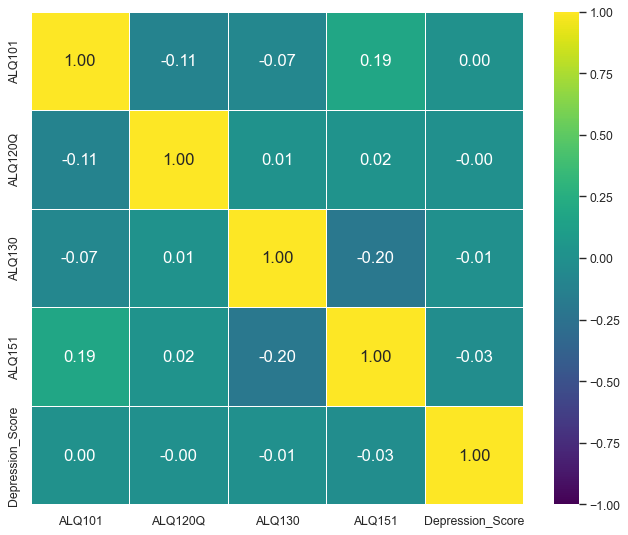

In [81]:
corr = alcohol_df.drop(['SEQN', 'Year', 'Depression_Label'], axis = 1).corr()

plt.figure(figsize = (10,8))
sns.heatmap(data = corr, cmap = 'viridis', vmin = -1, 
            vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)

plt.show()

In [82]:
#pip install seaborn --upgrade

<div class="alert alert-block alert-success">
<b> Alcohol Drinking Pattern Over Depression Levels: </b> 
    
**Observations**
- There is no correlation between alcohol usage and depression score, which means it is rejected that depressed individuals tend to have more alcoholic drinks to ease themselves.
    
</div>

### Money Spent (CBD)

In [83]:
# Extract the PHQ-9 varibales for exploring depression score
CBD_var = [name for name in df_questionnaire.columns if name.startswith("CBD")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_money_spent = df_questionnaire[CBD_var].loc[DPQ_df.index, :]

# Print the df_depression
df_money_spent = pd.concat([info_df, df_money_spent], axis = 1)
df_money_spent

SEQN       Year  CBD070  CBD090  CBD110  CBD120  CBD130  CBD071  \
0       73557.0  2013-2014   300.0     0.0    50.0     0.0    85.0     NaN   
1       73558.0  2013-2014   642.0   214.0   128.0    40.0    20.0     NaN   
2       73559.0  2013-2014   150.0    25.0     0.0    40.0     0.0     NaN   
4       73561.0  2013-2014   200.0     0.0    40.0     0.0     0.0     NaN   
5       73562.0  2013-2014   150.0    60.0     0.0    60.0     0.0     NaN   
...         ...        ...     ...     ...     ...     ...     ...     ...   
29392  102949.0  2017-2018     NaN     NaN     NaN     NaN     NaN   550.0   
29395  102952.0  2017-2018     NaN     NaN     NaN     NaN     NaN   450.0   
29396  102953.0  2017-2018     NaN     NaN     NaN     NaN     NaN   250.0   
29397  102954.0  2017-2018     NaN     NaN     NaN     NaN     NaN   300.0   
29399  102956.0  2017-2018     NaN     NaN     NaN     NaN     NaN  1200.0   

       CBD091  CBD111  CBD121  CBD131  CBD760  CBD765  CBD770  
0         NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1         NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2         NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4         NaN     NaN     NaN     NaN     NaN     NaN     NaN  
5         NaN     NaN     NaN     NaN     NaN     NaN     NaN  
...       ...     ...     ...     ...     ...     ...     ...  
29392     0.0    75.0    65.0    40.0     NaN     NaN     NaN  
29395   100.0   100.0   120.0     0.0     NaN     NaN     NaN  
29396     0.0   128.0   200.0     0.0     NaN     NaN     NaN  
29397     0.0   400.0   200.0    40.0     NaN     NaN     NaN  
29399   200.0   150.0   200.0     0.0     NaN     NaN     NaN  

[15656 rows x 15 columns]

In [84]:
# All columns under different names seem to represent the same information over the years of survey
# For example CBD070 (2013-2014) is actually CBD071 (2015-2018)
money_spent_13_14 = df_money_spent[df_money_spent.Year == '2013-2014'][['CBD070','CBD090','CBD110','CBD120','CBD130']].rename(columns = {'CBD070': 'CBD071',
                                                                                                                                        'CBD090': 'CBD091',
                                                                                                                                        'CBD110': 'CBD111',
                                                                                                                                        'CBD120': 'CBD121',
                                                                                                                                        'CBD130': 'CBD131'})
money_spent_15_18 = df_money_spent[df_money_spent.Year != '2013-2014'][['CBD071','CBD091','CBD111','CBD121','CBD131']]

# Stack df_13_14 on top of df_15_18
money_spent_df = pd.concat([money_spent_13_14, money_spent_15_18], axis = 0)
money_spent_df

CBD071  CBD091  CBD111  CBD121  CBD131
0       300.0     0.0    50.0     0.0    85.0
1       642.0   214.0   128.0    40.0    20.0
2       150.0    25.0     0.0    40.0     0.0
4       200.0     0.0    40.0     0.0     0.0
5       150.0    60.0     0.0    60.0     0.0
...       ...     ...     ...     ...     ...
29392   550.0     0.0    75.0    65.0    40.0
29395   450.0   100.0   100.0   120.0     0.0
29396   250.0     0.0   128.0   200.0     0.0
29397   300.0     0.0   400.0   200.0    40.0
29399  1200.0   200.0   150.0   200.0     0.0

[15656 rows x 5 columns]

In [85]:
# Ignore all 7, 9, 77, 99, 777, 999 values and accept them as 0 as well as exclude the Answer_count
money_spent_df = money_spent_df.apply(
    lambda row: row.map(
        lambda value: 0 if value in [777777,999999] else value), axis = 1)

In [86]:
money_spent_df = pd.concat([df_money_spent[['SEQN', 'Year']], money_spent_df], axis = 1)
money_spent_df['Total_Expense'] = money_spent_df['CBD071'] + money_spent_df['CBD091'] + money_spent_df['CBD111'] + money_spent_df['CBD121'] + money_spent_df['CBD131']
money_spent_df['Avg_Expense_PerDay'] = round(money_spent_df['Total_Expense'] / 30, 2)
money_spent_df['Depression_Score'] = DPQ_df['Depression_Score']
money_spent_df['Depression_Label'] = DPQ_df['Depression_Label']
money_spent_df

SEQN       Year  CBD071  CBD091  CBD111  CBD121  CBD131  \
0       73557.0  2013-2014   300.0     0.0    50.0     0.0    85.0   
1       73558.0  2013-2014   642.0   214.0   128.0    40.0    20.0   
2       73559.0  2013-2014   150.0    25.0     0.0    40.0     0.0   
4       73561.0  2013-2014   200.0     0.0    40.0     0.0     0.0   
5       73562.0  2013-2014   150.0    60.0     0.0    60.0     0.0   
...         ...        ...     ...     ...     ...     ...     ...   
29392  102949.0  2017-2018   550.0     0.0    75.0    65.0    40.0   
29395  102952.0  2017-2018   450.0   100.0   100.0   120.0     0.0   
29396  102953.0  2017-2018   250.0     0.0   128.0   200.0     0.0   
29397  102954.0  2017-2018   300.0     0.0   400.0   200.0    40.0   
29399  102956.0  2017-2018  1200.0   200.0   150.0   200.0     0.0   

       Total_Expense  Avg_Expense_PerDay  Depression_Score   Depression_Label  
0              435.0               14.50               1.0      Not Depressed  
1             1044.0               34.80               2.0      Not Depressed  
2              215.0                7.17               0.0      Not Depressed  
4              240.0                8.00               9.0               Mild  
5              270.0                9.00              19.0  Moderately Severe  
...              ...                 ...               ...                ...  
29392          730.0               24.33               0.0      Not Depressed  
29395          770.0               25.67               0.0      Not Depressed  
29396          578.0               19.27               3.0      Not Depressed  
29397          940.0               31.33               0.0      Not Depressed  
29399         1750.0               58.33               7.0               Mild  

[15656 rows x 11 columns]

In [87]:
money_spent_df.isnull().sum()

SEQN                    0
Year                    0
CBD071                436
CBD091                443
CBD111                436
CBD121                436
CBD131                438
Total_Expense         445
Avg_Expense_PerDay    445
Depression_Score        0
Depression_Label        0
dtype: int64

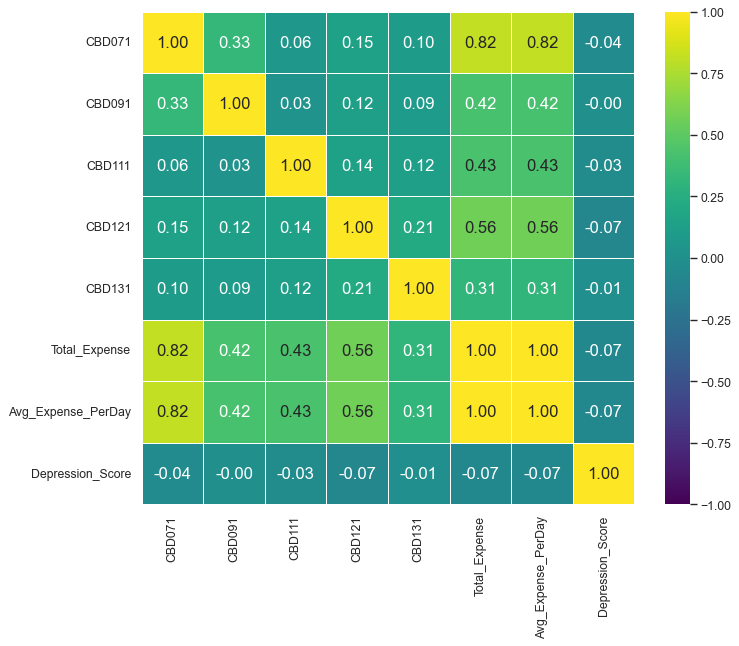

In [88]:
CBD_corr = money_spent_df.drop(['SEQN', 'Year', 'Depression_Label'], axis = 1).corr()

plt.figure(figsize = (10,8))
sns.heatmap(data = CBD_corr, cmap = 'viridis', vmin = -1, 
            vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)

plt.show()

<div class="alert alert-block alert-success">
<b> Money Spending Pattern Over Depression Levels: </b> 
    
- CBD071	questionnaire	Money spent at supermarket/grocery store	The next questions are about how much money {your family spends/you spend} on food.

- CBD091	questionnaire	Money spent on nonfood items	About how much money was spent on nonfood items? (You can tell me per week or per month.)

- CBD111	questionnaire	Money spent on food at other stores	About how much money {did your family/did you} spend on food at these types of stores? Please do not include money you have already told me about. (You can tell me per week or per month.)

- CBD121	questionnaire	Money spent on eating out	During the past 30 days, how much money {did your family/did you} spend on eating out? Please include money spent in cafeterias at work or at school or on vending machines, for all family members. (You can tell me per week or per month.)

- CBD131	questionnaire	Money spent on carryout/delivered foods	During the past 30 days, how much money {did your family/did you} spend on food carried out or delivered? Please do not include money you have already told me about. (You can tell me per week or per month.)
    
**Observations**
- There is no correlation between different types of expense as well as the total expense in the last 30 days and depression score, which means it is rejected that depressed individuals tend to spend much money to ease themselves.
    
</div>

### Drug (DUQ)

In [89]:
# Extract the PHQ-9 varibales for exploring depression score
DUQ_var = [name for name in df_questionnaire.columns if name.startswith("DUQ")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_drug = df_questionnaire[DUQ_var].loc[DPQ_df.index, :]

# Print the df_depression
df_drug = pd.concat([info_df, df_drug], axis = 1)
df_drug

SEQN       Year  DUQ200  DUQ210  DUQ211  DUQ213  DUQ215Q  DUQ215U  \
0       73557.0  2013-2014     NaN     NaN     NaN     NaN      NaN      NaN   
1       73558.0  2013-2014     1.0    18.0     1.0    18.0      1.0      1.0   
2       73559.0  2013-2014     NaN     NaN     NaN     NaN      NaN      NaN   
4       73561.0  2013-2014     NaN     NaN     NaN     NaN      NaN      NaN   
5       73562.0  2013-2014     1.0    16.0     1.0    24.0     30.0      4.0   
...         ...        ...     ...     ...     ...     ...      ...      ...   
29392  102949.0  2017-2018     1.0    18.0     1.0    18.0     15.0      1.0   
29395  102952.0  2017-2018     NaN     NaN     NaN     NaN      NaN      NaN   
29396  102953.0  2017-2018     2.0     NaN     NaN     NaN      NaN      NaN   
29397  102954.0  2017-2018     2.0     NaN     NaN     NaN      NaN      NaN   
29399  102956.0  2017-2018     1.0    16.0     2.0     NaN      NaN      NaN   

       DUQ217  DUQ219  ...  DUQ380B  DUQ380C  DUQ380D  DUQ380E  DUQ390  \
0         NaN     NaN  ...      NaN      NaN      NaN      NaN     NaN   
1         5.0     3.0  ...      NaN      NaN      NaN      NaN     NaN   
2         NaN     NaN  ...      NaN      NaN      NaN      NaN     NaN   
4         NaN     NaN  ...      NaN      NaN      NaN      NaN     NaN   
5         2.0     1.0  ...      NaN      NaN      NaN      NaN     NaN   
...       ...     ...  ...      ...      ...      ...      ...     ...   
29392     3.0     1.0  ...      NaN      NaN      NaN      NaN     NaN   
29395     NaN     NaN  ...      NaN      NaN      NaN      NaN     NaN   
29396     NaN     NaN  ...      NaN      NaN      NaN      NaN     NaN   
29397     NaN     NaN  ...      NaN      NaN      NaN      NaN     NaN   
29399     NaN     NaN  ...      NaN      NaN      NaN      NaN     NaN   

       DUQ400Q  DUQ400U  DUQ410  DUQ420  DUQ430  
0          NaN      NaN     NaN     NaN     NaN  
1          NaN      NaN     NaN     NaN     2.0  
2          NaN      NaN     NaN     NaN     NaN  
4          NaN      NaN     NaN     NaN     NaN  
5          NaN      NaN     NaN     NaN     2.0  
...        ...      ...     ...     ...     ...  
29392      NaN      NaN     NaN     NaN     1.0  
29395      NaN      NaN     NaN     NaN     NaN  
29396      NaN      NaN     NaN     NaN     NaN  
29397      NaN      NaN     NaN     NaN     NaN  
29399      NaN      NaN     NaN     NaN     2.0  

[15656 rows x 43 columns]

In [90]:
# Select those variables that have no of missing values less than half of the length of dataframe 
selected_DUQ_var = [name for name in df_drug.columns if df_drug[name].isnull().sum() < (len(df_drug) * 1/2)]

# Filter out those unnecessary varibales to maintain the focus on selected ones
DUQ_df = df_drug[['SEQN', 'Year', 'DUQ200']]

# Add Depression Score to the alcohol_df
DUQ_df['Depression_Score'] = DPQ_df['Depression_Score']
DUQ_df['Depression_Label'] = DPQ_df['Depression_Label']

In [91]:
DUQ_df.isnull().sum()

SEQN                   0
Year                   0
DUQ200              5338
Depression_Score       0
Depression_Label       0
dtype: int64

In [92]:
# Final alcohol_df before missing value imputation
drug_df = pd.concat([df_drug[['SEQN', 'Year']], DUQ_df], axis = 1)
drug_df['Depression_Label'] = DPQ_df['Depression_Label']
drug_df['Depression_Score'] = DPQ_df['Depression_Score']
drug_df

SEQN       Year      SEQN       Year  DUQ200  Depression_Score  \
0       73557.0  2013-2014   73557.0  2013-2014     NaN               1.0   
1       73558.0  2013-2014   73558.0  2013-2014     1.0               2.0   
2       73559.0  2013-2014   73559.0  2013-2014     NaN               0.0   
4       73561.0  2013-2014   73561.0  2013-2014     NaN               9.0   
5       73562.0  2013-2014   73562.0  2013-2014     1.0              19.0   
...         ...        ...       ...        ...     ...               ...   
29392  102949.0  2017-2018  102949.0  2017-2018     1.0               0.0   
29395  102952.0  2017-2018  102952.0  2017-2018     NaN               0.0   
29396  102953.0  2017-2018  102953.0  2017-2018     2.0               3.0   
29397  102954.0  2017-2018  102954.0  2017-2018     2.0               0.0   
29399  102956.0  2017-2018  102956.0  2017-2018     1.0               7.0   

        Depression_Label  
0          Not Depressed  
1          Not Depressed  
2          Not Depressed  
4                   Mild  
5      Moderately Severe  
...                  ...  
29392      Not Depressed  
29395      Not Depressed  
29396      Not Depressed  
29397      Not Depressed  
29399               Mild  

[15656 rows x 7 columns]

In [93]:
# Calculate the mode for each group
DUQ200_mode_values = drug_df.groupby(['Depression_Label'])['DUQ200'].apply(get_first_mode).reset_index()
DUQ200_mode_values.columns = ['Depression_Label', 'DUQ200_target']

# Merge the mode values back into the original DataFrame
drug_df = drug_df.merge(DUQ200_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
drug_df['DUQ200'].fillna(drug_df['DUQ200_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
drug_df.drop(columns=['DUQ200_target'], inplace=True)

In [94]:
# Rename column's name
drug_df.rename(columns = {'DUQ200': 'Marijuana_Use'}, inplace = True)

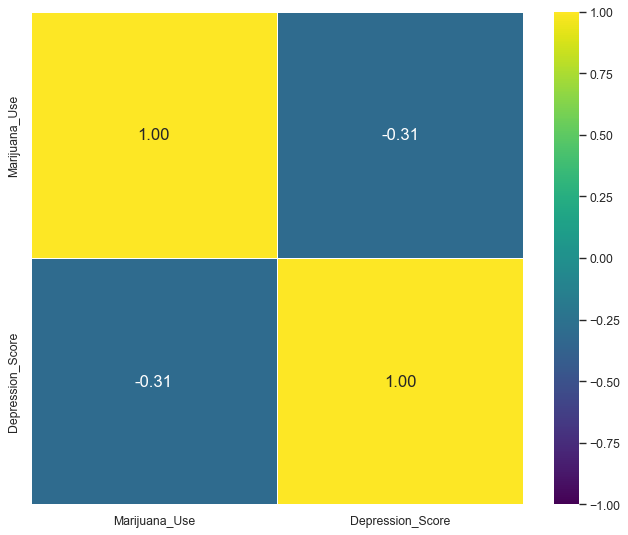

In [95]:
DUQ_corr = drug_df.drop(['SEQN', 'Year', 'Depression_Label'], axis = 1).corr()

plt.figure(figsize = (10,8))
sns.heatmap(data = DUQ_corr, cmap = 'viridis', vmin = -1, 
            vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)

plt.show()

<div class="alert alert-block alert-success">
<b> Drug Usage's Pattern Over Depression Levels: </b> 
    
- DUQ200: Ever used marijuana or hashish

**Features' values**
- DUQ200:
    - {1: 'Yes', 2: 'No', 7: 'Refused', 9: "Don't know", '.': 'Missing'}
    - Feature Explanation: 
        - The following questions ask about use of drugs not prescribed by a doctor. Please remember that your answers to these questions are strictly confidential. The first questions are about marijuana and hashish. Marijuana is also called pot or grass. Marijuana is usually smoked, either in cigarettes, called joints, or in a pipe. It is sometimes cooked in food. Hashish is a form of marijuana that is also called 'hash.' It is usually smoked in a pipe. Another form of hashish is hash oil. Have you ever, even once, used marijuana or hashish?

**Observations**
- Drug and Depression are considerably negative-correlated (-0.33), which means that respondents who use drug, specifically Marijuana or Hashish tend to suffer from depression, and vice versa. This explains why depressed individuals potentially use drug to ease their depression.
    

### Physical Activity (PAQ)

In [96]:
# Extract the PHQ-9 varibales for exploring depression score
PAQ_var = [name for name in df_questionnaire.columns if name.startswith("PAQ")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_act = df_questionnaire[PAQ_var].loc[DPQ_df.index, :]

# Print the df_depression
df_act = pd.concat([info_df, df_act], axis = 1)
df_act

SEQN       Year  PAQ605  PAQ610  PAQ620  PAQ625  PAQ635  PAQ640  \
0       73557.0  2013-2014     2.0     NaN     2.0     NaN     2.0     NaN   
1       73558.0  2013-2014     2.0     NaN     1.0     1.0     2.0     NaN   
2       73559.0  2013-2014     2.0     NaN     1.0     7.0     2.0     NaN   
4       73561.0  2013-2014     2.0     NaN     1.0     2.0     2.0     NaN   
5       73562.0  2013-2014     1.0     5.0     2.0     NaN     2.0     NaN   
...         ...        ...     ...     ...     ...     ...     ...     ...   
29392  102949.0  2017-2018     1.0     3.0     1.0     7.0     1.0     7.0   
29395  102952.0  2017-2018     2.0     NaN     2.0     NaN     2.0     NaN   
29396  102953.0  2017-2018     1.0     3.0     1.0     3.0     2.0     NaN   
29397  102954.0  2017-2018     2.0     NaN     2.0     NaN     2.0     NaN   
29399  102956.0  2017-2018     2.0     NaN     2.0     NaN     2.0     NaN   

       PAQ650  PAQ655  ...  PAQ759V  PAQ762  PAQ764  PAQ766  PAQ679  PAQ750  \
0         2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
1         2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
2         2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
4         2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
5         2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
...       ...     ...  ...      ...     ...     ...     ...     ...     ...   
29392     2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
29395     2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
29396     2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
29397     2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   
29399     2.0     NaN  ...      NaN     NaN     NaN     NaN     NaN     NaN   

       PAQ770  PAQ772A  PAQ772B  PAQ772C  
0         NaN      NaN      NaN      NaN  
1         NaN      NaN      NaN      NaN  
2         NaN      NaN      NaN      NaN  
4         NaN      NaN      NaN      NaN  
5         NaN      NaN      NaN      NaN  
...       ...      ...      ...      ...  
29392     NaN      NaN      NaN      NaN  
29395     NaN      NaN      NaN      NaN  
29396     NaN      NaN      NaN      NaN  
29397     NaN      NaN      NaN      NaN  
29399     NaN      NaN      NaN      NaN  

[15656 rows x 89 columns]

In [97]:
# Select those variables that have no of missing values less than half of the length of dataframe 
selected_PAQ_var = [name for name in df_act.columns if df_act[name].isnull().sum() < (len(df_act) * 1/2)]

# Filter out those unnecessary varibales to maintain the focus on selected ones
PAQ_df = df_act[selected_PAQ_var]

# Add Depression Score to the alcohol_df
PAQ_df['Depression_Score'] = DPQ_df['Depression_Score']
PAQ_df['Depression_Label'] = DPQ_df['Depression_Label']
PAQ_df

SEQN       Year  PAQ605  PAQ620  PAQ635  PAQ650  PAQ665  PAQ710  \
0       73557.0  2013-2014     2.0     2.0     2.0     2.0     2.0     2.0   
1       73558.0  2013-2014     2.0     1.0     2.0     2.0     2.0     4.0   
2       73559.0  2013-2014     2.0     1.0     2.0     2.0     1.0     4.0   
4       73561.0  2013-2014     2.0     1.0     2.0     2.0     2.0     1.0   
5       73562.0  2013-2014     1.0     2.0     2.0     2.0     2.0     5.0   
...         ...        ...     ...     ...     ...     ...     ...     ...   
29392  102949.0  2017-2018     1.0     1.0     1.0     2.0     2.0     NaN   
29395  102952.0  2017-2018     2.0     2.0     2.0     2.0     1.0     NaN   
29396  102953.0  2017-2018     1.0     1.0     2.0     2.0     2.0     NaN   
29397  102954.0  2017-2018     2.0     2.0     2.0     2.0     1.0     NaN   
29399  102956.0  2017-2018     2.0     2.0     2.0     2.0     2.0     NaN   

       PAQ715  Depression_Score   Depression_Label  
0         8.0               1.0      Not Depressed  
1         8.0               2.0      Not Depressed  
2         0.0               0.0      Not Depressed  
4         1.0               9.0               Mild  
5         8.0              19.0  Moderately Severe  
...       ...               ...                ...  
29392     NaN               0.0      Not Depressed  
29395     NaN               0.0      Not Depressed  
29396     NaN               3.0      Not Depressed  
29397     NaN               0.0      Not Depressed  
29399     NaN               7.0               Mild  

[15656 rows x 11 columns]

In [98]:
PAQ_df.isnull().sum()

SEQN                   0
Year                   0
PAQ605                 0
PAQ620                 0
PAQ635                 0
PAQ650                 0
PAQ665                 0
PAQ710              5094
PAQ715              5094
Depression_Score       0
Depression_Label       0
dtype: int64

In [99]:
# Calculate the mode for each group
PAQ710_mode_values = PAQ_df.groupby(['Depression_Label'])['PAQ710'].apply(get_first_mode).reset_index()
PAQ710_mode_values.columns = ['Depression_Label', 'PAQ710_target']
PAQ710_mode_values

Depression_Label  PAQ710_target
0      Not Depressed            2.0
1               Mild            5.0
2           Moderate            5.0
3  Moderately Severe            5.0
4             Severe            5.0

### Smoke (SMQ)

In [100]:
# Extract the PHQ-9 varibales for exploring depression score
SMQ_var = [name for name in df_questionnaire.columns if name.startswith("SMQ")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_smoke = df_questionnaire[SMQ_var].loc[DPQ_df.index, :]

# Print the df_depression
df_smoke = pd.concat([info_df, df_smoke], axis = 1)
df_smoke

SEQN       Year  SMQ020  SMQ040  SMQ050Q  SMQ050U  SMQ078  SMQ621  \
0       73557.0  2013-2014     1.0     3.0      3.0      4.0     NaN     NaN   
1       73558.0  2013-2014     1.0     2.0      NaN      NaN     NaN     NaN   
2       73559.0  2013-2014     1.0     3.0     40.0      4.0     NaN     NaN   
4       73561.0  2013-2014     2.0     NaN      NaN      NaN     NaN     NaN   
5       73562.0  2013-2014     1.0     3.0     16.0      4.0     NaN     NaN   
...         ...        ...     ...     ...      ...      ...     ...     ...   
29392  102949.0  2017-2018     1.0     1.0      NaN      NaN     1.0     NaN   
29395  102952.0  2017-2018     2.0     NaN      NaN      NaN     NaN     NaN   
29396  102953.0  2017-2018     1.0     3.0      9.0      3.0     NaN     NaN   
29397  102954.0  2017-2018     2.0     NaN      NaN      NaN     NaN     NaN   
29399  102956.0  2017-2018     1.0     1.0      NaN      NaN     2.0     NaN   

       SMQ661  SMQ665A  ...  SMQ080  SMQ890  SMQ895  SMQ900  SMQ905  SMQ910  \
0         NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
1         NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2         NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4         NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
5         NaN      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
...       ...      ...  ...     ...     ...     ...     ...     ...     ...   
29392     NaN      NaN  ...     NaN     1.0     0.0     2.0     NaN     1.0   
29395     NaN      NaN  ...     NaN     2.0     NaN     2.0     NaN     2.0   
29396     NaN      NaN  ...     NaN     1.0     0.0     1.0     0.0     1.0   
29397     NaN      NaN  ...     NaN     2.0     NaN     2.0     NaN     2.0   
29399     NaN      NaN  ...     NaN     2.0     NaN     2.0     NaN     1.0   

       SMQ915  SMQ690K  SMQ857O  SMQ940  
0         NaN      NaN      NaN     NaN  
1         NaN      NaN      NaN     NaN  
2         NaN      NaN      NaN     NaN  
4         NaN      NaN      NaN     NaN  
5         NaN      NaN      NaN     NaN  
...       ...      ...      ...     ...  
29392     0.0      NaN      NaN     2.0  
29395     NaN      NaN      NaN     2.0  
29396     0.0      NaN      NaN     1.0  
29397     NaN      NaN      NaN     2.0  
29399     0.0      NaN      NaN     2.0  

[15656 rows x 68 columns]

In [101]:
# Select those variables that have no of missing values less than half of the length of dataframe 
selected_SMQ_var = [name for name in df_smoke.columns if df_smoke[name].isnull().sum() < (len(df_smoke) * 1/2)]

# Filter out those unnecessary varibales to maintain the focus on selected ones
SMQ_df = df_smoke[selected_SMQ_var]

# Add Depression Score to the alcohol_df
SMQ_df['Depression_Score'] = DPQ_df['Depression_Score']

In [102]:
SMQ_df

SEQN       Year  SMQ020  SMQ856  SMQ858  SMQ860  SMQ862  SMQ866  \
0       73557.0  2013-2014     1.0     2.0     NaN     2.0     NaN     2.0   
1       73558.0  2013-2014     1.0     1.0     2.0     2.0     NaN     2.0   
2       73559.0  2013-2014     1.0     2.0     NaN     1.0     2.0     2.0   
4       73561.0  2013-2014     2.0     2.0     NaN     2.0     NaN     2.0   
5       73562.0  2013-2014     1.0     1.0     2.0     1.0     2.0     2.0   
...         ...        ...     ...     ...     ...     ...     ...     ...   
29392  102949.0  2017-2018     1.0     2.0     NaN     2.0     NaN     2.0   
29395  102952.0  2017-2018     2.0     2.0     NaN     2.0     NaN     2.0   
29396  102953.0  2017-2018     1.0     1.0     1.0     1.0     2.0     2.0   
29397  102954.0  2017-2018     2.0     2.0     NaN     2.0     NaN     2.0   
29399  102956.0  2017-2018     1.0     2.0     NaN     1.0     2.0     1.0   

       SMQ870  SMQ872  SMQ874  SMQ878  SMQ880  SMQ681  SMQ851  SMQ863  SMQ890  \
0         1.0     2.0     2.0     1.0     2.0     1.0     2.0     2.0     NaN   
1         1.0     1.0     2.0     2.0     NaN     1.0     2.0     2.0     NaN   
2         1.0     2.0     2.0     1.0     2.0     2.0     2.0     2.0     NaN   
4         1.0     2.0     2.0     1.0     2.0     2.0     2.0     2.0     NaN   
5         1.0     2.0     2.0     1.0     2.0     2.0     2.0     2.0     NaN   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
29392     1.0     1.0     2.0     1.0     2.0     1.0     2.0     2.0     1.0   
29395     1.0     2.0     2.0     1.0     2.0     2.0     2.0     2.0     2.0   
29396     1.0     2.0     2.0     1.0     1.0     2.0     2.0     2.0     1.0   
29397     1.0     2.0     2.0     1.0     2.0     2.0     2.0     2.0     2.0   
29399     1.0     2.0     2.0     2.0     NaN     1.0     2.0     2.0     2.0   

       SMQ900  SMQ910  Depression_Score  
0         NaN     NaN               1.0  
1         NaN     NaN               2.0  
2         NaN     NaN               0.0  
4         NaN     NaN               9.0  
5         NaN     NaN              19.0  
...       ...     ...               ...  
29392     2.0     1.0               0.0  
29395     2.0     2.0               0.0  
29396     1.0     1.0               3.0  
29397     2.0     2.0               0.0  
29399     2.0     1.0               7.0  

[15656 rows x 20 columns]

In [103]:
SMQ_df.isnull().sum()

SEQN                   0
Year                   0
SMQ020                 0
SMQ856                 1
SMQ858              7420
SMQ860                 1
SMQ862              6817
SMQ866                 1
SMQ870                 1
SMQ872              1728
SMQ874                 1
SMQ878                 1
SMQ880              6406
SMQ681                14
SMQ851                16
SMQ863                16
SMQ890              5398
SMQ900              5398
SMQ910              5398
Depression_Score       0
dtype: int64

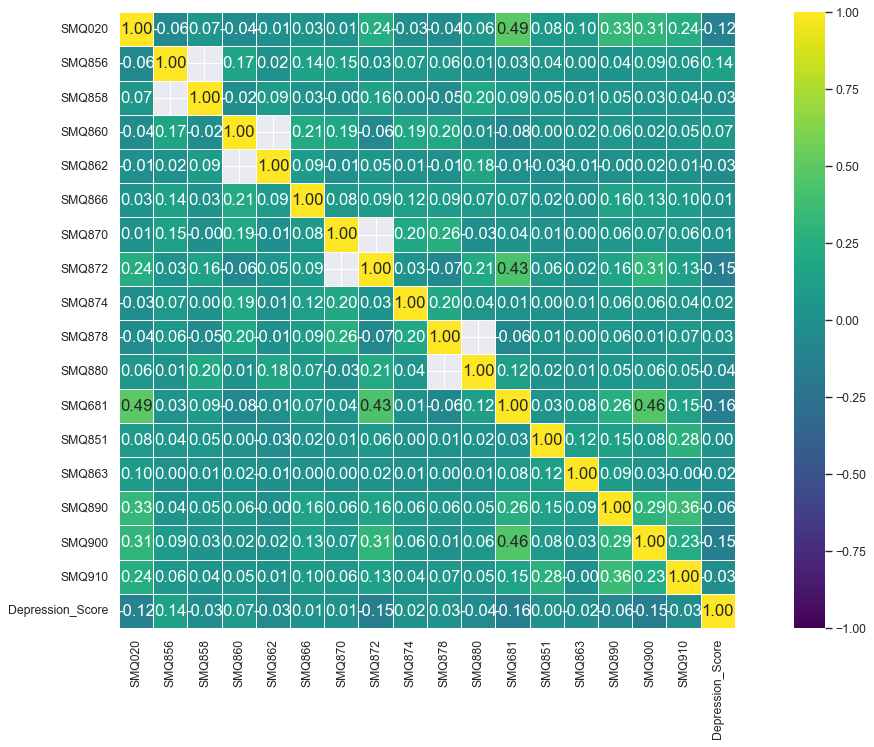

In [104]:
SMQ_corr = SMQ_df.drop(['SEQN', 'Year'], axis = 1).corr()

plt.figure(figsize = (19,10))
sns.heatmap(data = SMQ_corr, cmap = 'viridis', vmin = -1, 
            vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)

plt.show()

<div class="alert alert-block alert-success">
<b> Smoking Pattern Over Depression Levels: </b> 
    
**Observations**
- It's pretty hard to pick up valuable insights in terms of smoking habits because of all variables not reflecting any continuous smoking patterns, only yes/no questions. 
    
</div>

### Occupation (OCQ)


In [105]:
# Extract the PHQ-9 varibales for exploring depression score
OCQ_var = [name for name in df_questionnaire.columns if name.startswith("OC")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_job = df_questionnaire[OCQ_var].loc[DPQ_df.index, :]

# Print the df_depression
df_job = pd.concat([info_df, df_job], axis = 1)
df_job

SEQN       Year  OCD150  OCQ180  OCQ210  OCQ260  OCD270  OCQ380  \
0       73557.0  2013-2014     4.0     NaN     NaN     NaN     NaN     3.0   
1       73558.0  2013-2014     1.0    50.0     NaN     1.0   420.0     NaN   
2       73559.0  2013-2014     4.0     NaN     NaN     NaN     NaN     3.0   
4       73561.0  2013-2014     4.0     NaN     NaN     NaN     NaN     4.0   
5       73562.0  2013-2014     1.0    56.0     NaN     2.0   372.0     NaN   
...         ...        ...     ...     ...     ...     ...     ...     ...   
29392  102949.0  2017-2018     1.0    80.0     NaN     5.0    60.0     NaN   
29395  102952.0  2017-2018     4.0     NaN     NaN     NaN     NaN     3.0   
29396  102953.0  2017-2018     1.0    42.0     NaN     1.0   204.0     NaN   
29397  102954.0  2017-2018     3.0     NaN     NaN     NaN     NaN     NaN   
29399  102956.0  2017-2018     4.0     NaN     NaN     NaN     NaN     4.0   

       OCD390G  OCD395  OCQ600  OCQ610  OCQ630  OCQ640  OCQ660  OCQ670  
0          1.0   204.0     NaN     NaN     NaN     NaN     NaN     NaN  
1          2.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2          1.0   216.0     NaN     NaN     NaN     NaN     NaN     NaN  
4          1.0   372.0     NaN     NaN     NaN     NaN     NaN     NaN  
5          2.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
...        ...     ...     ...     ...     ...     ...     ...     ...  
29392      2.0     NaN     NaN     NaN     NaN     NaN     NaN     5.0  
29395      1.0   168.0     NaN     NaN     NaN     NaN     NaN     NaN  
29396      1.0   216.0     NaN     NaN     NaN     NaN     NaN     5.0  
29397      1.0   120.0     NaN     NaN     NaN     NaN     NaN     NaN  
29399      1.0   120.0     NaN     NaN     NaN     NaN     NaN     NaN  

[15656 rows x 16 columns]

In [106]:
# Select those variables that have no of missing values less than half of the length of dataframe 
selected_OCQ_var = [name for name in df_job.columns if df_job[name].isnull().sum() < (len(df_job) * 2/3)]
selected_OCQ_var

['SEQN',
 'Year',
 'OCD150',
 'OCQ180',
 'OCQ260',
 'OCD270',
 'OCQ380',
 'OCD390G',
 'OCD395']

In [107]:
# Filter out those unnecessary varibales to maintain the focus on selected ones
OCQ_df = df_job[['SEQN', 'Year', 'OCD150', 'OCD390G']]

# Add Depression Score to the alcohol_df
OCQ_df['Depression_Score'] = DPQ_df['Depression_Score']
OCQ_df['Depression_Label'] = DPQ_df['Depression_Label']
OCQ_df.head()

SEQN       Year  OCD150  OCD390G  Depression_Score   Depression_Label
0  73557.0  2013-2014     4.0      1.0               1.0      Not Depressed
1  73558.0  2013-2014     1.0      2.0               2.0      Not Depressed
2  73559.0  2013-2014     4.0      1.0               0.0      Not Depressed
4  73561.0  2013-2014     4.0      1.0               9.0               Mild
5  73562.0  2013-2014     1.0      2.0              19.0  Moderately Severe

In [108]:
# Ignore all 7, 9, 77, 99, 777, 999 values and accept them as 0 as well as exclude the Answer_count
OCQ_df = OCQ_df.drop(['SEQN','Year', 'Depression_Score', 'Depression_Label'], axis = 1).apply(
    lambda row: row.map(
        lambda value: 4 if value in [7,9] else value), axis = 1)

In [109]:
# Final alcohol_df before missing value imputation
job_df = pd.concat([df_job[['SEQN', 'Year']], OCQ_df], axis = 1)
job_df['Depression_Label'] = DPQ_df['Depression_Label']
job_df['Depression_Score'] = DPQ_df['Depression_Score']
job_df

SEQN       Year  OCD150  OCD390G   Depression_Label  \
0       73557.0  2013-2014     4.0      1.0      Not Depressed   
1       73558.0  2013-2014     1.0      2.0      Not Depressed   
2       73559.0  2013-2014     4.0      1.0      Not Depressed   
4       73561.0  2013-2014     4.0      1.0               Mild   
5       73562.0  2013-2014     1.0      2.0  Moderately Severe   
...         ...        ...     ...      ...                ...   
29392  102949.0  2017-2018     1.0      2.0      Not Depressed   
29395  102952.0  2017-2018     4.0      1.0      Not Depressed   
29396  102953.0  2017-2018     1.0      1.0      Not Depressed   
29397  102954.0  2017-2018     3.0      1.0      Not Depressed   
29399  102956.0  2017-2018     4.0      1.0               Mild   

       Depression_Score  
0                   1.0  
1                   2.0  
2                   0.0  
4                   9.0  
5                  19.0  
...                 ...  
29392               0.0  
29395               0.0  
29396               3.0  
29397               0.0  
29399               7.0  

[15656 rows x 6 columns]

In [110]:
# Calculate the mode for each group
OCD150_mode_values = job_df.groupby(['Depression_Label'])['OCD150'].apply(get_first_mode).reset_index()
OCD150_mode_values.columns = ['Depression_Label', 'OCD15_target']

# Merge the mode values back into the original DataFrame
job_df = job_df.merge(OCD150_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
job_df['OCD150'].fillna(job_df['OCD15_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
job_df.drop(columns=['OCD15_target'], inplace=True)

In [111]:
# Calculate the mode for each group
OCD390_mode_values = job_df.groupby(['Depression_Label'])['OCD390G'].apply(get_first_mode).reset_index()
OCD390_mode_values.columns = ['Depression_Label', 'OCD390_target']

# Merge the mode values back into the original DataFrame
job_df = job_df.merge(OCD390_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
job_df['OCD390G'].fillna(job_df['OCD390_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
job_df.drop(columns=['OCD390_target'], inplace=True)

In [112]:
# Drop low correlated feature
job_df = job_df.drop('OCD390G', axis = 1)

# Rename column's name
job_df.rename(columns = {'OCD150': 'Occupation_Status'}, inplace = True)

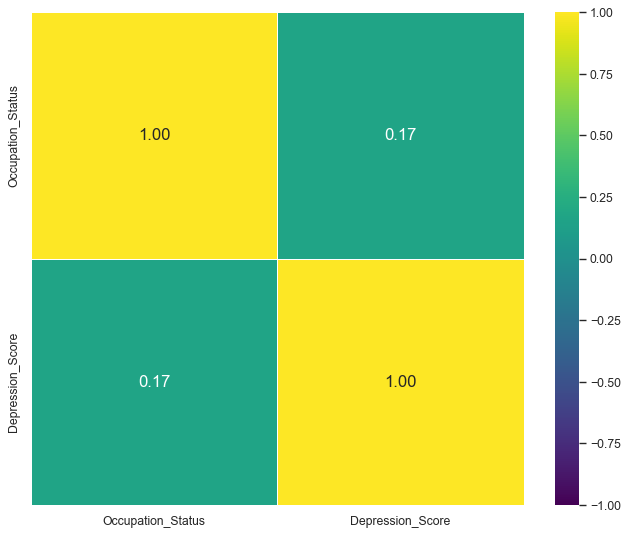

In [113]:
OCQ_corr = job_df.drop(['SEQN', 'Year', 'Depression_Label'], axis = 1).corr()

plt.figure(figsize = (10,8))
sns.heatmap(data = OCQ_corr, cmap = 'viridis', vmin = -1, 
            vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)

plt.show()

<div class="alert alert-block alert-success">
<b> Occupation Pattern Over Depression Levels: </b> 
    
- OCD150: Type of work respondent is currently doing

**Features' values**
- OCD150: {
    - 1: 'Working at a job or business,', 
    - 2: 'With a job or business but not at work,', 
    - 3: 'Looking for work, or', 
    - 4: 'Not working at a job or business?', 
    - 7: 'Refused', 
    - 9: "Don't know", 
    - '.': 'Missing'}

**Observations**
- Occupation and Depression are slightly positive-correlated (0.17), which means that respondents who are currently having a job or still looking for work tend to feel depressed.
    
</div>

### Income (IN)

In [114]:
# Extract the PHQ-9 varibales for exploring depression score
IN_var = [name for name in df_questionnaire.columns if name.startswith("IN")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_income = df_questionnaire[IN_var].loc[DPQ_df.index, :]

# Print the df_depression
df_income = pd.concat([info_df, df_income], axis = 1)
df_income

SEQN       Year  INQ020  INQ012  INQ030  INQ060  INQ080  INQ090  \
0       73557.0  2013-2014     2.0     2.0     1.0     2.0     2.0     2.0   
1       73558.0  2013-2014     1.0     1.0     1.0     2.0     2.0     2.0   
2       73559.0  2013-2014     2.0     2.0     1.0     2.0     1.0     2.0   
4       73561.0  2013-2014     2.0     2.0     1.0     2.0     2.0     2.0   
5       73562.0  2013-2014     1.0     2.0     2.0     2.0     2.0     2.0   
...         ...        ...     ...     ...     ...     ...     ...     ...   
29392  102949.0  2017-2018     2.0     1.0     2.0     2.0     2.0     2.0   
29395  102952.0  2017-2018     2.0     2.0     1.0     2.0     2.0     2.0   
29396  102953.0  2017-2018     1.0     2.0     2.0     2.0     2.0     2.0   
29397  102954.0  2017-2018     1.0     2.0     1.0     2.0     2.0     1.0   
29399  102956.0  2017-2018     2.0     2.0     2.0     2.0     2.0     2.0   

       INQ132  INQ140  INQ150  IND235  INDFMMPI  INDFMMPC  INQ244  IND247  \
0         2.0     2.0     2.0     4.0      0.86       1.0     9.0     NaN   
1         2.0     1.0     2.0     5.0      0.92       1.0     1.0     NaN   
2         2.0     1.0     2.0    10.0      4.37       3.0     NaN     NaN   
4         2.0     2.0     2.0    11.0      5.00       3.0     NaN     NaN   
5         2.0     2.0     2.0    10.0      5.00       3.0     NaN     NaN   
...       ...     ...     ...     ...       ...       ...     ...     ...   
29392     2.0     2.0     1.0     6.0      0.92       1.0     NaN     NaN   
29395     2.0     2.0     2.0     4.0      0.95       1.0     NaN     NaN   
29396     2.0     2.0     2.0    77.0       NaN       7.0     NaN     NaN   
29397     2.0     2.0     1.0    12.0      5.00       3.0     NaN     NaN   
29399     2.0     2.0     1.0     7.0      1.56       2.0     NaN     NaN   

       INQ300  IND310  INQ320  
0         NaN     NaN     NaN  
1         NaN     NaN     NaN  
2         NaN     NaN     NaN  
4         NaN     NaN     NaN  
5         NaN     NaN     NaN  
...       ...     ...     ...  
29392     2.0     1.0     1.0  
29395     2.0     1.0     1.0  
29396     2.0     1.0     1.0  
29397     2.0     1.0     1.0  
29399     2.0     1.0     1.0  

[15656 rows x 19 columns]

In [115]:
# Select those variables that have no of missing values less than half of the length of dataframe 
selected_IN_var = [name for name in df_income.columns if df_income[name].isnull().sum() < (len(df_income) * 2/3)]
selected_IN_var

['SEQN',
 'Year',
 'INQ020',
 'INQ012',
 'INQ030',
 'INQ060',
 'INQ080',
 'INQ090',
 'INQ132',
 'INQ140',
 'INQ150',
 'IND235',
 'INDFMMPI',
 'INDFMMPC',
 'INQ300',
 'IND310',
 'INQ320']

In [116]:
# Filter out those unnecessary varibales to maintain the focus on selected ones
INQ_df = df_income[['SEQN', 'Year', 'INDFMMPI']]

# Add Depression Score to the alcohol_df
INQ_df['Depression_Score'] = DPQ_df['Depression_Score']
INQ_df['Depression_Label'] = DPQ_df['Depression_Label']
INQ_df.head()

SEQN       Year  INDFMMPI  Depression_Score   Depression_Label
0  73557.0  2013-2014      0.86               1.0      Not Depressed
1  73558.0  2013-2014      0.92               2.0      Not Depressed
2  73559.0  2013-2014      4.37               0.0      Not Depressed
4  73561.0  2013-2014      5.00               9.0               Mild
5  73562.0  2013-2014      5.00              19.0  Moderately Severe

In [117]:
# Calculate the mean for each group
IND_mean_values = INQ_df.groupby(['Depression_Label'])['INDFMMPI'].mean().reset_index()
IND_mean_values.columns = ['Depression_Label', 'IND_target']

# Merge the mode values back into the original DataFrame
INQ_df = INQ_df.merge(IND_mean_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
INQ_df['INDFMMPI'].fillna(INQ_df['IND_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
INQ_df.drop(columns=['IND_target'], inplace=True)

In [118]:
# Rename the column's name
INQ_df.rename(columns = {'INDFMMPI': 'Family_Poverty_LvIndex'}, inplace = True)

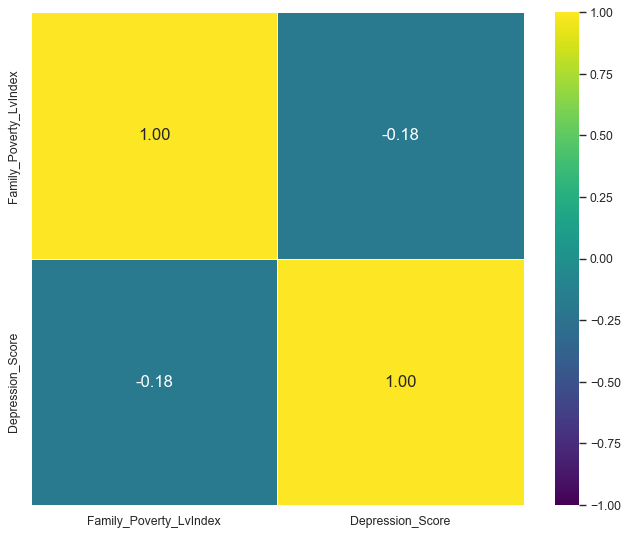

In [119]:
INQ_corr = INQ_df.drop(['SEQN', 'Year', 'Depression_Label'], axis = 1).corr()

plt.figure(figsize = (10,8))
sns.heatmap(data = INQ_corr, cmap = 'viridis', vmin = -1, 
            vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)

plt.show()

<div class="alert alert-block alert-success">
<b> Income Pattern Over Depression Levels: </b> 
    
- INDFMMPI: Family Monthly Poverty Level Index

**Features' values**
- INDFMMPI: {5: 'Value greater than or equal to 5.00', '.': 'Missing'}
    
**Feature Explanation**
The INDFMMPI (Income to Poverty Ratio) indicates the relative income of a household compared to the poverty threshold. Here's how to interpret the ratio:

- **Higher INDFMMPI**: Indicates that the household's income is higher relative to the poverty threshold. This means the household is better off economically. For example, an INDFMMPI of 5 means the household's income is five times the poverty threshold, indicating a comfortable financial situation.

- **Lower INDFMMPI**: Indicates that the household's income is closer to the poverty threshold, suggesting a more precarious economic situation. For example, an INDFMMPI of 1 means the household's income is equal to the poverty threshold, indicating they are at the poverty line.

**Observations**
- Respondents who better off financially from the poverty threshold based on the size and composition of their family tend to less suffer from depression, and vice versa. (Negative Correlation between the feature and depression, -0.18)
    
</div>

### Sleep (SLQ)

In [120]:
# Extract the PHQ-9 varibales for exploring depression score
SLQ_var = [name for name in df_questionnaire.columns if name.startswith("SLQ")]

# Create a subset of varibles for PHQ-9 Questionnaire
df_sleep = df_questionnaire[SLQ_var].loc[DPQ_df.index, :]

# Print the df_depression
df_sleep = pd.concat([info_df, df_sleep], axis = 1)
df_sleep

SEQN       Year  SLQ050  SLQ060    SLQ300    SLQ310  SLQ030  \
0       73557.0  2013-2014     1.0     2.0       NaN       NaN     NaN   
1       73558.0  2013-2014     2.0     2.0       NaN       NaN     NaN   
2       73559.0  2013-2014     2.0     2.0       NaN       NaN     NaN   
4       73561.0  2013-2014     2.0     2.0       NaN       NaN     NaN   
5       73562.0  2013-2014     2.0     1.0       NaN       NaN     NaN   
...         ...        ...     ...     ...       ...       ...     ...   
29392  102949.0  2017-2018     2.0     NaN  b'23:30'  b'06:00'     2.0   
29395  102952.0  2017-2018     2.0     NaN  b'22:30'  b'07:00'     0.0   
29396  102953.0  2017-2018     1.0     NaN  b'22:00'  b'04:00'     0.0   
29397  102954.0  2017-2018     2.0     NaN  b'22:00'  b'06:00'     1.0   
29399  102956.0  2017-2018     1.0     NaN  b'23:00'  b'07:00'     0.0   

       SLQ040  SLQ120    SLQ320    SLQ330  
0         NaN     NaN       NaN       NaN  
1         NaN     NaN       NaN       NaN  
2         NaN     NaN       NaN       NaN  
4         NaN     NaN       NaN       NaN  
5         NaN     NaN       NaN       NaN  
...       ...     ...       ...       ...  
29392     0.0     2.0  b'23:30'  b'06:00'  
29395     0.0     0.0  b'22:30'  b'07:00'  
29396     1.0     2.0  b'23:00'  b'04:00'  
29397     0.0     1.0  b'00:00'  b'07:00'  
29399     0.0     1.0  b'02:00'  b'09:00'  

[15656 rows x 11 columns]

In [121]:
# Select those variables that have no of missing values less than half of the length of dataframe 
selected_SLQ_var = [name for name in df_sleep.columns if df_sleep[name].isnull().sum() < (len(df_sleep) * 1/2)]

# Filter out those unnecessary varibales to maintain the focus on selected ones
SLQ_df = df_sleep[selected_SLQ_var].drop(['SLQ300', 'SLQ310'], axis = 1)

# Add Depression Score to the alcohol_df
SLQ_df['Depression_Score'] = DPQ_df['Depression_Score']
SLQ_df

SEQN       Year  SLQ050  SLQ030  SLQ040  SLQ120  Depression_Score
0       73557.0  2013-2014     1.0     NaN     NaN     NaN               1.0
1       73558.0  2013-2014     2.0     NaN     NaN     NaN               2.0
2       73559.0  2013-2014     2.0     NaN     NaN     NaN               0.0
4       73561.0  2013-2014     2.0     NaN     NaN     NaN               9.0
5       73562.0  2013-2014     2.0     NaN     NaN     NaN              19.0
...         ...        ...     ...     ...     ...     ...               ...
29392  102949.0  2017-2018     2.0     2.0     0.0     2.0               0.0
29395  102952.0  2017-2018     2.0     0.0     0.0     0.0               0.0
29396  102953.0  2017-2018     1.0     0.0     1.0     2.0               3.0
29397  102954.0  2017-2018     2.0     1.0     0.0     1.0               0.0
29399  102956.0  2017-2018     1.0     0.0     0.0     1.0               7.0

[15656 rows x 7 columns]

In [122]:
# Ignore all 7, 9, 77, 99, 777, 999 values and accept them as 0 as well as exclude the Answer_count
SLQ_df = SLQ_df.drop(['SEQN','Year', 'Depression_Score'], axis = 1).apply(
    lambda row: row.map(
        lambda value: 0 if value in [7,9] else value), axis = 1)

In [123]:
# Change 0 values in SLQ050 to 2 as No value 
SLQ_df['SLQ050'] = np.where(SLQ_df.SLQ050 == 0, 2, SLQ_df.SLQ050)
SLQ_df['SLQ050'].value_counts()

SLQ050
2.0    11391
1.0     4265
Name: count, dtype: int64

In [124]:
# Final alcohol_df before missing value imputation
sleep_df = pd.concat([df_sleep[['SEQN', 'Year']], SLQ_df], axis = 1)
sleep_df['Depression_Label'] = DPQ_df['Depression_Label']
sleep_df['Depression_Score'] = DPQ_df['Depression_Score']
sleep_df

SEQN       Year  SLQ050  SLQ030  SLQ040  SLQ120   Depression_Label  \
0       73557.0  2013-2014     1.0     NaN     NaN     NaN      Not Depressed   
1       73558.0  2013-2014     2.0     NaN     NaN     NaN      Not Depressed   
2       73559.0  2013-2014     2.0     NaN     NaN     NaN      Not Depressed   
4       73561.0  2013-2014     2.0     NaN     NaN     NaN               Mild   
5       73562.0  2013-2014     2.0     NaN     NaN     NaN  Moderately Severe   
...         ...        ...     ...     ...     ...     ...                ...   
29392  102949.0  2017-2018     2.0     2.0     0.0     2.0      Not Depressed   
29395  102952.0  2017-2018     2.0     0.0     0.0     0.0      Not Depressed   
29396  102953.0  2017-2018     1.0     0.0     1.0     2.0      Not Depressed   
29397  102954.0  2017-2018     2.0     1.0     0.0     1.0      Not Depressed   
29399  102956.0  2017-2018     1.0     0.0     0.0     1.0               Mild   

       Depression_Score  
0                   1.0  
1                   2.0  
2                   0.0  
4                   9.0  
5                  19.0  
...                 ...  
29392               0.0  
29395               0.0  
29396               3.0  
29397               0.0  
29399               7.0  

[15656 rows x 8 columns]

In [125]:
# Calculate the mode for each group
SLQ030_mode_values = sleep_df.groupby(['Depression_Label'])['SLQ030'].apply(get_first_mode).reset_index()
SLQ030_mode_values.columns = ['Depression_Label', 'SLQ030_target']

# Merge the mode values back into the original DataFrame
sleep_df = sleep_df.merge(SLQ030_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
sleep_df['SLQ030'].fillna(sleep_df['SLQ030_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
sleep_df.drop(columns=['SLQ030_target'], inplace=True)

In [126]:
# Calculate the mode for each group
SLQ040_mode_values = sleep_df.groupby(['Depression_Label'])['SLQ040'].apply(get_first_mode).reset_index()
SLQ040_mode_values.columns = ['Depression_Label', 'SLQ040_target']

# Merge the mode values back into the original DataFrame
sleep_df = sleep_df.merge(SLQ040_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
sleep_df['SLQ040'].fillna(sleep_df['SLQ040_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
sleep_df.drop(columns=['SLQ040_target'], inplace=True)

In [127]:
# Calculate the mode for each group
SLQ120_mode_values = sleep_df.groupby(['Depression_Label'])['SLQ120'].apply(get_first_mode).reset_index()
SLQ120_mode_values.columns = ['Depression_Label', 'SLQ120_target']

# Merge the mode values back into the original DataFrame
sleep_df = sleep_df.merge(SLQ120_mode_values, on=['Depression_Label'], how='left')

# Fill missing values in the target column with the mode
sleep_df['SLQ120'].fillna(sleep_df['SLQ120_target'], inplace=True)

# Drop the mode_target column as it's no longer needed
sleep_df.drop(columns=['SLQ120_target'], inplace=True)

In [128]:
# Rename column's name
sleep_df.rename(columns = {'SLQ050': 'Sleep_Trouble', 
                           'SLQ030': 'Often_Snore', 
                           'SLQ040': 'Breath_Trouble',
                           'SLQ120': 'Sleepy_Feel'}, inplace = True)

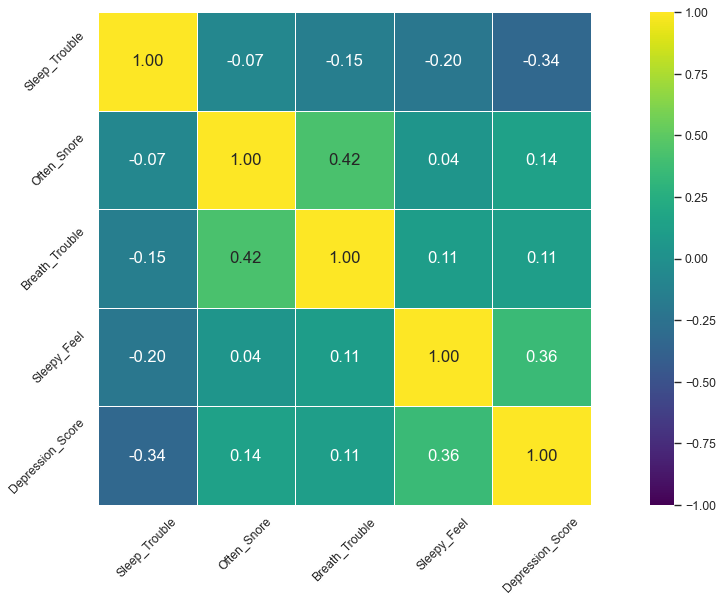

In [129]:
SLQ_corr = sleep_df.drop(['SEQN', 'Year', 'Depression_Label'], axis = 1).corr()

plt.figure(figsize = (19,8))
sns.heatmap(data = SLQ_corr, cmap = 'viridis', vmin = -1, 
            vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

<div class="alert alert-block alert-success">
<b> Sleep Patterns Over Depression Levels: </b> 
    
- SLQ030: How oftern do you snore? 
- SLQ040: How oftern do you snort or stop breathing? 
- SLQ050: Ever told doctor had trouble sleeping?
- SLQ120: How oftern overly sleepy during day? 

**Features' values**
- SLQ030, SLQ040, SLQ120: {0: 'Never', 1: 'Rarely - 1-2 nights a week', 2: 'Occasionally - 3-4 nights a week', 3: 'Frequently - 5 or more nights a week', 7: 'Refused', 9: "Don't know", '.': 'Missing'}
- SLQ050: {1: 'Yes', 2: 'No', 7: 'Refused', 9: "Don't know", '.': 'Missing'}

**Observations**
- Respondents who have sleep troubles or feel overly sleepy during day tend to feel depressed due to the slightly positive correlations between the features SLQ050, SLQ120 and depression.
    
</div>

In [130]:
dfc=pd.read_csv('cleaned_questionnaire.csv')

In [131]:
dfc.head()

SEQN       Year  Occupation_Status  Family_Poverty_LvIndex  \
0  73557.0  2013-2014                4.0                    0.86   
1  73558.0  2013-2014                1.0                    0.92   
2  73559.0  2013-2014                4.0                    4.37   
3  73561.0  2013-2014                4.0                    5.00   
4  73562.0  2013-2014                1.0                    5.00   

   Marijuana_Use  Sleep_Trouble  Often_Snore  Breath_Trouble  Sleepy_Feel  \
0            2.0            1.0          0.0             0.0          2.0   
1            1.0            2.0          0.0             0.0          2.0   
2            2.0            2.0          0.0             0.0          2.0   
3            1.0            2.0          0.0             0.0          2.0   
4            1.0            2.0          3.0             0.0          3.0   

    Depression_Label  Depression_Score  
0      Not Depressed               1.0  
1      Not Depressed               2.0  
2      Not Depressed               0.0  
3               Mild               9.0  
4  Moderately Severe              19.0

In [132]:
dfc.drop(['Family_Poverty_LvIndex','Often_Snore','Breath_Trouble','Sleepy_Feel'],axis=1,inplace=True)

In [133]:
df2=dfc

In [134]:
df2

SEQN       Year  Occupation_Status  Marijuana_Use  Sleep_Trouble  \
0       73557.0  2013-2014                4.0            2.0            1.0   
1       73558.0  2013-2014                1.0            1.0            2.0   
2       73559.0  2013-2014                4.0            2.0            2.0   
3       73561.0  2013-2014                4.0            1.0            2.0   
4       73562.0  2013-2014                1.0            1.0            2.0   
...         ...        ...                ...            ...            ...   
15651  102949.0  2017-2018                1.0            1.0            2.0   
15652  102952.0  2017-2018                4.0            2.0            2.0   
15653  102953.0  2017-2018                1.0            2.0            1.0   
15654  102954.0  2017-2018                3.0            2.0            2.0   
15655  102956.0  2017-2018                4.0            1.0            1.0   

        Depression_Label  Depression_Score  
0          Not Depressed               1.0  
1          Not Depressed               2.0  
2          Not Depressed               0.0  
3                   Mild               9.0  
4      Moderately Severe              19.0  
...                  ...               ...  
15651      Not Depressed               0.0  
15652      Not Depressed               0.0  
15653      Not Depressed               3.0  
15654      Not Depressed               0.0  
15655               Mild               7.0  

[15656 rows x 7 columns]

## Dietary Dataset

In [135]:
dfd=pd.read_csv('diet_csv')

In [136]:
dfd

Unnamed: 0      SEQN         WTDRD1         WTDR2D  DR1DRSTZ  DR1EXMER  \
0               0   73557.0   16888.327864   12930.890649       1.0      49.0   
1               1   73558.0   17932.143865   12684.148869       1.0      59.0   
2               2   73559.0   59641.812930   39394.236709       1.0      49.0   
3               3   73560.0  142203.069917  125966.366442       1.0      54.0   
4               4   73561.0   59052.357033   39004.892993       1.0      63.0   
...           ...       ...            ...            ...       ...       ...   
29033       29033  102952.0   13812.955180   28685.931567       1.0      73.0   
29034       29034  102953.0   50632.360804       0.000000       1.0      73.0   
29035       29035  102954.0   11081.266527    8924.895053       1.0      76.0   
29036       29036  102955.0   27529.854014   36299.552504       1.0      73.0   
29037       29037  102956.0   69447.414236   92756.884416       1.0      81.0   

       DRABF  DRDINT  DR1DBIH  DR1DAY  ...  DRD370R  DRD370RQ  DRD370S  \
0        2.0     2.0      6.0     2.0  ...      NaN       NaN      NaN   
1        2.0     2.0      4.0     1.0  ...      2.0       NaN      2.0   
2        2.0     2.0     18.0     6.0  ...      NaN       NaN      NaN   
3        2.0     2.0     21.0     3.0  ...      NaN       NaN      NaN   
4        2.0     2.0     18.0     1.0  ...      2.0       NaN      2.0   
...      ...     ...      ...     ...  ...      ...       ...      ...   
29033    2.0     2.0     22.0     7.0  ...      2.0       NaN      2.0   
29034    2.0     1.0      2.0     7.0  ...      2.0       NaN      2.0   
29035    2.0     2.0      2.0     6.0  ...      NaN       NaN      NaN   
29036    2.0     2.0     15.0     2.0  ...      NaN       NaN      NaN   
29037    2.0     2.0     10.0     5.0  ...      2.0       NaN      1.0   

       DRD370SQ  DRD370T  DRD370TQ  DRD370U  DRD370UQ  DRD370V       Year  
0           NaN      NaN       NaN      NaN       NaN      NaN  2013-2014  
1           NaN      2.0       NaN      2.0       NaN      2.0  2013-2014  
2           NaN      NaN       NaN      NaN       NaN      NaN  2013-2014  
3           NaN      NaN       NaN      NaN       NaN      NaN  2013-2014  
4           NaN      2.0       NaN      2.0       NaN      2.0  2013-2014  
...         ...      ...       ...      ...       ...      ...        ...  
29033       NaN      2.0       NaN      2.0       NaN      2.0  2017-2018  
29034       NaN      2.0       NaN      2.0       NaN      2.0  2017-2018  
29035       NaN      NaN       NaN      NaN       NaN      NaN  2017-2018  
29036       NaN      NaN       NaN      NaN       NaN      NaN  2017-2018  
29037       1.0      2.0       NaN      2.0       NaN      2.0  2017-2018  

[29038 rows x 164 columns]

In [137]:
dfd=dfd.filter(items=['DR1TKCAL','DR1TPROT','DR1TCARB','DR1TSUGR','DR1TFIBE','DR1TTFAT','Year','SEQN'])

In [138]:
dfd

DR1TKCAL  DR1TPROT  DR1TCARB  DR1TSUGR  DR1TFIBE  DR1TTFAT       Year  \
0        1574.0     43.63    239.59    176.47      10.8     52.81  2013-2014   
1        5062.0    338.13    423.78     44.99      16.7    124.29  2013-2014   
2        1743.0     64.61    224.39    102.90       9.9     65.97  2013-2014   
3        1490.0     77.75    162.92     80.58      10.6     58.27  2013-2014   
4        1421.0     55.24    178.20     87.78      12.3     55.36  2013-2014   
...         ...       ...       ...       ...       ...       ...        ...   
29033    1080.0     52.59    139.92     31.31      28.7     38.68  2017-2018   
29034    3072.0    188.17    333.41     77.34      57.0    114.96  2017-2018   
29035    1757.0     72.70    218.10     69.20       9.5     66.58  2017-2018   
29036    1256.0     29.62    192.73    119.48      10.2     44.11  2017-2018   
29037    1591.0     93.91    215.31    130.68       9.9     40.59  2017-2018   

           SEQN  
0       73557.0  
1       73558.0  
2       73559.0  
3       73560.0  
4       73561.0  
...         ...  
29033  102952.0  
29034  102953.0  
29035  102954.0  
29036  102955.0  
29037  102956.0  

[29038 rows x 8 columns]

In [139]:
dfd.rename(columns={
    'DR1TKCAL': 'Calories',
    'DR1TPROT': 'Protein',
    'DR1TCARB': 'Carbohydrates',
    'DR1TSUGR': 'Sugars',
    'DR1TFIBE': 'Fiber',
    'DR1TTFAT':  'Fat'
}, inplace=True)


In [140]:
dfd

Calories  Protein  Carbohydrates  Sugars  Fiber     Fat       Year  \
0        1574.0    43.63         239.59  176.47   10.8   52.81  2013-2014   
1        5062.0   338.13         423.78   44.99   16.7  124.29  2013-2014   
2        1743.0    64.61         224.39  102.90    9.9   65.97  2013-2014   
3        1490.0    77.75         162.92   80.58   10.6   58.27  2013-2014   
4        1421.0    55.24         178.20   87.78   12.3   55.36  2013-2014   
...         ...      ...            ...     ...    ...     ...        ...   
29033    1080.0    52.59         139.92   31.31   28.7   38.68  2017-2018   
29034    3072.0   188.17         333.41   77.34   57.0  114.96  2017-2018   
29035    1757.0    72.70         218.10   69.20    9.5   66.58  2017-2018   
29036    1256.0    29.62         192.73  119.48   10.2   44.11  2017-2018   
29037    1591.0    93.91         215.31  130.68    9.9   40.59  2017-2018   

           SEQN  
0       73557.0  
1       73558.0  
2       73559.0  
3       73560.0  
4       73561.0  
...         ...  
29033  102952.0  
29034  102953.0  
29035  102954.0  
29036  102955.0  
29037  102956.0  

[29038 rows x 8 columns]

In [141]:
dfd.isnull().sum()

Calories         4696
Protein          4696
Carbohydrates    4696
Sugars           4696
Fiber            4696
Fat              4696
Year                0
SEQN                0
dtype: int64

In [142]:
# Filling missing values in numerical columns with the mean of each column
dfd['Calories'].fillna(dfd['Calories'].mean(), inplace=True)
dfd['Protein'].fillna(dfd['Protein'].mean(), inplace=True)
dfd['Carbohydrates'].fillna(dfd['Carbohydrates'].mean(), inplace=True)
dfd['Sugars'].fillna(dfd['Sugars'].mean(), inplace=True)
dfd['Fiber'].fillna(dfd['Fiber'].mean(), inplace=True)
dfd['Fat'].fillna(dfd['Fat'].mean(), inplace=True)

In [143]:
dfd.isnull().sum()

Calories         0
Protein          0
Carbohydrates    0
Sugars           0
Fiber            0
Fat              0
Year             0
SEQN             0
dtype: int64

In [144]:
# Define the criteria for a balanced diet
calorie_min = 1700
calorie_max = 2500
protein_min = 35
protein_max = 100
carbs_min = 200
carbs_max = 500
sugar_max = 37.5
fiber_min = 25
fiber_max = 38
fat_min = 44.4
fat_max = 97.2


In [145]:
#Create a new column 'Balanced_Diet' based on the criteria
dfd['Balanced_Diet'] = (
    (dfd['Calories'] >= calorie_min) & (dfd['Calories'] <= calorie_max) &
    (dfd['Protein'] >= protein_min) & (dfd['Protein'] <= protein_max) &
    (dfd['Carbohydrates'] >= carbs_min) & (dfd['Carbohydrates'] <= carbs_max) &
    (dfd['Sugars'] <= sugar_max) &
    (dfd['Fiber'] >= fiber_min) & (dfd['Fiber'] <= fiber_max) &
    (dfd['Fat'] >= fat_min) & (dfd['Fat'] <= fat_max)
).astype(int)

In [146]:
dfd

Calories  Protein  Carbohydrates  Sugars  Fiber     Fat       Year  \
0        1574.0    43.63         239.59  176.47   10.8   52.81  2013-2014   
1        5062.0   338.13         423.78   44.99   16.7  124.29  2013-2014   
2        1743.0    64.61         224.39  102.90    9.9   65.97  2013-2014   
3        1490.0    77.75         162.92   80.58   10.6   58.27  2013-2014   
4        1421.0    55.24         178.20   87.78   12.3   55.36  2013-2014   
...         ...      ...            ...     ...    ...     ...        ...   
29033    1080.0    52.59         139.92   31.31   28.7   38.68  2017-2018   
29034    3072.0   188.17         333.41   77.34   57.0  114.96  2017-2018   
29035    1757.0    72.70         218.10   69.20    9.5   66.58  2017-2018   
29036    1256.0    29.62         192.73  119.48   10.2   44.11  2017-2018   
29037    1591.0    93.91         215.31  130.68    9.9   40.59  2017-2018   

           SEQN  Balanced_Diet  
0       73557.0              0  
1       73558.0              0  
2       73559.0              0  
3       73560.0              0  
4       73561.0              0  
...         ...            ...  
29033  102952.0              0  
29034  102953.0              0  
29035  102954.0              0  
29036  102955.0              0  
29037  102956.0              0  

[29038 rows x 9 columns]

In [147]:
# Define tolerance levels as percentages of the criteria ranges
tolerance = 0.30  # 10%

# Calculate tolerance ranges
calorie_tol_min = calorie_min * (1 - tolerance)
calorie_tol_max = calorie_max * (1 + tolerance)
protein_tol_min = protein_min * (1 - tolerance)
protein_tol_max = protein_max * (1 + tolerance)
carbs_tol_min = carbs_min * (1 - tolerance)
carbs_tol_max = carbs_max * (1 + tolerance)
sugar_tol_max = sugar_max * (1 + tolerance)
fiber_tol_min = fiber_min * (1 - tolerance)
fiber_tol_max = fiber_max * (1 + tolerance)
fat_tol_min = fat_min * (1 - tolerance)
fat_tol_max = fat_max * (1 + tolerance)

# Create a new column 'Close_to_Balanced_Diet' based on the tolerance criteria
dfd['Close_to_Balanced_Diet'] = (
    (dfd['Calories'] >= calorie_tol_min) & (dfd['Calories'] <= calorie_tol_max) &
    (dfd['Protein'] >= protein_tol_min) & (dfd['Protein'] <= protein_tol_max) &
    (dfd['Carbohydrates'] >= carbs_tol_min) & (dfd['Carbohydrates'] <= carbs_tol_max) &
    (dfd['Sugars'] <= sugar_tol_max) &
    (dfd['Fiber'] >= fiber_tol_min) & (dfd['Fiber'] <= fiber_tol_max) &
    (dfd['Fat'] >= fat_tol_min) & (dfd['Fat'] <= fat_tol_max)
).astype(int)


In [148]:
dfd

Calories  Protein  Carbohydrates  Sugars  Fiber     Fat       Year  \
0        1574.0    43.63         239.59  176.47   10.8   52.81  2013-2014   
1        5062.0   338.13         423.78   44.99   16.7  124.29  2013-2014   
2        1743.0    64.61         224.39  102.90    9.9   65.97  2013-2014   
3        1490.0    77.75         162.92   80.58   10.6   58.27  2013-2014   
4        1421.0    55.24         178.20   87.78   12.3   55.36  2013-2014   
...         ...      ...            ...     ...    ...     ...        ...   
29033    1080.0    52.59         139.92   31.31   28.7   38.68  2017-2018   
29034    3072.0   188.17         333.41   77.34   57.0  114.96  2017-2018   
29035    1757.0    72.70         218.10   69.20    9.5   66.58  2017-2018   
29036    1256.0    29.62         192.73  119.48   10.2   44.11  2017-2018   
29037    1591.0    93.91         215.31  130.68    9.9   40.59  2017-2018   

           SEQN  Balanced_Diet  Close_to_Balanced_Diet  
0       73557.0              0                       0  
1       73558.0              0                       0  
2       73559.0              0                       0  
3       73560.0              0                       0  
4       73561.0              0                       0  
...         ...            ...                     ...  
29033  102952.0              0                       0  
29034  102953.0              0                       0  
29035  102954.0              0                       0  
29036  102955.0              0                       0  
29037  102956.0              0                       0  

[29038 rows x 10 columns]

In [149]:
dfd['Protein_to_Carb_Ratio'] = dfd['Protein'] / dfd['Carbohydrates']

In [150]:
dfd['Fat_to_Calorie_Ratio'] = (dfd['Fat'] * 9) / dfd['Calories']  # Fat has 9 calories per gram


In [151]:
dfd['Excess_Calories'] = dfd['Calories'] - (calorie_min + calorie_max) / 2


In [152]:
dfd['Protein_Deficit_Excess'] = dfd['Protein'] - (protein_min + protein_max) / 2
dfd['Carbs_Deficit_Excess'] = dfd['Carbohydrates'] - (carbs_min + carbs_max) / 2


In [153]:
dfd['High_Sugar'] = (dfd['Sugars'] > sugar_max).astype(int)


In [154]:
dfd['Low_Fiber'] = (dfd['Fiber'] < fiber_min).astype(int)


In [155]:
dfd['Diet_Quality_Score'] = (
    (dfd['Calories'].between(calorie_min, calorie_max).astype(int) +
     dfd['Protein'].between(protein_min, protein_max).astype(int) +
     dfd['Carbohydrates'].between(carbs_min, carbs_max).astype(int) +
     (dfd['Sugars'] <= sugar_max).astype(int) +
     dfd['Fiber'].between(fiber_min, fiber_max).astype(int) +
     dfd['Fat'].between(fat_min, fat_max).astype(int))
)

# Ensure the score has only 5 classes (0 to 4)
dfd['Diet_Quality_Score'] = dfd['Diet_Quality_Score'].clip(upper=4)


In [156]:
def categorize_diet(row):
    if row['Calories'] < calorie_min * 0.9:
        return 'Low Calorie'
    elif row['Calories'] > calorie_max * 1.1:
        return 'High Calorie'
    else:
        return 'Balanced'

dfd['Diet_Category'] = dfd.apply(categorize_diet, axis=1)


In [157]:
dfd.drop(['Calories','Protein','Carbohydrates','Sugars','Fat','Fiber','Balanced_Diet','Close_to_Balanced_Diet'],axis=1,inplace=True)

In [158]:
dfd

Year      SEQN  Protein_to_Carb_Ratio  Fat_to_Calorie_Ratio  \
0      2013-2014   73557.0               0.182103              0.301963   
1      2013-2014   73558.0               0.797890              0.220982   
2      2013-2014   73559.0               0.287936              0.340637   
3      2013-2014   73560.0               0.477228              0.351966   
4      2013-2014   73561.0               0.309989              0.350626   
...          ...       ...                    ...                   ...   
29033  2017-2018  102952.0               0.375858              0.322333   
29034  2017-2018  102953.0               0.564380              0.336797   
29035  2017-2018  102954.0               0.333333              0.341047   
29036  2017-2018  102955.0               0.153687              0.316075   
29037  2017-2018  102956.0               0.436162              0.229610   

       Excess_Calories  Protein_Deficit_Excess  Carbs_Deficit_Excess  \
0               -526.0                  -23.87               -110.41   
1               2962.0                  270.63                 73.78   
2               -357.0                   -2.89               -125.61   
3               -610.0                   10.25               -187.08   
4               -679.0                  -12.26               -171.80   
...                ...                     ...                   ...   
29033          -1020.0                  -14.91               -210.08   
29034            972.0                  120.67                -16.59   
29035           -343.0                    5.20               -131.90   
29036           -844.0                  -37.88               -157.27   
29037           -509.0                   26.41               -134.69   

       High_Sugar  Low_Fiber  Diet_Quality_Score Diet_Category  
0               1          1                   3      Balanced  
1               1          1                   1  High Calorie  
2               1          1                   4      Balanced  
3               1          1                   2   Low Calorie  
4               1          1                   2   Low Calorie  
...           ...        ...                 ...           ...  
29033           0          0                   3   Low Calorie  
29034           1          0                   1  High Calorie  
29035           1          1                   4      Balanced  
29036           1          1                   0   Low Calorie  
29037           1          1                   2      Balanced  

[29038 rows x 11 columns]

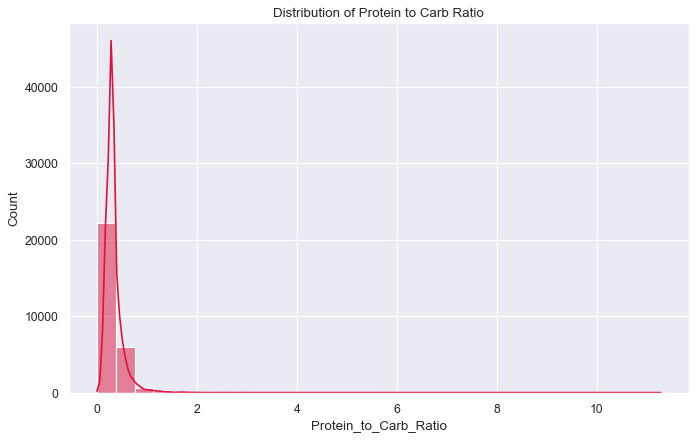

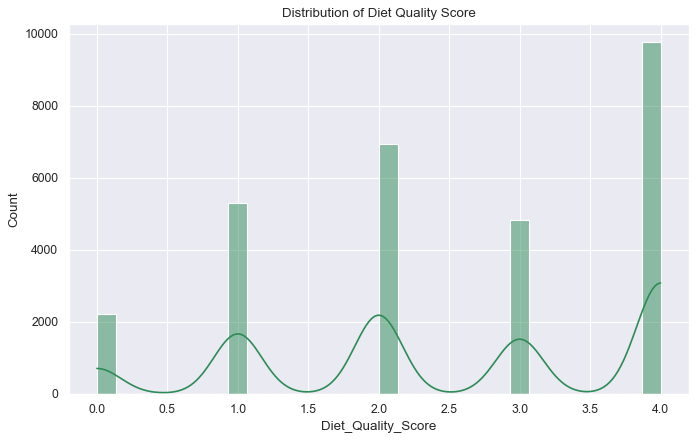

In [159]:
# Histogram for 'Protein_to_Carb_Ratio'
plt.figure(figsize=(10, 6))
sns.histplot(dfd['Protein_to_Carb_Ratio'], bins=30, kde=True, color='crimson')
plt.title('Distribution of Protein to Carb Ratio')
plt.show()

# Histogram for 'Diet_Quality_Score'
plt.figure(figsize=(10, 6))
sns.histplot(dfd['Diet_Quality_Score'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Diet Quality Score')
plt.show()


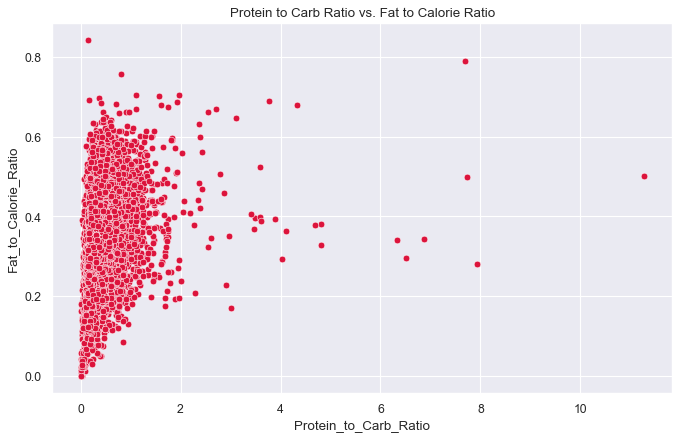

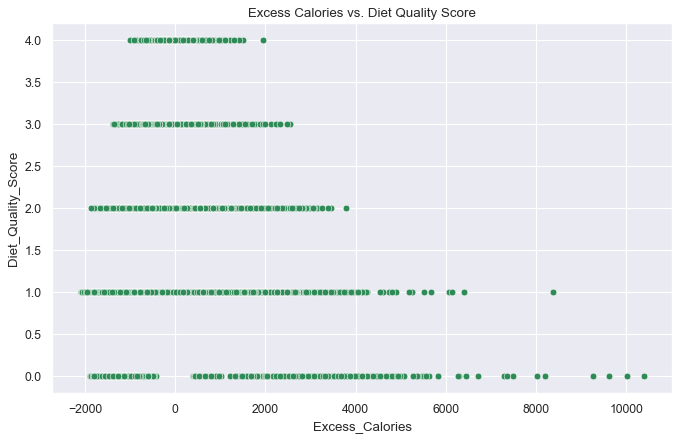

In [160]:
# Scatter plot of 'Protein_to_Carb_Ratio' vs 'Fat_to_Calorie_Ratio'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Protein_to_Carb_Ratio', y='Fat_to_Calorie_Ratio', data=dfd, color='crimson')
plt.title('Protein to Carb Ratio vs. Fat to Calorie Ratio')
plt.show()

# Scatter plot of 'Excess_Calories' vs 'Diet_Quality_Score'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Excess_Calories', y='Diet_Quality_Score', data=dfd, color='seagreen')
plt.title('Excess Calories vs. Diet Quality Score')
plt.show()


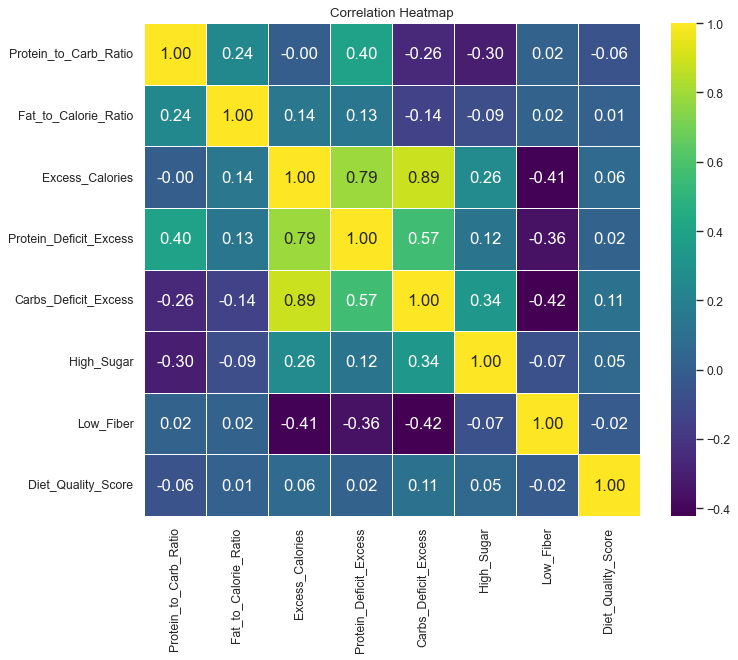

In [162]:
correlation_matrix = dfd.drop(['SEQN', 'Year','Diet_Category'], axis = 1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [163]:
dfd['Diet_Quality_Score'].value_counts()

Diet_Quality_Score
4    9782
2    6935
1    5283
3    4815
0    2223
Name: count, dtype: int64

In [164]:
dfd

Year      SEQN  Protein_to_Carb_Ratio  Fat_to_Calorie_Ratio  \
0      2013-2014   73557.0               0.182103              0.301963   
1      2013-2014   73558.0               0.797890              0.220982   
2      2013-2014   73559.0               0.287936              0.340637   
3      2013-2014   73560.0               0.477228              0.351966   
4      2013-2014   73561.0               0.309989              0.350626   
...          ...       ...                    ...                   ...   
29033  2017-2018  102952.0               0.375858              0.322333   
29034  2017-2018  102953.0               0.564380              0.336797   
29035  2017-2018  102954.0               0.333333              0.341047   
29036  2017-2018  102955.0               0.153687              0.316075   
29037  2017-2018  102956.0               0.436162              0.229610   

       Excess_Calories  Protein_Deficit_Excess  Carbs_Deficit_Excess  \
0               -526.0                  -23.87               -110.41   
1               2962.0                  270.63                 73.78   
2               -357.0                   -2.89               -125.61   
3               -610.0                   10.25               -187.08   
4               -679.0                  -12.26               -171.80   
...                ...                     ...                   ...   
29033          -1020.0                  -14.91               -210.08   
29034            972.0                  120.67                -16.59   
29035           -343.0                    5.20               -131.90   
29036           -844.0                  -37.88               -157.27   
29037           -509.0                   26.41               -134.69   

       High_Sugar  Low_Fiber  Diet_Quality_Score Diet_Category  
0               1          1                   3      Balanced  
1               1          1                   1  High Calorie  
2               1          1                   4      Balanced  
3               1          1                   2   Low Calorie  
4               1          1                   2   Low Calorie  
...           ...        ...                 ...           ...  
29033           0          0                   3   Low Calorie  
29034           1          0                   1  High Calorie  
29035           1          1                   4      Balanced  
29036           1          1                   0   Low Calorie  
29037           1          1                   2      Balanced  

[29038 rows x 11 columns]

In [165]:
df3 = dfd[['Diet_Quality_Score','SEQN','Year']]


In [166]:
df3

Diet_Quality_Score      SEQN       Year
0                       3   73557.0  2013-2014
1                       1   73558.0  2013-2014
2                       4   73559.0  2013-2014
3                       2   73560.0  2013-2014
4                       2   73561.0  2013-2014
...                   ...       ...        ...
29033                   3  102952.0  2017-2018
29034                   1  102953.0  2017-2018
29035                   4  102954.0  2017-2018
29036                   0  102955.0  2017-2018
29037                   2  102956.0  2017-2018

[29038 rows x 3 columns]

## Examination Dataset

In [167]:
dfe=pd.read_csv('Exam.csv')

In [168]:
dfe

Unnamed: 0      SEQN  PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  \
0               0   73557.0       NaN     NaN     1.0     4.0    86.0   
1               1   73558.0       NaN     NaN     1.0     4.0    74.0   
2               2   73559.0       NaN     NaN     1.0     4.0    68.0   
3               3   73560.0       NaN     NaN     1.0     2.0    64.0   
4               4   73561.0       NaN     NaN     1.0     3.0    92.0   
...           ...       ...       ...     ...     ...     ...     ...   
28056       28056  102952.0       NaN     NaN     1.0     3.0    68.0   
28057       28057  102953.0       NaN     NaN     1.0     5.0    78.0   
28058       28058  102954.0       NaN     NaN     1.0     3.0    78.0   
28059       28059  102955.0       NaN     NaN     1.0     5.0    74.0   
28060       28060  102956.0       NaN     NaN     1.0     5.0    76.0   

       BPXPULS  BPXPTY  BPXML1  ...  OHX15SE  OHX18SE  OHX19SE  OHX20SE  \
0          1.0     1.0   140.0  ...      NaN      NaN      NaN      NaN   
1          1.0     1.0   170.0  ...      NaN      NaN      NaN      NaN   
2          1.0     1.0   160.0  ...      NaN      NaN      NaN      NaN   
3          1.0     1.0   130.0  ...      9.0      9.0      1.0      4.0   
4          1.0     1.0   170.0  ...      NaN      NaN      NaN      NaN   
...        ...     ...     ...  ...      ...      ...      ...      ...   
28056      1.0     1.0   150.0  ...      b''      b''      b''      b''   
28057      1.0     1.0   150.0  ...      b''      b''      b''      b''   
28058      1.0     1.0   150.0  ...      b''      b''      b''      b''   
28059      1.0     1.0   140.0  ...     b'0'     b'0'     b'0'     b'0'   
28060      1.0     1.0   160.0  ...      b''      b''      b''      b''   

       OHX21SE  OHX28SE  OHX29SE  OHX30SE  OHX31SE       Year  
0          NaN      NaN      NaN      NaN      NaN  2013-2014  
1          NaN      NaN      NaN      NaN      NaN  2013-2014  
2          NaN      NaN      NaN      NaN      NaN  2013-2014  
3          0.0      4.0      4.0      1.0      9.0  2013-2014  
4          NaN      NaN      NaN      NaN      NaN  2013-2014  
...        ...      ...      ...      ...      ...        ...  
28056      b''      b''      b''      b''      b''  2017-2018  
28057      b''      b''      b''      b''      b''  2017-2018  
28058      b''      b''      b''      b''      b''  2017-2018  
28059     b'0'     b'0'     b'0'     b'0'     b'0'  2017-2018  
28060      b''      b''      b''      b''      b''  2017-2018  

[28061 rows x 150 columns]

In [169]:
dfe.shape

(28061, 150)

In [170]:
column_value = {
    'BMXBMI':'BodyMassIndex',
    'BMXWAIST':'WaistCircumferenceCM',
    'BMXWT':'WeightKG',
    'BPXDI1':'Diastolic1',
    'BPXDI2':'Diastolic2',
    'BPXDI3':'Diastolic3',
    'BPXSY1':'Systolic1',
    'BPXSY2':'Systolic2',
    'BPXSY3':'Systolic3',
    'DXXTATA':'AbdominalFatArea',
    'DXXTATM':'AbdominalFatMass',
    'DXXTATV':'AbdominalFatVolume',
    'BMXHT'   :'Height'
} 

In [171]:
get_cols = ['SEQN','BMXBMI','BMXWAIST','BMXWT','BPXDI1','BPXDI2','BPXDI3','BPXSY1','BPXSY2','BPXSY3','BMXHT','Year']
dfe = dfe[get_cols] 

In [172]:
dfe = dfe.rename(columns=column_value).copy()
dfe.head(10)

SEQN  BodyMassIndex  WaistCircumferenceCM  WeightKG  Diastolic1  \
0  73557.0           26.7                 100.0      78.3        72.0   
1  73558.0           28.6                 107.6      89.5        62.0   
2  73559.0           28.9                 109.2      88.9        90.0   
3  73560.0           17.1                  61.0      32.2        38.0   
4  73561.0           19.7                   NaN      52.0        86.0   
5  73562.0           41.7                 123.1     105.0        84.0   
6  73563.0            NaN                   NaN       7.4         NaN   
7  73564.0           35.7                 110.8      93.4        80.0   
8  73566.0           26.5                  85.5      61.8        74.0   
9  73567.0           22.0                  93.7      65.3        78.0   

   Diastolic2  Diastolic3  Systolic1  Systolic2  Systolic3  Height       Year  
0        76.0        74.0      122.0      114.0      102.0   171.3  2013-2014  
1        80.0        42.0      156.0      160.0      156.0   176.8  2013-2014  
2        76.0        80.0      140.0      140.0      146.0   175.3  2013-2014  
3        34.0        38.0      108.0      102.0      104.0   137.3  2013-2014  
4        88.0        86.0      136.0      134.0      142.0   162.4  2013-2014  
5        82.0        80.0      160.0      158.0      154.0   158.7  2013-2014  
6         NaN         NaN        NaN        NaN        NaN     NaN  2013-2014  
7        80.0        82.0      118.0      124.0      126.0   161.8  2013-2014  
8        72.0        72.0      128.0      124.0      114.0   152.8  2013-2014  
9        78.0        76.0      140.0      142.0      142.0   172.4  2013-2014

<div style="background-color:#273469;color:white;padding:10px">
<h5>We dropped columns that percentage of missing values is greater than 70%.</h5>
<h5>We also dropped columns that seems have no direct link to depression like the number of tooth count, and came up with these columns:</h5>

<ol>
    <li>BMXBI : Body Mass Index</li>
    <li>BMXWAIST : Waist Circumference in CM</li>
    <li>BMXWT : Weight in KG</li>
    <li>BPXDI1 : Diastolic Blood Pressure 1st Reading</li>
    <li>BPXDI2 : Diastolic Blood Pressure 2nd Reading</li>
    <li>BPXDI3 : Diastolic Blood Pressure 3rd Reading</li>
    <li>BPXSY1 : Systolic Blood Pressure 1st Reading</li>
    <li>BPXSY2 : Systolic Blood Pressure 2nd Reading</li>
    <li>BPXSY3 : Systolic Blood Pressure 3rd Reading</li>
    <li>DXXTATA : Abdominal Fat Area</li>
    <li>DXXTATM : Abdominal Fat Mass</li>
    <li>DXXTATV : Abdominal Fat Volume</li>
</ol>     
</div>

In [173]:
dfe.isnull().sum()

SEQN                       0
BodyMassIndex           2245
WaistCircumferenceCM    3486
WeightKG                 313
Diastolic1              7442
Diastolic2              6776
Diastolic3              6839
Systolic1               7442
Systolic2               6776
Systolic3               6839
Height                  2209
Year                       0
dtype: int64

In [174]:
dfe['BodyMassIndex'].fillna(dfe['BodyMassIndex'].mean(), inplace=True)
dfe['WaistCircumferenceCM'].fillna(dfe['WaistCircumferenceCM'].mean(), inplace=True)
dfe['WeightKG'].fillna(dfe['WeightKG'].mean(), inplace=True)
dfe[['Diastolic1', 'Diastolic2', 'Diastolic3']] = dfe[['Diastolic1', 'Diastolic2', 'Diastolic3']].fillna(dfe[['Diastolic1', 'Diastolic2', 'Diastolic3']].mean())
dfe[['Systolic1', 'Systolic2', 'Systolic3']] = dfe[['Systolic1', 'Systolic2', 'Systolic3']].fillna(dfe[['Systolic1', 'Systolic2', 'Systolic3']].mean())
dfe['Height'].fillna(dfe['Height'].mean(), inplace=True)

####Feature engineering

In [175]:
dfe['Mean_Diastolic'] = dfe[['Diastolic1', 'Diastolic2', 'Diastolic3']].mean(axis=1)


In [176]:
dfe['Mean_Systolic'] = dfe[['Systolic1', 'Systolic2', 'Systolic3']].mean(axis=1)


In [177]:
dfe['Waist_to_Height_Ratio'] = dfe['WaistCircumferenceCM'] / dfe['Height']  


In [178]:
dfe

SEQN  BodyMassIndex  WaistCircumferenceCM  WeightKG  Diastolic1  \
0       73557.0           26.7            100.000000      78.3        72.0   
1       73558.0           28.6            107.600000      89.5        62.0   
2       73559.0           28.9            109.200000      88.9        90.0   
3       73560.0           17.1             61.000000      32.2        38.0   
4       73561.0           19.7             88.345563      52.0        86.0   
...         ...            ...                   ...       ...         ...   
28056  102952.0           20.0             82.200000      49.0        74.0   
28057  102953.0           35.8            114.800000      97.4        76.0   
28058  102954.0           26.1             86.400000      69.1        66.0   
28059  102955.0           45.6            113.500000     111.9        62.0   
28060  102956.0           36.1            122.000000     111.5        98.0   

       Diastolic2  Diastolic3  Systolic1  Systolic2  Systolic3  Height  \
0            76.0        74.0      122.0      114.0      102.0   171.3   
1            80.0        42.0      156.0      160.0      156.0   176.8   
2            76.0        80.0      140.0      140.0      146.0   175.3   
3            34.0        38.0      108.0      102.0      104.0   137.3   
4            88.0        86.0      136.0      134.0      142.0   162.4   
...           ...         ...        ...        ...        ...     ...   
28056        78.0        68.0      136.0      142.0      140.0   156.5   
28057        76.0        74.0      124.0      122.0      116.0   164.9   
28058        72.0        74.0      116.0      118.0      114.0   162.6   
28059        60.0        64.0      114.0      114.0      114.0   156.6   
28060        92.0        98.0      150.0      146.0      148.0   175.8   

            Year  Mean_Diastolic  Mean_Systolic  Waist_to_Height_Ratio  
0      2013-2014       74.000000     112.666667               0.583771  
1      2013-2014       61.333333     157.333333               0.608597  
2      2013-2014       82.000000     142.000000               0.622932  
3      2013-2014       36.666667     104.666667               0.444283  
4      2013-2014       86.666667     137.333333               0.544000  
...          ...             ...            ...                    ...  
28056  2017-2018       73.333333     139.333333               0.525240  
28057  2017-2018       75.333333     120.666667               0.696180  
28058  2017-2018       70.666667     116.000000               0.531365  
28059  2017-2018       62.000000     114.000000               0.724777  
28060  2017-2018       96.000000     148.000000               0.693970  

[28061 rows x 15 columns]

In [179]:
dfe['BP_Difference'] = dfe['Mean_Systolic'] - dfe['Mean_Diastolic']


In [180]:
dfe['Mean_Blood_Pressure'] = (dfe['Mean_Systolic'] + dfe['Mean_Diastolic']) / 2


In [181]:
dfe['BP_Category'] = pd.cut(dfe['Mean_Systolic'], bins=[0, 120, 130, 140, 160, float('inf')],
                            labels=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Hypertensive Crisis'])


In [182]:
dfe

SEQN  BodyMassIndex  WaistCircumferenceCM  WeightKG  Diastolic1  \
0       73557.0           26.7            100.000000      78.3        72.0   
1       73558.0           28.6            107.600000      89.5        62.0   
2       73559.0           28.9            109.200000      88.9        90.0   
3       73560.0           17.1             61.000000      32.2        38.0   
4       73561.0           19.7             88.345563      52.0        86.0   
...         ...            ...                   ...       ...         ...   
28056  102952.0           20.0             82.200000      49.0        74.0   
28057  102953.0           35.8            114.800000      97.4        76.0   
28058  102954.0           26.1             86.400000      69.1        66.0   
28059  102955.0           45.6            113.500000     111.9        62.0   
28060  102956.0           36.1            122.000000     111.5        98.0   

       Diastolic2  Diastolic3  Systolic1  Systolic2  Systolic3  Height  \
0            76.0        74.0      122.0      114.0      102.0   171.3   
1            80.0        42.0      156.0      160.0      156.0   176.8   
2            76.0        80.0      140.0      140.0      146.0   175.3   
3            34.0        38.0      108.0      102.0      104.0   137.3   
4            88.0        86.0      136.0      134.0      142.0   162.4   
...           ...         ...        ...        ...        ...     ...   
28056        78.0        68.0      136.0      142.0      140.0   156.5   
28057        76.0        74.0      124.0      122.0      116.0   164.9   
28058        72.0        74.0      116.0      118.0      114.0   162.6   
28059        60.0        64.0      114.0      114.0      114.0   156.6   
28060        92.0        98.0      150.0      146.0      148.0   175.8   

            Year  Mean_Diastolic  Mean_Systolic  Waist_to_Height_Ratio  \
0      2013-2014       74.000000     112.666667               0.583771   
1      2013-2014       61.333333     157.333333               0.608597   
2      2013-2014       82.000000     142.000000               0.622932   
3      2013-2014       36.666667     104.666667               0.444283   
4      2013-2014       86.666667     137.333333               0.544000   
...          ...             ...            ...                    ...   
28056  2017-2018       73.333333     139.333333               0.525240   
28057  2017-2018       75.333333     120.666667               0.696180   
28058  2017-2018       70.666667     116.000000               0.531365   
28059  2017-2018       62.000000     114.000000               0.724777   
28060  2017-2018       96.000000     148.000000               0.693970   

       BP_Difference  Mean_Blood_Pressure           BP_Category  
0          38.666667            93.333333                Normal  
1          96.000000           109.333333  Hypertension Stage 2  
2          60.000000           112.000000  Hypertension Stage 2  
3          68.000000            70.666667                Normal  
4          50.666667           112.000000  Hypertension Stage 1  
...              ...                  ...                   ...  
28056      66.000000           106.333333  Hypertension Stage 1  
28057      45.333333            98.000000              Elevated  
28058      45.333333            93.333333                Normal  
28059      52.000000            88.000000                Normal  
28060      52.000000           122.000000  Hypertension Stage 2  

[28061 rows x 18 columns]

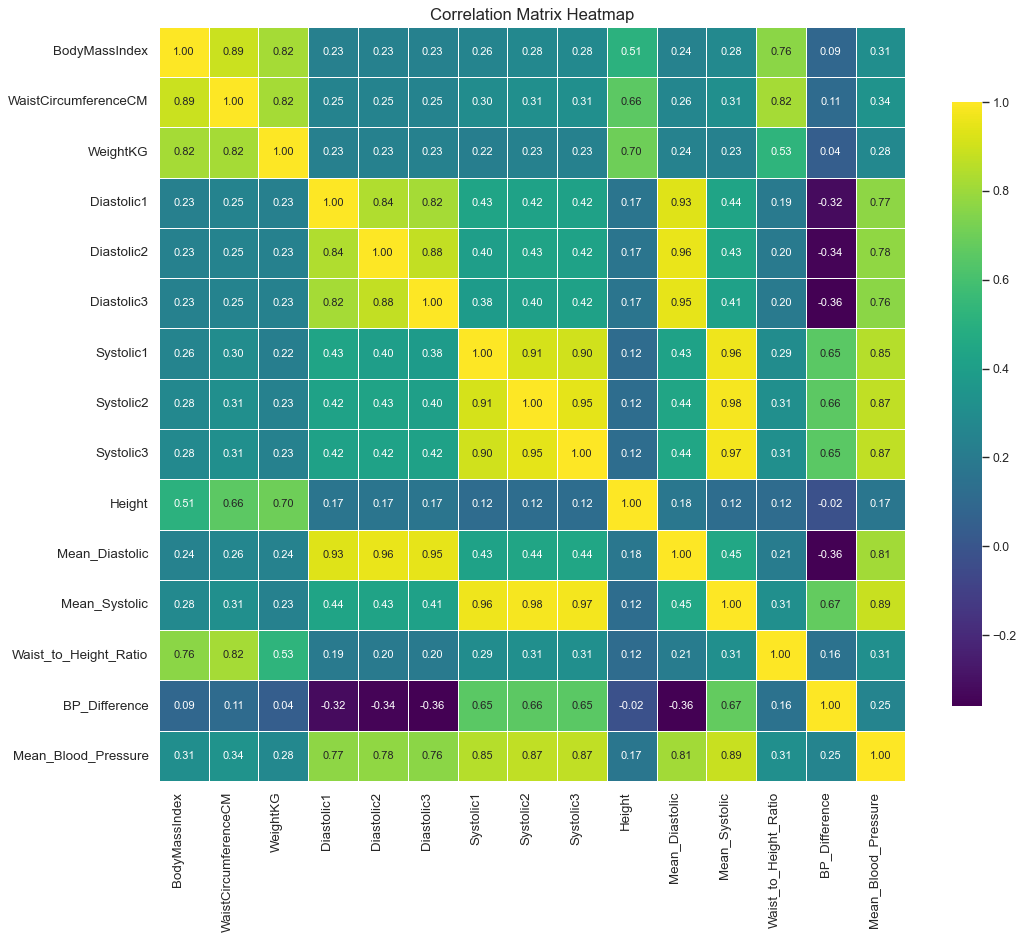

In [183]:
corr_matrix = dfe.drop(['SEQN', 'Year','BP_Category'],axis=1).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='viridis', 
    linewidths=0.5, 
    linecolor='white', 
    cbar_kws={"shrink": .8}, 
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix Heatmap', size=15)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

<div style="background-color:#273469;color:white;padding:10px">
    <h5>Here are some points based on the correlation matrix</h5>
    <ul>
        <li>BodyMassIndex is positively correlated with WaistCircumferenceCM, WeightKG, and AbdominalFat measurements.</li>
        <li>StandingHeightCM is moderately correlated with WeightKG.</li>
        <li>Diastolic and Systolic blood pressure readings are highly correlated with each other.</li>
        <li>AbdominalFat measurements are highly correlated with each other.</li>
    </ul>
</div>

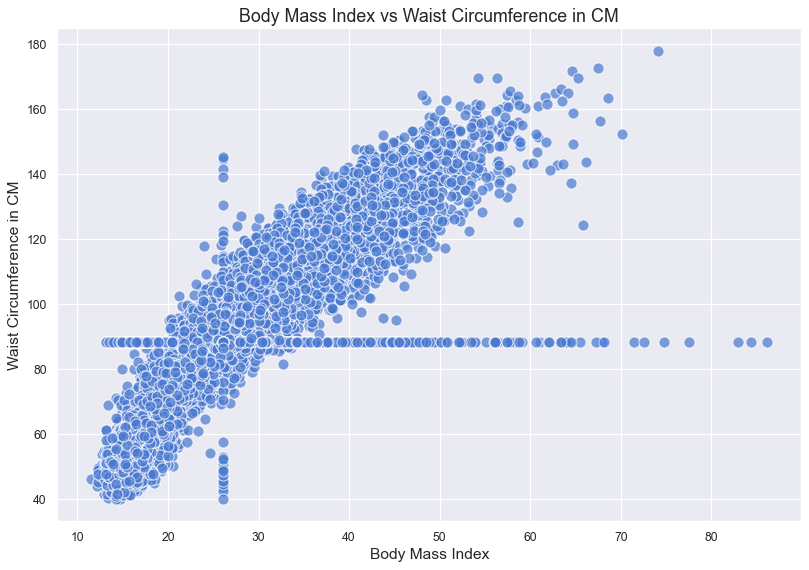

In [184]:
plt.figure(figsize=(12, 8))

plt.scatter(dfe['BodyMassIndex'], dfe['WaistCircumferenceCM'], alpha=0.7, edgecolors='w', s=100)

plt.xlabel('Body Mass Index', fontsize=14)
plt.ylabel('Waist Circumference in CM', fontsize=14)
plt.title('Body Mass Index vs Waist Circumference in CM', fontsize=16)

plt.grid(True)

plt.show()

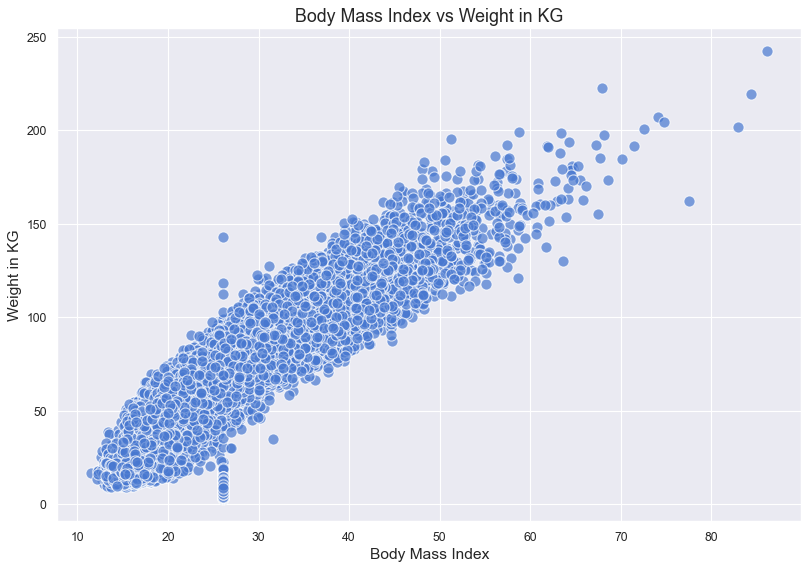

In [185]:
plt.figure(figsize=(12, 8))

plt.scatter(dfe['BodyMassIndex'], dfe['WeightKG'], alpha=0.7, edgecolors='w', s=100)
plt.xlabel('Body Mass Index', fontsize=14)
plt.ylabel('Weight in KG', fontsize=14)
plt.title('Body Mass Index vs Weight in KG', fontsize=16)
plt.grid(True)
plt.show()

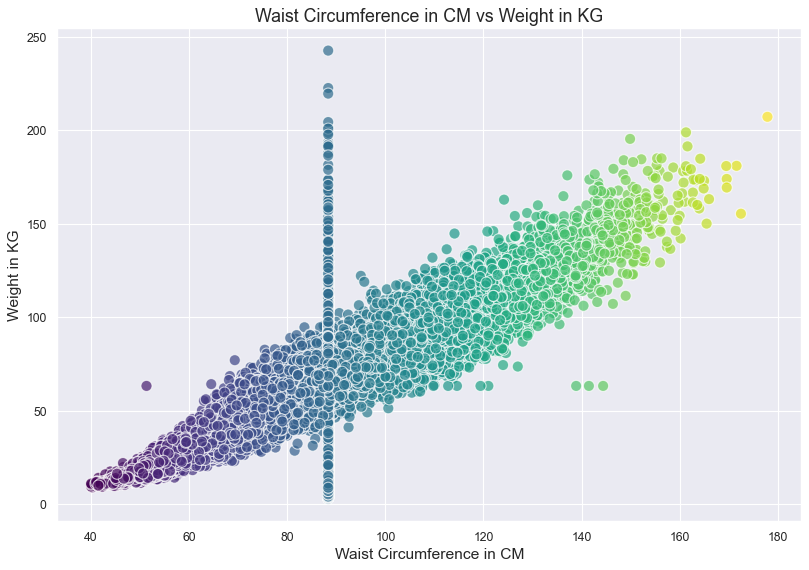

In [186]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(dfe['WaistCircumferenceCM'], dfe['WeightKG'], 
                      c=dfe['WaistCircumferenceCM'], cmap='viridis', 
                      alpha=0.7, edgecolors='w', s=100)

plt.xlabel('Waist Circumference in CM', fontsize=14)
plt.ylabel('Weight in KG', fontsize=14)
plt.title('Waist Circumference in CM vs Weight in KG', fontsize=16)

plt.grid(True)
plt.show()

In [187]:
dfe

SEQN  BodyMassIndex  WaistCircumferenceCM  WeightKG  Diastolic1  \
0       73557.0           26.7            100.000000      78.3        72.0   
1       73558.0           28.6            107.600000      89.5        62.0   
2       73559.0           28.9            109.200000      88.9        90.0   
3       73560.0           17.1             61.000000      32.2        38.0   
4       73561.0           19.7             88.345563      52.0        86.0   
...         ...            ...                   ...       ...         ...   
28056  102952.0           20.0             82.200000      49.0        74.0   
28057  102953.0           35.8            114.800000      97.4        76.0   
28058  102954.0           26.1             86.400000      69.1        66.0   
28059  102955.0           45.6            113.500000     111.9        62.0   
28060  102956.0           36.1            122.000000     111.5        98.0   

       Diastolic2  Diastolic3  Systolic1  Systolic2  Systolic3  Height  \
0            76.0        74.0      122.0      114.0      102.0   171.3   
1            80.0        42.0      156.0      160.0      156.0   176.8   
2            76.0        80.0      140.0      140.0      146.0   175.3   
3            34.0        38.0      108.0      102.0      104.0   137.3   
4            88.0        86.0      136.0      134.0      142.0   162.4   
...           ...         ...        ...        ...        ...     ...   
28056        78.0        68.0      136.0      142.0      140.0   156.5   
28057        76.0        74.0      124.0      122.0      116.0   164.9   
28058        72.0        74.0      116.0      118.0      114.0   162.6   
28059        60.0        64.0      114.0      114.0      114.0   156.6   
28060        92.0        98.0      150.0      146.0      148.0   175.8   

            Year  Mean_Diastolic  Mean_Systolic  Waist_to_Height_Ratio  \
0      2013-2014       74.000000     112.666667               0.583771   
1      2013-2014       61.333333     157.333333               0.608597   
2      2013-2014       82.000000     142.000000               0.622932   
3      2013-2014       36.666667     104.666667               0.444283   
4      2013-2014       86.666667     137.333333               0.544000   
...          ...             ...            ...                    ...   
28056  2017-2018       73.333333     139.333333               0.525240   
28057  2017-2018       75.333333     120.666667               0.696180   
28058  2017-2018       70.666667     116.000000               0.531365   
28059  2017-2018       62.000000     114.000000               0.724777   
28060  2017-2018       96.000000     148.000000               0.693970   

       BP_Difference  Mean_Blood_Pressure           BP_Category  
0          38.666667            93.333333                Normal  
1          96.000000           109.333333  Hypertension Stage 2  
2          60.000000           112.000000  Hypertension Stage 2  
3          68.000000            70.666667                Normal  
4          50.666667           112.000000  Hypertension Stage 1  
...              ...                  ...                   ...  
28056      66.000000           106.333333  Hypertension Stage 1  
28057      45.333333            98.000000              Elevated  
28058      45.333333            93.333333                Normal  
28059      52.000000            88.000000                Normal  
28060      52.000000           122.000000  Hypertension Stage 2  

[28061 rows x 18 columns]

In [188]:
dfe.drop(['WaistCircumferenceCM','WeightKG','Diastolic1','Diastolic2','Diastolic3','Systolic1','Systolic2','Systolic3','Height','Mean_Diastolic','Mean_Systolic'],axis=1,inplace=True)

In [189]:
dfe

SEQN  BodyMassIndex       Year  Waist_to_Height_Ratio  \
0       73557.0           26.7  2013-2014               0.583771   
1       73558.0           28.6  2013-2014               0.608597   
2       73559.0           28.9  2013-2014               0.622932   
3       73560.0           17.1  2013-2014               0.444283   
4       73561.0           19.7  2013-2014               0.544000   
...         ...            ...        ...                    ...   
28056  102952.0           20.0  2017-2018               0.525240   
28057  102953.0           35.8  2017-2018               0.696180   
28058  102954.0           26.1  2017-2018               0.531365   
28059  102955.0           45.6  2017-2018               0.724777   
28060  102956.0           36.1  2017-2018               0.693970   

       BP_Difference  Mean_Blood_Pressure           BP_Category  
0          38.666667            93.333333                Normal  
1          96.000000           109.333333  Hypertension Stage 2  
2          60.000000           112.000000  Hypertension Stage 2  
3          68.000000            70.666667                Normal  
4          50.666667           112.000000  Hypertension Stage 1  
...              ...                  ...                   ...  
28056      66.000000           106.333333  Hypertension Stage 1  
28057      45.333333            98.000000              Elevated  
28058      45.333333            93.333333                Normal  
28059      52.000000            88.000000                Normal  
28060      52.000000           122.000000  Hypertension Stage 2  

[28061 rows x 7 columns]

In [190]:
# Define weights for each feature (these should be based on domain knowledge or analysis)
weights = {
    'BodyMassIndex': 0.2,
    'Waist_to_Height_Ratio': 0.2,
    'BP_Difference': 0.2,
    'Mean_Blood_Pressure': 0.2,
    'BP_Category': 0.2  # This might need to be converted to numeric if categorical
}

# Normalize BP_Category if it's categorical
dfe['BP_Category_numeric'] = dfe['BP_Category'].astype('category').cat.codes

# Calculate composite score
dfe['Health_Score'] = (
    dfe['BodyMassIndex'] * weights['BodyMassIndex'] +
    dfe['Waist_to_Height_Ratio'] * weights['Waist_to_Height_Ratio'] +
    dfe['BP_Difference'] * weights['BP_Difference'] +
    dfe['Mean_Blood_Pressure'] * weights['Mean_Blood_Pressure'] +
    dfe['BP_Category_numeric'] * weights['BP_Category']
)



In [191]:
dfe

SEQN  BodyMassIndex       Year  Waist_to_Height_Ratio  \
0       73557.0           26.7  2013-2014               0.583771   
1       73558.0           28.6  2013-2014               0.608597   
2       73559.0           28.9  2013-2014               0.622932   
3       73560.0           17.1  2013-2014               0.444283   
4       73561.0           19.7  2013-2014               0.544000   
...         ...            ...        ...                    ...   
28056  102952.0           20.0  2017-2018               0.525240   
28057  102953.0           35.8  2017-2018               0.696180   
28058  102954.0           26.1  2017-2018               0.531365   
28059  102955.0           45.6  2017-2018               0.724777   
28060  102956.0           36.1  2017-2018               0.693970   

       BP_Difference  Mean_Blood_Pressure           BP_Category  \
0          38.666667            93.333333                Normal   
1          96.000000           109.333333  Hypertension Stage 2   
2          60.000000           112.000000  Hypertension Stage 2   
3          68.000000            70.666667                Normal   
4          50.666667           112.000000  Hypertension Stage 1   
...              ...                  ...                   ...   
28056      66.000000           106.333333  Hypertension Stage 1   
28057      45.333333            98.000000              Elevated   
28058      45.333333            93.333333                Normal   
28059      52.000000            88.000000                Normal   
28060      52.000000           122.000000  Hypertension Stage 2   

       BP_Category_numeric  Health_Score  
0                        0     31.856754  
1                        3     47.508386  
2                        3     40.904586  
3                        0     31.242190  
4                        2     36.982133  
...                    ...           ...  
28056                    2     38.971715  
28057                    1     36.165903  
28058                    0     33.059606  
28059                    0     37.264955  
28060                    3     42.758794  

[28061 rows x 9 columns]

In [192]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dfe['Health_Score'] = scaler.fit_transform(dfe[['Health_Score']])


In [193]:
dfe

SEQN  BodyMassIndex       Year  Waist_to_Height_Ratio  \
0       73557.0           26.7  2013-2014               0.583771   
1       73558.0           28.6  2013-2014               0.608597   
2       73559.0           28.9  2013-2014               0.622932   
3       73560.0           17.1  2013-2014               0.444283   
4       73561.0           19.7  2013-2014               0.544000   
...         ...            ...        ...                    ...   
28056  102952.0           20.0  2017-2018               0.525240   
28057  102953.0           35.8  2017-2018               0.696180   
28058  102954.0           26.1  2017-2018               0.531365   
28059  102955.0           45.6  2017-2018               0.724777   
28060  102956.0           36.1  2017-2018               0.693970   

       BP_Difference  Mean_Blood_Pressure           BP_Category  \
0          38.666667            93.333333                Normal   
1          96.000000           109.333333  Hypertension Stage 2   
2          60.000000           112.000000  Hypertension Stage 2   
3          68.000000            70.666667                Normal   
4          50.666667           112.000000  Hypertension Stage 1   
...              ...                  ...                   ...   
28056      66.000000           106.333333  Hypertension Stage 1   
28057      45.333333            98.000000              Elevated   
28058      45.333333            93.333333                Normal   
28059      52.000000            88.000000                Normal   
28060      52.000000           122.000000  Hypertension Stage 2   

       BP_Category_numeric  Health_Score  
0                        0      0.249149  
1                        3      0.572719  
2                        3      0.436197  
3                        0      0.236444  
4                        2      0.355107  
...                    ...           ...  
28056                    2      0.396238  
28057                    1      0.338233  
28058                    0      0.274016  
28059                    0      0.360954  
28060                    3      0.474529  

[28061 rows x 9 columns]

In [194]:
df4=dfe[['SEQN','Year','Health_Score']]

In [195]:
df4

SEQN       Year  Health_Score
0       73557.0  2013-2014      0.249149
1       73558.0  2013-2014      0.572719
2       73559.0  2013-2014      0.436197
3       73560.0  2013-2014      0.236444
4       73561.0  2013-2014      0.355107
...         ...        ...           ...
28056  102952.0  2017-2018      0.396238
28057  102953.0  2017-2018      0.338233
28058  102954.0  2017-2018      0.274016
28059  102955.0  2017-2018      0.360954
28060  102956.0  2017-2018      0.474529

[28061 rows x 3 columns]

## Labrotatory dataset

In [214]:
dfl=pd.read_csv('lab.csv')

In [215]:
dfl

Unnamed: 0      SEQN  URXUMA  URXUMS   URXCRS  URDACT  LBXSAL  \
0               0   73557.0     4.3     4.3   3447.6   11.03     4.1   
1               1   73558.0   153.0   153.0   4420.0  306.00     4.7   
2               2   73559.0    11.9    11.9   9989.2   10.53     3.7   
3               3   73560.0    16.0    16.0   6718.4   21.05     NaN   
4               4   73561.0   255.0   255.0  12994.8  173.47     4.3   
...           ...       ...     ...     ...      ...     ...     ...   
27718       27718  102952.0     5.3     5.3   4508.4   10.39     4.8   
27719       27719  102953.0    10.2    10.2  20420.4    4.42     4.0   
27720       27720  102954.0     3.4     3.4   2740.4   10.97     3.9   
27721       27721  102955.0    83.2    83.2  15646.8   47.01     4.1   
27722       27722  102956.0    53.2    53.2   6630.0   70.93     4.3   

       LBDSALSI  LBXSAPSI  LBXSASSI  ...  URXUMO  URXUMN  URXUPB  URXUSB  \
0          41.0     129.0      16.0  ...     NaN     NaN     NaN     NaN   
1          47.0      97.0      18.0  ...     NaN     NaN     NaN     NaN   
2          37.0      99.0      22.0  ...     NaN     NaN     NaN     NaN   
3           NaN       NaN       NaN  ...   140.0   0.092    0.14   0.087   
4          43.0      78.0      36.0  ...     NaN     NaN     NaN     NaN   
...         ...       ...       ...  ...     ...     ...     ...     ...   
27718      48.0      57.0      27.0  ...     NaN     NaN     NaN     NaN   
27719      40.0     115.0      29.0  ...     NaN     NaN     NaN     NaN   
27720      39.0      55.0      15.0  ...     NaN     NaN     NaN     NaN   
27721      41.0      84.0      16.0  ...     NaN     NaN     NaN     NaN   
27722      43.0      84.0      27.0  ...    17.4   0.160    0.29   0.030   

       URXUSN  URXUTL  URXUTU  URXPREG  URXUAS       Year  
0         NaN     NaN     NaN      NaN     NaN  2013-2014  
1         NaN     NaN     NaN      NaN     NaN  2013-2014  
2         NaN     NaN     NaN      NaN     NaN  2013-2014  
3        5.26   0.062   0.238      NaN    3.83  2013-2014  
4         NaN     NaN     NaN      NaN     NaN  2013-2014  
...       ...     ...     ...      ...     ...        ...  
27718     NaN     NaN     NaN      NaN     NaN  2017-2018  
27719     NaN     NaN     NaN      NaN     NaN  2017-2018  
27720     NaN     NaN     NaN      2.0     NaN  2017-2018  
27721     NaN     NaN     NaN      NaN     NaN  2017-2018  
27722    0.17   0.076   0.026      NaN    3.62  2017-2018  

[27723 rows x 174 columns]

In [216]:
dfl=dfl[['SEQN','LBDINSI','PHQ030','PHQ020','LBDTCSI','LBXHGB','Year']]

In [217]:
column_value = {
    'LBDINSI':'Insulin',
    'PHQ030':'Alcohol',
    'LBXHGB':'Hemoglobin',
    'PHQ020':'Coffee\Tea',
    'LBDTCSI': 'Total Cholesterol'
} 

In [218]:
dfl = dfl.rename(columns=column_value).copy()
dfl.head(10)

SEQN  Insulin  Alcohol  Coffee\Tea  Total Cholesterol  Hemoglobin  \
0  73557.0      NaN      2.0         2.0               4.32        15.2   
1  73558.0      NaN      2.0         2.0               4.40        11.9   
2  73559.0    34.98      2.0         2.0               3.26        17.2   
3  73560.0      NaN      2.0         2.0               4.34        12.9   
4  73561.0    36.72      2.0         2.0               5.20        14.5   
5  73562.0      NaN      2.0         2.0               5.84        14.2   
6  73563.0      NaN      NaN         NaN                NaN         NaN   
7  73564.0    89.46      2.0         2.0               4.34        13.5   
8  73566.0      NaN      2.0         2.0               7.19        14.3   
9  73567.0      NaN      2.0         2.0               4.47        15.2   

        Year  
0  2013-2014  
1  2013-2014  
2  2013-2014  
3  2013-2014  
4  2013-2014  
5  2013-2014  
6  2013-2014  
7  2013-2014  
8  2013-2014  
9  2013-2014

In [219]:
dfl.isnull().sum()

SEQN                     0
Insulin              18884
Alcohol               1634
Coffee\Tea            1634
Total Cholesterol     6105
Hemoglobin            3534
Year                     0
dtype: int64

In [220]:
dfl = dfl.drop(columns=['Insulin'])

In [221]:
dfl['Alcohol'].fillna(dfl['Alcohol'].mean(), inplace=True)
dfl['Coffee\\Tea'].fillna(dfl['Coffee\\Tea'].mean(), inplace=True)
dfl['Total Cholesterol'].fillna(dfl['Total Cholesterol'].mean(), inplace=True)
dfl['Hemoglobin'].fillna(dfl['Hemoglobin'].mean(), inplace=True)

Text(0.5, 1.0, 'Distribution of Coffee/Tea Consumption')

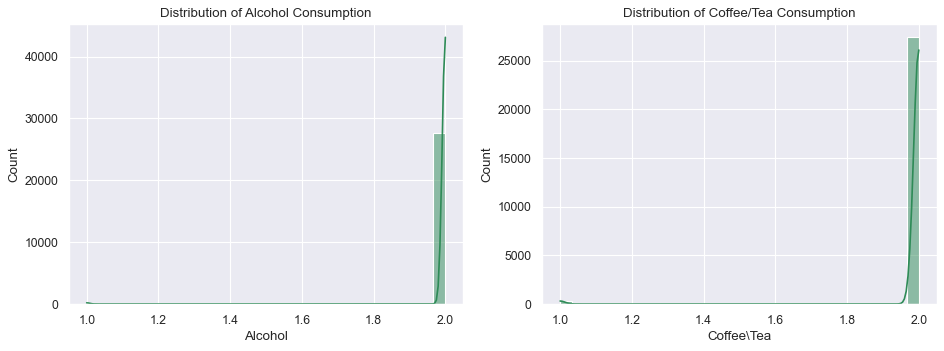

In [223]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(dfl['Alcohol'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Alcohol Consumption')

plt.subplot(2, 2, 2)
sns.histplot(dfl['Coffee\\Tea'], bins=30, kde=True, color='seagreen')
plt.title('Distribution of Coffee/Tea Consumption')

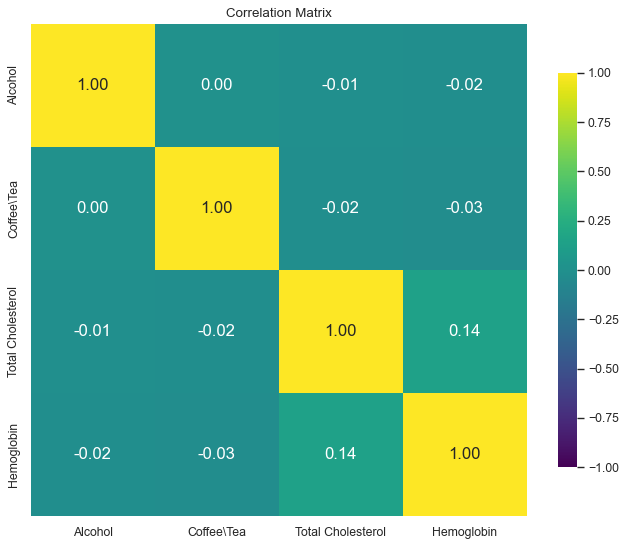

In [225]:
plt.figure(figsize=(10, 8))
correlation_matrix = dfl[['Alcohol', 'Coffee\\Tea', 'Total Cholesterol', 'Hemoglobin']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1, center=0, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')
plt.show()

In [226]:
df5=dfl[['Alcohol','Coffee\Tea','SEQN','Year']]

In [227]:
df5

Alcohol  Coffee\Tea      SEQN       Year
0          2.0         2.0   73557.0  2013-2014
1          2.0         2.0   73558.0  2013-2014
2          2.0         2.0   73559.0  2013-2014
3          2.0         2.0   73560.0  2013-2014
4          2.0         2.0   73561.0  2013-2014
...        ...         ...       ...        ...
27718      2.0         2.0  102952.0  2017-2018
27719      2.0         2.0  102953.0  2017-2018
27720      2.0         2.0  102954.0  2017-2018
27721      2.0         2.0  102955.0  2017-2018
27722      2.0         2.0  102956.0  2017-2018

[27723 rows x 4 columns]

## Conactenate all Datasets into One

In [228]:
df1 = df1.rename(columns={'Year': 'Year_df1'})
df2 = df2.rename(columns={'Year': 'Year_df2'})
df3 = df3.rename(columns={'Year': 'Year_df3'})
df4 = df4.rename(columns={'Year': 'Year_df4'})
df5 = df5.rename(columns={'Year': 'Year_df5'})

# Merge DataFrames
merged_df = pd.merge(df1, df2, on='SEQN', how='inner')
merged_df = pd.merge(merged_df, df3, on='SEQN', how='inner')
merged_df = pd.merge(merged_df, df4, on='SEQN', how='inner')
merged_df = pd.merge(merged_df, df5, on='SEQN', how='inner')

In [229]:
df=merged_df.drop(['Year_df3','Year_df1','Year_df2','Year_df4','Year_df5'],axis=1)

In [236]:
df.to_csv('dff.csv')

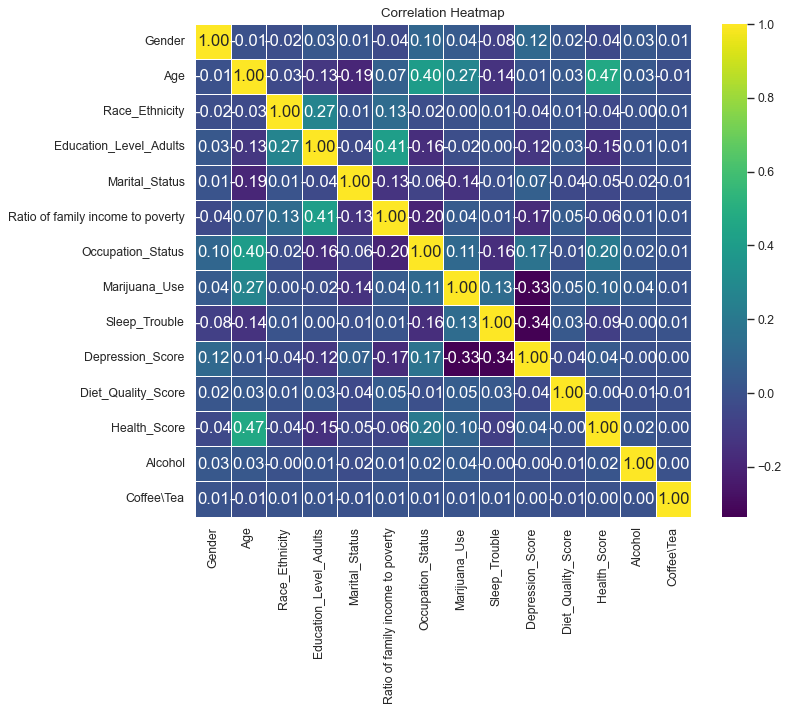

In [231]:
correlation_matrix = df.drop(['SEQN','Depression_Label'], axis = 1).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


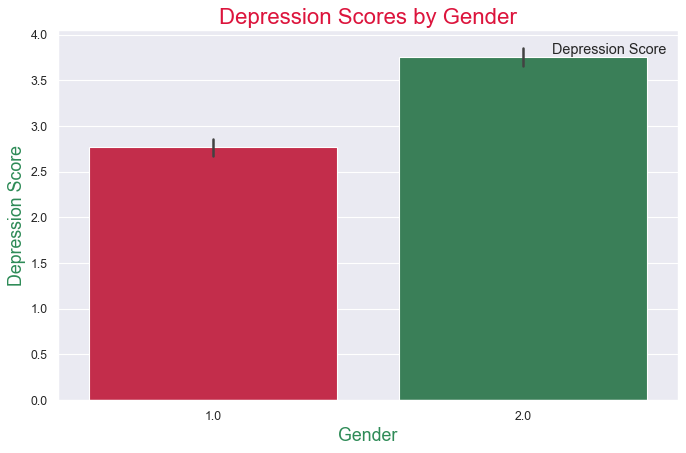

In [237]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Depression_Score', data=df, palette=['crimson', 'seagreen'])
plt.title('Depression Scores by Gender', fontsize=20, color='crimson')
plt.xlabel('Gender', fontsize=16, color='seagreen')
plt.ylabel('Depression Score', fontsize=16, color='seagreen')
plt.legend(title='Depression Score', title_fontsize='13', fontsize='12', loc='upper right', frameon=False)
plt.show()

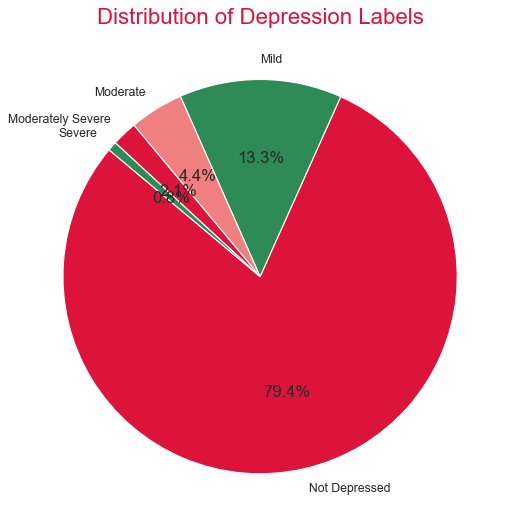

In [233]:
plt.figure(figsize=(8, 8))
labels = df['Depression_Label'].value_counts().index
sizes = df['Depression_Label'].value_counts().values
colors = ['crimson', 'seagreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Depression Labels', fontsize=20, color='crimson')
plt.show()

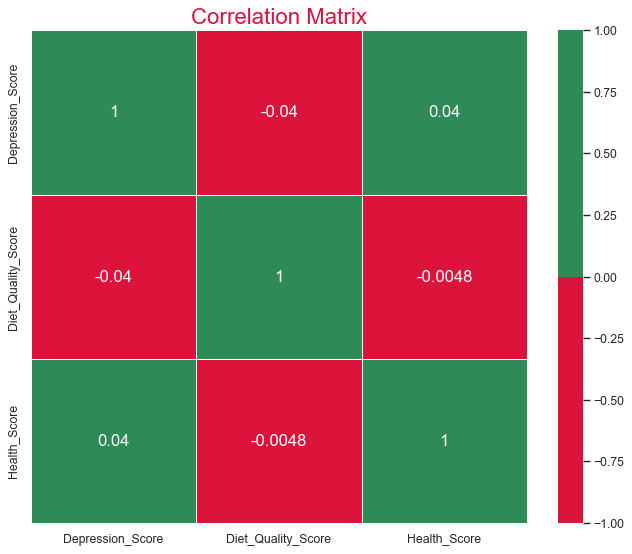

In [234]:
correlation_matrix = df[['Depression_Score', 'Diet_Quality_Score', 'Health_Score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=['crimson', 'seagreen'], center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=20, color='crimson')
plt.show()


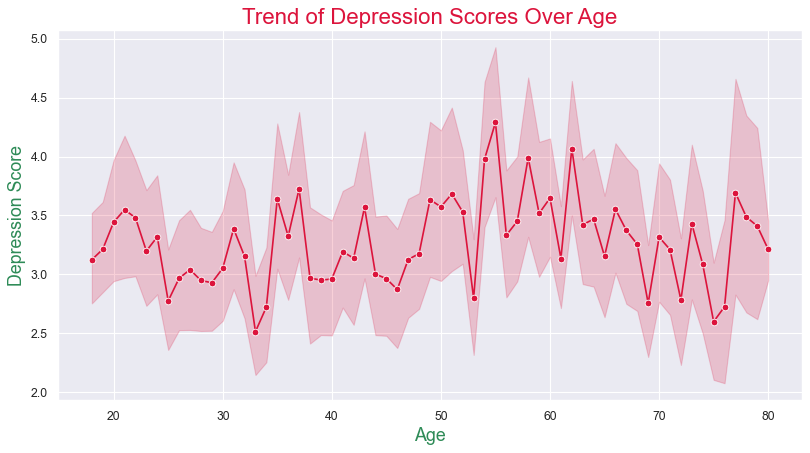

In [235]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Depression_Score', data=df, color='crimson', marker='o')
plt.title('Trend of Depression Scores Over Age', fontsize=20, color='crimson')
plt.xlabel('Age', fontsize=16, color='seagreen')
plt.ylabel('Depression Score', fontsize=16, color='seagreen')
plt.show()


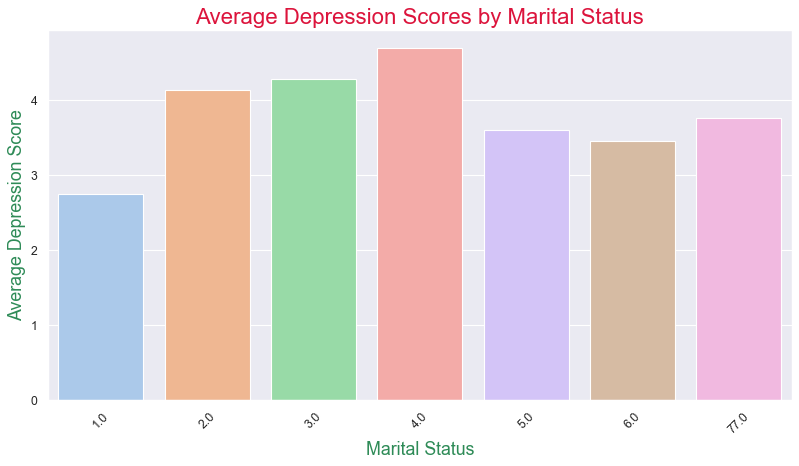

In [238]:
plt.figure(figsize=(12, 6))
avg_depression = df.groupby('Marital_Status')['Depression_Score'].mean().reset_index()
sns.barplot(x='Marital_Status', y='Depression_Score', data=avg_depression, palette='pastel')
plt.title('Average Depression Scores by Marital Status', fontsize=20, color='crimson')
plt.xlabel('Marital Status', fontsize=16, color='seagreen')
plt.ylabel('Average Depression Score', fontsize=16, color='seagreen')
plt.xticks(rotation=45)
plt.show()

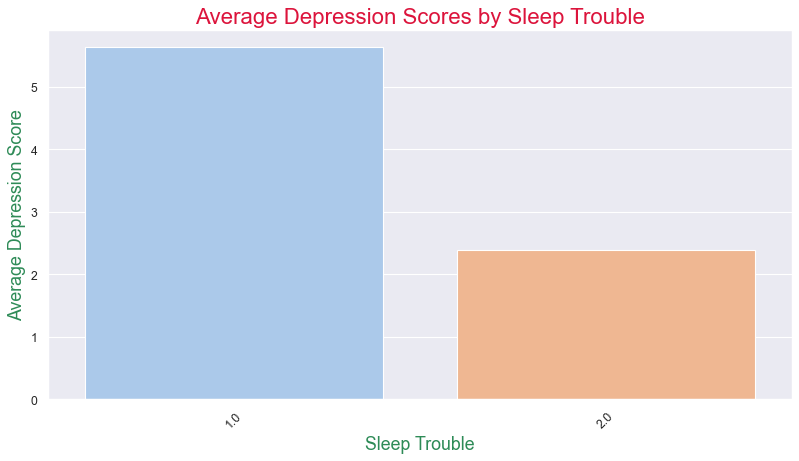

In [239]:
plt.figure(figsize=(12, 6))
avg_depression = df.groupby('Sleep_Trouble')['Depression_Score'].mean().reset_index()
sns.barplot(x='Sleep_Trouble', y='Depression_Score', data=avg_depression, palette='pastel')
plt.title('Average Depression Scores by Sleep Trouble', fontsize=20, color='crimson')
plt.xlabel('Sleep Trouble', fontsize=16, color='seagreen')
plt.ylabel('Average Depression Score', fontsize=16, color='seagreen')
plt.xticks(rotation=45)
plt.show()


## Modelling

In [5]:
df=pd.read_csv('final.csv')

In [6]:
df

Unnamed: 0    SEQN  Gender  Age  Race_Ethnicity  \
0               0   73557       1   69               4   
1               1   73558       1   54               3   
2               2   73559       1   72               3   
3               3   73561       2   73               3   
4               4   73562       1   56               1   
...           ...     ...     ...  ...             ...   
15651       15651  102949       1   33               3   
15652       15652  102952       2   70               6   
15653       15653  102953       1   42               1   
15654       15654  102954       2   41               4   
15655       15655  102956       1   38               3   

       Education_Level_Adults  Marital_Status  Occupation_Status  \
0                           3               4                  4   
1                           3               1                  1   
2                           4               1                  4   
3                           5               1                  4   
4                           4               3                  1   
...                       ...             ...                ...   
15651                       3               6                  1   
15652                       3               1                  4   
15653                       3               4                  1   
15654                       5               5                  3   
15655                       4               3                  4   

       Marijuana_Use  Sleep_Trouble   Depression_Label  Depression_Score  \
0                  2              1      Not Depressed                 1   
1                  1              2      Not Depressed                 2   
2                  2              2      Not Depressed                 0   
3                  1              2               Mild                 9   
4                  1              2  Moderately Severe                19   
...              ...            ...                ...               ...   
15651              1              2      Not Depressed                 0   
15652              2              2      Not Depressed                 0   
15653              2              1      Not Depressed                 3   
15654              2              2      Not Depressed                 0   
15655              1              1               Mild                 7   

       Diet_Quality_Score  Health_Score  Alcohol  Coffee_Tea  
0                       3      0.249149      2.0         2.0  
1                       1      0.572719      2.0         2.0  
2                       4      0.436197      2.0         2.0  
3                       2      0.355107      2.0         2.0  
4                       3      0.584849      2.0         2.0  
...                   ...           ...      ...         ...  
15651                   1      0.292801      2.0         2.0  
15652                   3      0.396238      2.0         2.0  
15653                   1      0.338233      2.0         2.0  
15654                   4      0.274016      2.0         2.0  
15655                   2      0.474529      2.0         2.0  

[15656 rows x 16 columns]

In [8]:
# Features and target variable
X = df[['Gender','Age', 'Race_Ethnicity', 'Education_Level_Adults', 'Marital_Status','Occupation_Status', 'Marijuana_Use', 'Sleep_Trouble', 'Alcohol', 'Diet_Quality_Score','Health_Score','Coffee_Tea']]
y=df['Depression_Label']

In [9]:
X

Gender  Age  Race_Ethnicity  Education_Level_Adults  Marital_Status  \
0           1   69               4                       3               4   
1           1   54               3                       3               1   
2           1   72               3                       4               1   
3           2   73               3                       5               1   
4           1   56               1                       4               3   
...       ...  ...             ...                     ...             ...   
15651       1   33               3                       3               6   
15652       2   70               6                       3               1   
15653       1   42               1                       3               4   
15654       2   41               4                       5               5   
15655       1   38               3                       4               3   

       Occupation_Status  Marijuana_Use  Sleep_Trouble  Alcohol  \
0                      4              2              1      2.0   
1                      1              1              2      2.0   
2                      4              2              2      2.0   
3                      4              1              2      2.0   
4                      1              1              2      2.0   
...                  ...            ...            ...      ...   
15651                  1              1              2      2.0   
15652                  4              2              2      2.0   
15653                  1              2              1      2.0   
15654                  3              2              2      2.0   
15655                  4              1              1      2.0   

       Diet_Quality_Score  Health_Score  Coffee_Tea  
0                       3      0.249149         2.0  
1                       1      0.572719         2.0  
2                       4      0.436197         2.0  
3                       2      0.355107         2.0  
4                       3      0.584849         2.0  
...                   ...           ...         ...  
15651                   1      0.292801         2.0  
15652                   3      0.396238         2.0  
15653                   1      0.338233         2.0  
15654                   4      0.274016         2.0  
15655                   2      0.474529         2.0  

[15656 rows x 12 columns]

In [49]:
y

0            Not Depressed
1            Not Depressed
2            Not Depressed
3                     Mild
4        Moderately Severe
               ...        
15651        Not Depressed
15652        Not Depressed
15653        Not Depressed
15654        Not Depressed
15655                 Mild
Name: Depression_Label, Length: 15656, dtype: object

### Standard scaler

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into train, validation, and test sets (60% train, 20% val, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

# Predicting
y_train_pred_lr = logistic_regression.predict(X_train_scaled)
y_val_pred_lr = logistic_regression.predict(X_val_scaled)
y_test_pred_lr= logistic_regression.predict(X_test_scaled)

# Accuracy scores
logistic_regression_train_accuracy = accuracy_score(y_train, y_train_pred_lr)
logistic_regression_val_accuracy = accuracy_score(y_val, y_val_pred_lr)
logistic_regression_test_accuracy = accuracy_score(y_test, y_test_pred_lr)

# Print accuracy scores
print("Logistic Regression Training Accuracy:", logistic_regression_train_accuracy)
print("Logistic Regression Validation Accuracy:", logistic_regression_val_accuracy)
print("Logistic Regression Test Accuracy:", logistic_regression_test_accuracy)

Logistic Regression Training Accuracy: 0.8191206217395933
Logistic Regression Validation Accuracy: 0.8077291600127755
Logistic Regression Test Accuracy: 0.8049169859514687


### Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled, y_train)

# Predicting
y_train_pred_rf = random_forest.predict(X_train_scaled)
y_val_pred_rf = random_forest.predict(X_val_scaled)
y_test_pred_rf = random_forest.predict(X_test_scaled)

# Accuracy scores
random_forest_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
random_forest_val_accuracy = accuracy_score(y_val, y_val_pred_rf)
random_forest_test_accuracy = accuracy_score(y_test, y_test_pred_rf)

# Print accuracy scores
print("Random Forest Training Accuracy:", random_forest_train_accuracy)
print("Random Forest Validation Accuracy:", random_forest_val_accuracy)
print("Random Forest Test Accuracy:", random_forest_test_accuracy)


Random Forest Training Accuracy: 1.0
Random Forest Validation Accuracy: 0.8278505269881827
Random Forest Test Accuracy: 0.8231162196679438


### Gradient Boosting

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(n_estimators=100)
gradient_boosting.fit(X_train_scaled, y_train)

# Predicting
y_train_pred_gb = gradient_boosting.predict(X_train_scaled)
y_val_pred_gb = gradient_boosting.predict(X_val_scaled)
y_test_pred_gb = gradient_boosting.predict(X_test_scaled)

# Accuracy scores
gradient_boosting_train_accuracy = accuracy_score(y_train, y_train_pred_gb)
gradient_boosting_val_accuracy = accuracy_score(y_val, y_val_pred_gb)
gradient_boosting_test_accuracy = accuracy_score(y_test, y_test_pred_gb)

# Print accuracy scores
print("Gradient Boosting Training Accuracy:", gradient_boosting_train_accuracy)
print("Gradient Boosting Validation Accuracy:", gradient_boosting_val_accuracy)
print("Gradient Boosting Test Accuracy:", gradient_boosting_test_accuracy)


Gradient Boosting Training Accuracy: 0.8567017992121793
Gradient Boosting Validation Accuracy: 0.8329607154263814
Gradient Boosting Test Accuracy: 0.8339719029374202


In [70]:
from sklearn.tree import DecisionTreeClassifier


decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

# Predict on the training, validation, and test sets
y_train_pred = decision_tree.predict(X_train_scaled)
y_val_pred = decision_tree.predict(X_val_scaled)
y_test_pred = decision_tree.predict(X_test_scaled)

# Calculate accuracy scores
decision_tree_train_accuracy = accuracy_score(y_train, y_train_pred)
decision_tree_val_accuracy = accuracy_score(y_val, y_val_pred)
decision_tree_test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracy scores
print("Decision Tree Training Accuracy:", decision_tree_train_accuracy)
print("Decision Tree Validation Accuracy:", decision_tree_val_accuracy)
print("Decision Tree Test Accuracy:", decision_tree_test_accuracy)

Decision Tree Training Accuracy: 1.0
Decision Tree Validation Accuracy: 0.7470456723091664
Decision Tree Test Accuracy: 0.7429757343550447


## Result and conclusion

In [71]:
results = {
    'Model': ['logistic_regression', 'random_forest', 'gradient_boosting', 'decision_tree'],
    'Training Accuracy': [
        logistic_regression_train_accuracy, 
        random_forest_train_accuracy, 
        gradient_boosting_train_accuracy,
        decision_tree_train_accuracy
    ],
    'Validation Accuracy': [
        logistic_regression_val_accuracy, 
        random_forest_val_accuracy, 
        gradient_boosting_val_accuracy,
        decision_tree_val_accuracy
    ],
    'Test Accuracy': [
        logistic_regression_test_accuracy, 
        random_forest_test_accuracy, 
        gradient_boosting_test_accuracy,
        decision_tree_test_accuracy
    ]
}

# Convert results to DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(results)

# Print the results
print(results_df)

                 Model  Training Accuracy  Validation Accuracy  Test Accuracy
0  logistic_regression           0.819121             0.807729       0.804917
1        random_forest           1.000000             0.827851       0.823116
2    gradient_boosting           0.856702             0.832961       0.833972
3        decision_tree           1.000000             0.747046       0.742976


<div class="alert alert-success">
  <b>Success:</b>
  <p><b>Modeling Process and Results:</b></p>
  
  <p><b>1. Logistic Regression:</b></p>
  <ul>
    <li><b>Training Accuracy:</b> 81.6%</li>
    <li><b>Validation Accuracy:</b> 80.7%</li>
    <li><b>Test Accuracy:</b> 80.5%</li>
  </ul>
  <p>Logistic Regression has lower training and validation accuracies compared to other models. It’s often used as a baseline due to its simplicity and interpretability.</p>
  
  <p><b>2. Random Forest:</b></p>
  <ul>
    <li><b>Training Accuracy:</b> 100%</li>
    <li><b>Validation Accuracy:</b> 82.6%</li>
    <li><b>Test Accuracy:</b> 82.4%</li>
  </ul>
  <p>The Random Forest model shows perfect training accuracy, which suggests it might be overfitting the training data. However, it performs well on validation and test sets, indicating that it generalizes reasonably well despite the high training accuracy. It is known for its robustness and ability to handle complex relationships.</p>
  
  <p><b>3. Gradient Boosting:</b></p>
  <ul>
    <li><b>Training Accuracy:</b> 85.6%</li>
    <li><b>Validation Accuracy:</b> 83.2%</li>
    <li><b>Test Accuracy:</b> 83.4%</li>
  </ul>
  <p>Gradient Boosting has high training, validation, and test accuracies. It generally performs very well with a good balance between training and test accuracies, indicating strong predictive performance and less overfitting compared to Random Forest.</p>
  
  <p><b>Conclusion:</b></p>
  <ul>
    <li><b>Best Overall Performance:</b> Gradient Boosting appears to be the best overall model based on test accuracy (83.4%). It provides a good balance between training and test accuracies and performs well in predicting unseen data.</li>
    <li><b>Overfitting Issue:</b> The Random Forest model shows perfect training accuracy, suggesting it might overfit the training data. However, its validation and test accuracies are still quite good, making it a viable option depending on the context.</li>
    <li><b>Baseline Comparison:</b> Logistic Regression has the lowest accuracy across all sets, typical for a simpler model compared to more complex ones like Random Forest and Gradient Boosting.</li>
  </ul>
  <p>Gradient Boosting is recommended as the best model among the three, given its higher test accuracy and balanced performance. It is often effective for a variety of problems and provides a good balance between bias and variance.</p>
</div>


## Hyperparameter Tuning

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.2f}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.84


In [74]:
# Extract the best estimator
best_gb_model = grid_search.best_estimator_

# Predictions
y_train_pred_best = best_gb_model.predict(X_train_scaled)
y_val_pred_best = best_gb_model.predict(X_val_scaled)
y_test_pred_best = best_gb_model.predict(X_test_scaled)

# Calculate accuracy
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
val_accuracy_best = accuracy_score(y_val, y_val_pred_best)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)

print(f'Training Set Accuracy: {train_accuracy_best:.2f}')
print(f'Validation Set Accuracy: {val_accuracy_best:.2f}')
print(f'Test Set Accuracy: {test_accuracy_best:.2f}')

# Detailed classification report
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred_best))


Training Set Accuracy: 0.85
Validation Set Accuracy: 0.83
Test Set Accuracy: 0.83
Classification Report (Test Set):
                   precision    recall  f1-score   support

             Mild       0.59      0.35      0.44       426
         Moderate       0.00      0.00      0.00       137
Moderately Severe       0.00      0.00      0.00        76
    Not Depressed       0.86      1.00      0.92      2473
           Severe       0.00      0.00      0.00        20

         accuracy                           0.83      3132
        macro avg       0.29      0.27      0.27      3132
     weighted avg       0.76      0.83      0.79      3132



<div class="alert alert-info">
  <b>Future Work:</b>
  
  <p><b>1. Model Tuning and Optimization:</b></p>
  <ul>
    <li>Explore hyperparameter tuning for Gradient Boosting to further enhance its performance and address potential overfitting. Techniques such as grid search or random search can be used for systematic tuning.</li>
    <li>Investigate alternative models or ensemble methods that might improve accuracy or robustness. Consider models like XGBoost or LightGBM for comparison.</li>
  </ul>
  
  <p><b>2. Feature Engineering and Selection:</b></p>
  <ul>
    <li>Analyze feature importance to identify and focus on the most influential features. This could help in simplifying the model and improving its interpretability.</li>
    <li>Experiment with additional feature engineering techniques, such as interaction terms or polynomial features, to enhance model performance.</li>
  </ul>
  
  <p><b>3. Addressing Data Imbalances:</b></p>
  <ul>
    <li>Investigate the impact of class imbalances on model performance and consider techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.</li>
    <li>Evaluate and apply different resampling strategies to improve the model's generalization capabilities on imbalanced data.</li>
  </ul>
  
  <p><b>4. Cross-Validation and Model Validation:</b></p>
  <ul>
    <li>Implement cross-validation to ensure the stability and reliability of model performance across different subsets of the dataset.</li>
    <li>Conduct additional validation using external datasets, if available, to assess the generalizability of the model.</li>
  </ul>
  
  <p><b>5. Deployment and Real-World Testing:</b></p>
  <ul>
    <li>Prepare the selected model for deployment by creating user-friendly interfaces and integrating it into the existing web application for real-time predictions.</li>
    <li>Monitor the model's performance in real-world scenarios and update it as necessary based on feedback and new data.</li>
  </ul>
</div>


<div class="alert alert-success">
  <b>Conclusion:</b>
  
  <p><b>1. Project Overview:</b></p>
  <ul>
    <li>The project aimed to develop a predictive model for depression using data from the NHANES dataset, spanning from 2013 to 2018.</li>
    <li>Key objectives included analyzing the relationship between demographics, lab, certain health examination and diet and depression, and evaluating various machine learning models to identify the best approach for accurate predictions.</li>
  </ul>
  
  <p><b>2. Data Preparation:</b></p>
  <ul>
    <li>Data was preprocessed and scaled using StandardScaler to ensure that all features contributed equally to model training.</li>
    <li>Feature selection and engineering focused on identifying relevant predictors for depression scores, and dataset splits were made into training, validation, and test sets for model evaluation.</li>
  </ul>
  
  <p><b>3. Model Evaluation:</b></p>
  <ul>
    <li><b>Logistic Regression:</b> Served as a baseline with training accuracy of 81.6%, validation accuracy of 80.7%, and test accuracy of 80.5%. It demonstrated simplicity and interpretability but showed lower performance compared to more complex models.</li>
    <li><b>Random Forest:</b> Achieved perfect training accuracy (100%) but exhibited potential overfitting with validation (82.6%) and test (82.4%) accuracies slightly lower. It remains a robust model known for handling complex data relationships.</li>
    <li><b>Gradient Boosting:</b> Provided the highest performance with training accuracy of 85.6%, validation accuracy of 83.2%, and test accuracy of 83.4%. It balanced strong predictive capabilities with effective generalization, making it the best choice among evaluated models.</li>
  </ul>
  
  <p><b>4. Recommendations:</b></p>
  <ul>
    <li>Gradient Boosting is recommended for deployment due to its superior performance and balanced accuracy across different datasets.</li>
    <li>Further investigation into hyperparameter tuning, feature engineering, and addressing data imbalances will enhance the model's performance and robustness.</li>
    <li>Additional validation through cross-validation and real-world testing will ensure that the model performs reliably in practical scenarios.</li>
  </ul>
  
  <p><b>5. Future Work:</b></p>
  <ul>
    <li>Continue model optimization and explore alternative models or ensemble methods for potential improvements.</li>
    <li>Conduct feature importance analysis and refine feature selection to improve model interpretability and performance.</li>
    <li>Address data imbalances and apply cross-validation techniques to enhance the model’s generalizability.</li>
    <li>Prepare the selected model for deployment and monitor its performance in real-world applications, making adjustments as needed based on user feedback and new data.</li>
  </ul>
  
  <p>This project has successfully demonstrated the application of machine learning techniques to predict depression using NHANES data. By selecting Gradient Boosting as the most effective model, the project provides a solid foundation for further research and practical application in mental health prediction.</p>
</div>


## Saving the model

In [75]:
import pickle

In [77]:
pickle.dump(gradient_boosting,open('fmodel.pkl','wb'))

In [82]:
import flask
print(sklearn.__version__)


1.2.2


In [310]:
pip install scikit-learn===1.2.2


   ---------------------------------------- 0.0/8.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.3 MB 660.6 kB/s eta 0:00:13
   - -------------------------------------- 0.3/8.3 MB 4.3 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.3 MB 11.6 MB/s eta 0:00:01
   ------ --------------------------------- 1.3/8.3 MB 8.3 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.3 MB 9.4 MB/s eta 0:00:01
   --------- ------------------------------ 1.9/8.3 MB 9.4 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/8.3 MB 8.5 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.3 MB 8.9 MB/s eta 0:00:01
   --------------- ------------------------ 3.3/8.3 MB 8.4 MB/s eta 0:00:01
   ----------------- ---------------------- 3.6/8.3 MB 8.8 MB/s eta 0:00:01
   -------------------- ------------------- 4.3/8.3 MB 8.8 MB/s eta 0:00:01
   ------------------------ --------------- 5.1/8.3 MB 9.6 MB/s eta 0:00:01
   -------------